In [1]:

#Libraries for data cleaning and visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import dask.dataframe as dd
import pyarrow.parquet as pq
import fastparquet


#Import libraries for visualization and charts
import seaborn as sns
import matplotlib.pyplot as plt

# These are windows OS talking libraries
import os
import warnings
warnings.filterwarnings('ignore')
import statistics
import math
from datetime import datetime

#Liraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats, integrate
import scipy.stats as stats
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


#This is to dislay limited info on Jupyter preview
pd.set_option('display.max_colwidth',1000)
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
import pandas as pd
import dask
import dask.dataframe as dd
import folium
from folium.plugins import HeatMap

print(f"Pandas version: {pd.__version__}")
print(f"Dask version: {dask.__version__}")

C:\Users\pvp373\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\pvp373\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


Pandas version: 2.2.2
Dask version: 2024.8.0


In [2]:
import libpysal
from esda.moran import Moran
from esda.moran import Moran_Local
from esda.geary import Geary
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import ccf
from linearmodels.panel import compare




In [3]:
os.chdir('D:\\NYC Trip Data')

In [4]:
df_uber = pd.read_csv("df_unique_uber.csv")

In [5]:
df_uber.shape

(495128, 243)

In [7]:
df_lyft = pd.read_csv("df_unique_lyft.csv")

df_lyft.shape

(445357, 250)

In [8]:
df_lyft.shape

(445357, 250)

In [7]:
df_uber.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID_x,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,congestion_surcharge_Flag,LocationID_PU,Borough_PU,Zone_PU,service_zone_PU,LocationID_DU,Borough_DU,Zone_DU,service_zone_DU,pickup_time,dropoff_time,trip_duration,tnc_wait_time,pickup_month,pickup_hour,pickup_date,pickup_day_name,Daytime,pickup_day_of_week,pickup_day,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Morning,Afternoon,Evening,Midnight,uberx_basefare,uberXL_basefare,uberBlack_basefare,uberSUV_basefare,UberSUV,UberBlack,UberXL,UberX,PUrequest_date,Serial Number,minutes_since_start,bin_index,unique_id_PU,unique_id_DO,Fare_per_Mile_uber,Fare_per_Minute_uber,driver_pay_per_mile,minutes_since_start_request,bin_index_request,minutes_since_start_dropoff,bin_index_dropoff_x,minutes_since_start_pickup,bin_index_pickup,unique_id_pickup,unique_id_request,unique_id_dropoff,pickups_count_at_dropoff_y,requests_count_at_pickup,requests_count_at_dropoff,pickups_count_at_pickup,pickups_count_at_dropoff,dropoffs_count_at_pickup,dropoffs_count_at_dropoff,airport_trips_count_pickup,airport_trips_count_dropoff,shared_request_flag_count_pickup,shared_request_flag_count_dropoff,shared_match_flag_count_pickup,shared_match_flag_count_dropoff,avg_wait_time_request_pickup,avg_wait_time_request_dropoff,avg_wait_time_pickup_pickup,avg_wait_time_pickup_dropoff,avg_wait_time_dropoff_pickup,avg_wait_time_dropoff_dropoff,avg_fare_per_mile_request_pickup,avg_fare_per_mile_request_dropoff,avg_fare_per_mile_pickup_pickup,avg_fare_per_mile_pickup_dropoff,avg_fare_per_mile_dropoff_pickup,avg_fare_per_mile_dropoff_dropoff,DOLocationID_y,bin_index_dropoff_y,baseline_drivers,request_bin,total_baseline,availability_score,adjusted_drivers,trips_per_driver,wait_time,bin_index_dropoff,DOLocationID_x_merge,baseline_drivers_merge,request_bin_merge,tolled_trip_flag_count_pickup,tolled_trip_flag_count_dropoff,avg_base_fare_request_pickup,avg_trip_miles_request_pickup,avg_trip_duration_request_pickup,avg_driver_pay_request_pickup,avg_bcf_request_pickup,avg_sales_tax_request_pickup,congestion_time_flag,crosses_60th_st_flag,LocationID,Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1,"Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!12:00 a.m. to 4:59 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!5:00 a.m. to 5:29 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and o

In [5]:
df_uber.drop([
    "hvfhs_license_num",
    "wav_match_flag",
    "congestion_surcharge_Flag",
    "dispatching_base_num",
    "originating_base_num",
    "trip_duration", 
    "tnc_wait_time",
    "trip_miles",
    "trip_time",
    "base_passenger_fare",
    "tolls",
    "bcf",
    "sales_tax",
    "congestion_surcharge",
    "airport_fee",
    "tips",
    "driver_pay",
    "shared_request_flag",
    "shared_match_flag",
    "access_a_ride_flag"
], axis=1, inplace=True)


In [6]:
df_uber.head()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID_x,wav_request_flag,LocationID_PU,Borough_PU,Zone_PU,service_zone_PU,LocationID_DU,Borough_DU,Zone_DU,service_zone_DU,pickup_time,dropoff_time,pickup_month,pickup_hour,pickup_date,pickup_day_name,Daytime,pickup_day_of_week,pickup_day,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Morning,Afternoon,Evening,Midnight,uberx_basefare,uberXL_basefare,uberBlack_basefare,uberSUV_basefare,UberSUV,UberBlack,UberXL,UberX,PUrequest_date,Serial Number,minutes_since_start,bin_index,unique_id_PU,unique_id_DO,Fare_per_Mile_uber,Fare_per_Minute_uber,driver_pay_per_mile,minutes_since_start_request,bin_index_request,minutes_since_start_dropoff,bin_index_dropoff_x,minutes_since_start_pickup,bin_index_pickup,unique_id_pickup,unique_id_request,unique_id_dropoff,pickups_count_at_dropoff_y,requests_count_at_pickup,requests_count_at_dropoff,pickups_count_at_pickup,pickups_count_at_dropoff,dropoffs_count_at_pickup,dropoffs_count_at_dropoff,airport_trips_count_pickup,airport_trips_count_dropoff,shared_request_flag_count_pickup,shared_request_flag_count_dropoff,shared_match_flag_count_pickup,shared_match_flag_count_dropoff,avg_wait_time_request_pickup,avg_wait_time_request_dropoff,avg_wait_time_pickup_pickup,avg_wait_time_pickup_dropoff,avg_wait_time_dropoff_pickup,avg_wait_time_dropoff_dropoff,avg_fare_per_mile_request_pickup,avg_fare_per_mile_request_dropoff,avg_fare_per_mile_pickup_pickup,avg_fare_per_mile_pickup_dropoff,avg_fare_per_mile_dropoff_pickup,avg_fare_per_mile_dropoff_dropoff,DOLocationID_y,bin_index_dropoff_y,baseline_drivers,request_bin,total_baseline,availability_score,adjusted_drivers,trips_per_driver,wait_time,bin_index_dropoff,DOLocationID_x_merge,baseline_drivers_merge,request_bin_merge,LocationID,Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1,"Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!12:00 a.m. to 4:59 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!5:00 a.m. to 5:29 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!5:30 a.m. to 5:59 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!8:30 a.m. to 8:59 a.m._PU","Estimate!!Moved; from different county, same state!!INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over!!$10,000 to $14,999_PU","Estimate!!Moved; from different county, same state!!INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Populati

In [7]:
df_uber.shape

(495128, 233)

In [6]:
columns_of_interest = [
    "pickup_datetime",
    "dropoff_datetime",
    "PULocationID",
    "DOLocationID_x",
    "service_zone_PU",
    "LocationID_DU",
    "bin_index",
    "unique_id_PU",
    "unique_id_DO"
]

# Option 1: Print each column's unique count in a loop
for col in columns_of_interest:
    unique_count = df_uber[col].nunique()
    print(f"{col}: {unique_count} unique values")

# Option 2: Get all unique counts in one shot (returns a Series)
unique_counts = df_uber[columns_of_interest].nunique()
print(unique_counts)



pickup_datetime: 406087 unique values
dropoff_datetime: 410925 unique values
PULocationID: 260 unique values
DOLocationID_x: 260 unique values
service_zone_PU: 3 unique values
LocationID_DU: 260 unique values
bin_index: 2162 unique values
unique_id_PU: 495128 unique values
unique_id_DO: 280391 unique values
pickup_datetime     406087
dropoff_datetime    410925
PULocationID           260
DOLocationID_x         260
service_zone_PU          3
LocationID_DU          260
bin_index             2162
unique_id_PU        495128
unique_id_DO        280391
dtype: int64


In [9]:
df_uber.shape


(495128, 189)

In [9]:
import geopandas as gpd
from scipy.spatial.distance import cdist

gdf_zones = gpd.read_file("D:\\NYC Trip Data\\taxi_zones\\taxi_zones.shp")

gdf_EPA = gpd.read_file("F:\\SLD Transit\\SLD_Trans45.shp")

In [12]:
gdf_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 192572.175, 933088.585 192604.970, 933121.560 192857.382, 933149.268 192978.645, 933222.304 193293.273, 933252.582 193450.600, 933297.723 193555.433, 933330.571 193748.823, 933350.632 193794.687, 933355.706 193834.024, 933365.798 193886.466, 933431.739 194391.291, 933465.038 194801.093, 933463.434 195227.363, 933471.105 195315.879, 933483.754 195397.827, 933511.436 195509.255, 933554.091 195620.651, 933609.194 195718.905, 933669.247 195797.475, 933731.775 195866.204, 933779.276 195908.732, 933841.762 195957.786, 933906.723 195996.999, 933976.674 196036.202, 934119.044 196101.488, 934491.267 196304.019, 934656.105 196375.819, 934810.948 196441.083, 934963.289 196503.074, 935150.582 196574.832, 935178.064 196591.171, 935205.551 196610.790, 935273.090 196692.628, 935335.676 196794.150, 935373.251 196866.212, 935430.800 196944.791, 935455.812 196974.252, 935483.312 197000.429, 935548.274 197042.925, 935625.692 197075.560, 935688.106 197091.83..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 1033439.643 170883.946, 1033473.265 170808.208, 1033504.660 170731.521, 1033533.803 170653.949, 1033560.667 170575.560, 1033585.230 170496.419, 1033607.472 170416.594, 1033627.372 170336.154, 1033644.914 170255.167, 1033660.084 170173.702, 1033672.867 170091.829, 1033683.254 170009.618, 1033691.235 169927.138, 1033696.804 169844.460, 1033699.956 169761.655, 1033700.687 169678.793, 1033698.999 169595.945, 1033914.712 168756.095, 1033987.383 168631.157, 1034049.614 168461.429, 1034152.071 168286.528, 1034190.853 168220.321, 1034215.168 168143.684, 1034239.479 168067.044, 1034288.511 168020.384, 1034359.472 167990.046, 1034780.204 167800.349, 1034768.641 167571.082, 1034854.960 167383.735, 1035019.891 167173.945, 1035295.456 166890.275, 1035303.561 166784.912, 1035149.634 166644.979, 1035125.254 166622.815, 1034785.622 166702.902, 1034518.710 166336.924, 1034525.495 166168.944, 1034703.802 165974.427, 1034833.479 165917.694, 1034833.479 165804.2..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 256638.616, 1026567.230 256589.859, 1026729.235 256481.356, 1026817.315 256421.566, 1026902.630 256362.665, 1027071.239 256248.925, 1027152.980 256192.892, 1027279.263 256106.327, 1027331.842 256069.276, 1027510.630 255948.374, 1027629.334 255866.839, 1027727.008 255800.518, 1027837.261 255725.658, 1027990.791 255622.893, 1028164.770 255501.600, 1028325.383 255391.142, 1028574.982 255221.726, 1028629.697 255184.957, 1028719.395 255124.679, 1028849.175 255034.538, 1029100.755 254862.455, 1029342.691 254696.746, 1029393.087 254661.415, 1029559.878 254544.480, 1029671.113 254468.873, 1030824.581 253612.447, 1030852.405 253590.019, 1031025.925 253450.148, 1031239.895 253390.968, 1031348.950 253356.008, 1031409.114 253315.489, 1031483.402 253239.361, 1031517.125 253195.017, 1031711.068 252984.795, 1031732.164 252970.294, 1031696.321 252911.684, 1031600.727 252808.666, 1031426.289 252644.904, 1031382.673 252603.959, 1031347.411 252575.222, 10..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 203711.502, 992061.716 203711.772, 992049.866 203627.244, 992045.713 203598.150, 992042.802 203569.472, 992035.529 203520.637, 992029.295 203479.072, 992027.632 203472.421, 992021.605 203429.407, 992009.551 203357.087, 992000.824 203299.731, 991992.721 203254.220, 991991.057 203245.910, 991988.564 203231.779, 991987.730 203220.972, 991983.990 203204.761, 991967.783 203112.494, 991965.080 203098.570, 991950.949 203025.004, 991946.379 202994.663, 991937.648 202946.451, 991921.025 202855.014, 991911.041 202799.837, 991900.444 202740.359, 991869.824 202575.697, 991764.785 201989.606, 991721.350 201752.025, 991698.404 201626.310, 991675.940 201514.696, 991643.912 201360.300, 991601.475 201178

In [9]:
print(gdf_zones.crs)


EPSG:2263


In [14]:
gdf_EPA.shape

(126228, 51)

In [16]:

# Print all column names
print("Columns in EPA dataset:\n", gdf_EPA.columns)


Columns in EPA dataset:
 Index(['GEOID10', 'CBG_ID', 'CBSA', 'CBSA_Name', 'TrAccess_I', 'Pop_byTr',
       'Pop_byTr_m', 'Pop_byTr_1', 'Pop_byTr_a', 'Pct_Pop_by', 'Pct_Pop__1',
       'Pct_Pop__2', 'Pct_Pop__3', 'HU_byTr', 'HH_byTr', 'Wrks_byTr',
       'Wrks_byTr_', 'Wrks_byTr1', 'Wrks_byT_1', 'Pct_Wrks_b', 'Pct_Wrks_1',
       'Pct_Wrks_2', 'Pct_Wrks_3', 'LoWgWrks_b', 'LoWgWrks_1', 'LoWgWrks_2',
       'MeWgWrks_b', 'HiWgWrks_b', 'LoMeWgWrks', 'LoMeWgWr_1', 'LoMeWgWr_2',
       'Pct_LoWgWr', 'Pct_LoWg_1', 'Pct_LoWg_2', 'Pct_LoWg_3', 'Pct_MeWgWr',
       'Pct_LoMeWg', 'Pct_LoMe_1', 'Pct_LoMe_2', 'Pct_LoMe_3', 'Jobs_byTr',
       'Jobs_byTr_', 'Jobs_byTr1', 'Job_byTr_A', 'Pct_Jobs_b', 'Pct_Jobs_1',
       'Pct_Jobs_2', 'Pct_Jobs_3', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


In [ ]:
import geopandas as gpd
import fiona

# Path to the File Geodatabase
gdb_path = "F:\\SmartLocationDatabase.gdb"

# Load the specific layer from the GDB
gdf = gpd.read_file(gdb_path, layer="EPA_SLD_Database_V3")

# Display first few rows
print(gdf.head())

# Print all column names
print("Columns in EPA SLD Dataset:\n", gdf.columns)

In [ ]:
# Choose a specific layer to load (replace 'YourLayerName' with an actual layer name)
gdf = gpd.read_file(gdb_path, layer="YourLayerName")

# Print first few rows
print(gdf.head())

# Print column names
print(gdf.columns)


In [10]:
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Step 2: Extract Centroids of Each Zone
gdf_zones["centroid"] = gdf_zones.geometry.centroid
gdf_zones["x"] = gdf_zones.centroid.x  # X coordinate (feet)
gdf_zones["y"] = gdf_zones.centroid.y  # Y coordinate (feet)

# Step 3: Create DataFrame with Zone ID & Centroids
zones_df = gdf_zones[["LocationID", "x", "y"]].copy()  # Assuming 'LocationID' is the zone identifier

# Step 4: Compute Pairwise Euclidean Distances in Feet
coords = zones_df[["x", "y"]].values  # Extract coordinates
distance_matrix_feet = cdist(coords, coords, metric="euclidean")  # Compute Euclidean distances in feet

# Step 5: Convert Distances to Miles
distance_matrix_miles = distance_matrix_feet / 5280  # Convert feet to miles
 
# Step 6: Convert to DataFrame & Save to CSV
distance_df = pd.DataFrame(distance_matrix_miles, index=zones_df["LocationID"], columns=zones_df["LocationID"])
distance_df.to_csv("D:\\NYC Trip Data\\taxi_zone_euclidean_distances_miles.csv")

# Print Sample Output
print(distance_df.head())  # Show first few rows of the distance matrix


LocationID        1          2          3          4          5          6    \
LocationID                                                                     
1            0.000000  18.739818  20.865371  10.577929   9.633140   8.290753   
2           18.739818   0.000000  17.114692  10.634342  19.303434  12.696367   
3           20.865371  17.114692   0.000000  11.850748  27.993786  21.700068   
4           10.577929  10.634342  11.850748   0.000000  16.216864   9.866529   
5            9.633140  19.303434  27.993786  16.216864   0.000000   6.965978   

LocationID        7          8          9          10         11         12   \
LocationID                                                                     
1           14.188717  14.465848  20.674771  20.138144  10.634218   8.356025   
2           11.014132  12.161458   9.541815   4.786784   9.304880  11.363458   
3            8.053054   7.132849   8.425867  13.139272  19.822931  14.212793   
4            3.977035   4.721904  10.09

In [11]:
# Sort dataframe by timestamp
df_uber = df_uber.sort_values('pickup_datetime').reset_index(drop=True)

In [12]:
# Sort dataframe by timestamp
df_lyft = df_lyft.sort_values('pickup_datetime').reset_index(drop=True)

In [13]:
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# --- Load Taxi Zone Shapefile ---
gdf_zones = gpd.read_file("D:\\NYC Trip Data\\taxi_zones\\taxi_zones.shp")

# --- Extract Centroids ---
gdf_zones["centroid"] = gdf_zones.geometry.centroid
gdf_zones["x"] = gdf_zones.centroid.x  # X coordinate (feet)
gdf_zones["y"] = gdf_zones.centroid.y  # Y coordinate (feet)

# --- Ensure LocationID is String ---
gdf_zones["LocationID"] = gdf_zones["LocationID"].astype(str)

# --- Create DataFrame with Zone ID & Centroids ---
zones_df = gdf_zones[["LocationID", "x", "y"]].copy()

# --- Compute Pairwise Euclidean Distances in Feet ---
coords = zones_df[["x", "y"]].values  # Extract coordinates
distance_matrix_feet = cdist(coords, coords, metric="euclidean")  # Compute Euclidean distances in feet

# --- Convert Distances to Miles ---
distance_matrix_miles = distance_matrix_feet / 5280  # Convert feet to miles

# --- Convert to DataFrame ---
distance_df = pd.DataFrame(distance_matrix_miles, index=zones_df["LocationID"], columns=zones_df["LocationID"])

# --- Save to CSV ---
distance_df.to_csv("D:\\NYC Trip Data\\taxi_zone_euclidean_distances_miles.csv")

# --- Validate Alignment with Trip Data ---
df_uber["PULocationID"] = df_uber["PULocationID"].astype(str)
df_uber["DOLocationID_x"] = df_uber["DOLocationID_x"].astype(str)

missing_pu = np.setdiff1d(df_uber["PULocationID"].unique(), distance_df.index)
missing_do = np.setdiff1d(df_uber["DOLocationID_x"].unique(), distance_df.index)

print(f"🚨 Missing PULocationIDs in distance matrix: {missing_pu}")
print(f"🚨 Missing DOLocationIDs in distance matrix: {missing_do}")

# --- Subset df_uber to Only Valid Zones ---
df_uber_filtered = df_uber[
    df_uber["PULocationID"].isin(distance_df.index) &
    df_uber["DOLocationID_x"].isin(distance_df.index)
].copy()

print(f"✅ Filtered trip data shape: {df_uber_filtered.shape}")


🚨 Missing PULocationIDs in distance matrix: ['105' '265' '57']
🚨 Missing DOLocationIDs in distance matrix: ['265' '57']
✅ Filtered trip data shape: (474736, 243)


In [14]:
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# --- Load Taxi Zone Shapefile ---
gdf_zones = gpd.read_file("D:\\NYC Trip Data\\taxi_zones\\taxi_zones.shp")

# --- Extract Centroids ---
gdf_zones["centroid"] = gdf_zones.geometry.centroid
gdf_zones["x"] = gdf_zones.centroid.x  # X coordinate (feet)
gdf_zones["y"] = gdf_zones.centroid.y  # Y coordinate (feet)

# --- Ensure LocationID is String ---
gdf_zones["LocationID"] = gdf_zones["LocationID"].astype(str)

# --- Create DataFrame with Zone ID & Centroids ---
zones_df = gdf_zones[["LocationID", "x", "y"]].copy()

# --- Compute Pairwise Euclidean Distances in Feet ---
coords = zones_df[["x", "y"]].values  # Extract coordinates
distance_matrix_feet = cdist(coords, coords, metric="euclidean")  # Compute Euclidean distances in feet

# --- Convert Distances to Miles ---
distance_matrix_miles = distance_matrix_feet / 5280  # Convert feet to miles

# --- Convert to DataFrame ---
distance_df = pd.DataFrame(distance_matrix_miles, index=zones_df["LocationID"], columns=zones_df["LocationID"])

# --- Save to CSV ---
distance_df.to_csv("D:\\NYC Trip Data\\taxi_zone_euclidean_distances_miles.csv")

# --- Validate Alignment with Lyft Trip Data ---
df_lyft["PULocationID"] = df_lyft["PULocationID"].astype(str)
df_lyft["DOLocationID_x"] = df_lyft["DOLocationID_x"].astype(str)

missing_pu = np.setdiff1d(df_lyft["PULocationID"].unique(), distance_df.index)
missing_do = np.setdiff1d(df_lyft["DOLocationID_x"].unique(), distance_df.index)

print(f"🚨 Missing PULocationIDs in distance matrix: {missing_pu}")
print(f"🚨 Missing DOLocationIDs in distance matrix: {missing_do}")

# --- Subset df_lyft to Only Valid Zones ---
df_lyft_filtered = df_lyft[
    df_lyft["PULocationID"].isin(distance_df.index) &
    df_lyft["DOLocationID_x"].isin(distance_df.index)
].copy()

print(f"✅ Filtered trip data shape: {df_lyft_filtered.shape}")


🚨 Missing PULocationIDs in distance matrix: ['105' '265' '57']
🚨 Missing DOLocationIDs in distance matrix: ['105' '265' '57']
✅ Filtered trip data shape: (428403, 250)


In [15]:
missing_zones = ['105', '265', '57']
print(gdf_zones[gdf_zones["LocationID"].isin(missing_zones)])


Empty GeoDataFrame
Columns: [OBJECTID, Shape_Leng, Shape_Area, zone, LocationID, borough, geometry, centroid, x, y]
Index: []


In [16]:
from libpysal.weights import KNN



w = libpysal.weights.KNN.from_dataframe(gdf_zones, k=3)  # Ensure at least 3 neighbors per zone


In [17]:
# Ensure all IDs are strings for consistency
df_uber_filtered["PULocationID"] = df_uber_filtered["PULocationID"].astype(str)
gdf_zones["LocationID"] = gdf_zones["LocationID"].astype(str)

# Extract zones that are present in both df_bin and gdf_zones
df_bin = df_uber_filtered[df_uber_filtered["bin_index"] == 100]
common_zones = df_bin["PULocationID"].unique()

# Ensure only existing zones are used for indexing
valid_zones = np.intersect1d(common_zones, gdf_zones["LocationID"].values)

# Safely reindex df_bin using only the valid zones
df_bin = df_bin.set_index("PULocationID").loc[valid_zones]

print("✅ Data alignment successful!")



✅ Data alignment successful!


In [18]:
# Ensure all IDs are strings for consistency
df_lyft_filtered["PULocationID"] = df_lyft_filtered["PULocationID"].astype(str)
gdf_zones["LocationID"] = gdf_zones["LocationID"].astype(str)

# Extract zones that are present in both the Lyft data (for a specific bin) and the taxi zones
df_bin = df_lyft_filtered[df_lyft_filtered["bin_index"] == 100]
common_zones = df_bin["PULocationID"].unique()

# Ensure only existing zones are used for indexing
valid_zones = np.intersect1d(common_zones, gdf_zones["LocationID"].values)

# Safely reindex df_bin using only the valid zones
df_bin = df_bin.set_index("PULocationID").loc[valid_zones]

print("✅ Data alignment successful!")


✅ Data alignment successful!


In [19]:


# Example data (sorted by time and zone)
df = df_uber.sort_values(['PULocationID', 'bin_index'])

# Group by pickup zone and create lagged fare
df['fare_lag1'] = df.groupby('PULocationID')['Fare_per_Mile_uber'].shift(1)

# Drop rows with NaN (no lagged value)
df_clean = df.dropna(subset=['fare_lag1'])

# Compute temporal autocorrelation
temporal_corr = df_clean[['Fare_per_Mile_uber', 'fare_lag1']].corr().iloc[0, 1]
print(f"Temporal autocorrelation (lag=1): {temporal_corr:.3f}")



Temporal autocorrelation (lag=1): 0.045


In [20]:
# Example data (sorted by time and zone)
df = df_lyft.sort_values(['PULocationID', 'bin_index'])

# Group by pickup zone and create lagged fare for Lyft
df['fare_lag1'] = df.groupby('PULocationID')['Fare_per_Mile_lyft'].shift(1)

# Drop rows with NaN (no lagged value)
df_clean = df.dropna(subset=['fare_lag1'])

# Compute temporal autocorrelation (lag=1)
temporal_corr = df_clean[['Fare_per_Mile_lyft', 'fare_lag1']].corr().iloc[0, 1]
print(f"Temporal autocorrelation (lag=1): {temporal_corr:.3f}")


Temporal autocorrelation (lag=1): 0.058


C:\Users\pvp373\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pvp373\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pvp373\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     Fare_per_Mile_uber   No. Observations:                 2162
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3047.623
Date:                Wed, 12 Feb 2025   AIC                           6101.246
Time:                        13:56:19   BIC                           6118.283
Sample:                             0   HQIC                          6107.477
                               - 2162                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8471      0.121     56.653      0.000       6.610       7.084
ar.L1          0.7222      0.007    102.402      0.000       0.708       0.736
sigma2         0.9812      0.009    112.910      0.0

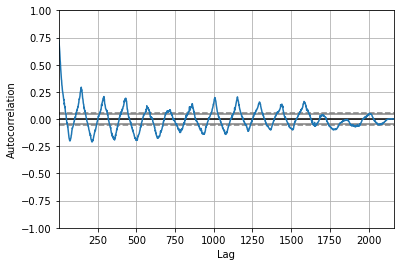

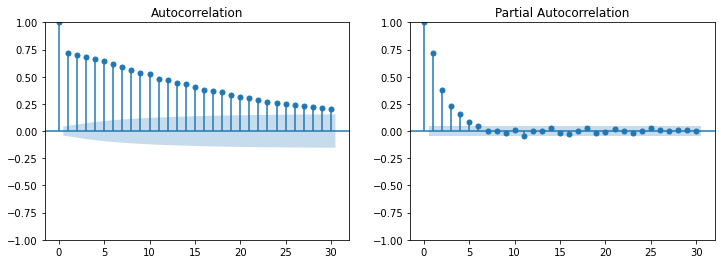

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# ---------------------------
# 1) Aggregate by time bin
# ---------------------------
# Suppose df_uber has columns: ["bin_index", "PULocationID", "Fare_per_Mile_uber", ...]
# We'll create a single series that is the average fare per time bin across all zones.
df_agg = df_uber.groupby("bin_index")["Fare_per_Mile_uber"].mean().sort_index()

# ---------------------------
# 2) Check or fill missing bins
# ---------------------------
# If bin_index is continuous (no missing time bins), we can proceed directly.
# Otherwise you might need to reindex or fill missing bins:
# all_bins = range(df_agg.index.min(), df_agg.index.max()+1)
# df_agg = df_agg.reindex(all_bins, fill_value=np.nan).interpolate()

# ---------------------------
# 3) Fit an ARIMA model
# ---------------------------
# order=(p,d,q). Example: AR(1) with no differencing, no MA (p=1,d=0,q=0)
model = ARIMA(df_agg, order=(1,0,0))
results = model.fit()

print(results.summary())

# ---------------------------
# 4) Inspect ACF/PACF
# ---------------------------
# You can plot the autocorrelation to inform the choice of p, d, q:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_agg)
plt.show()

# or use statsmodels:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_agg, ax=axes[0], lags=30)
plot_pacf(df_agg, ax=axes[1], lags=30)
plt.show()


C:\Users\pvp373\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pvp373\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pvp373\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     Fare_per_Mile_lyft   No. Observations:                 2162
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2600.853
Date:                Wed, 12 Feb 2025   AIC                           5207.706
Time:                        13:56:22   BIC                           5224.742
Sample:                             0   HQIC                          5213.936
                               - 2162                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6314      0.186     35.694      0.000       6.267       6.996
ar.L1          0.8600      0.004    236.940      0.000       0.853       0.867
sigma2         0.6489      0.003    193.862      0.0

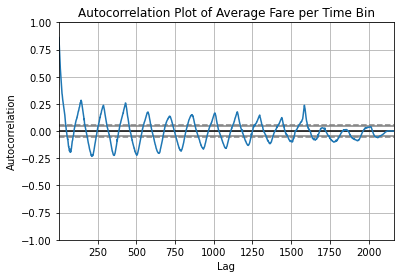

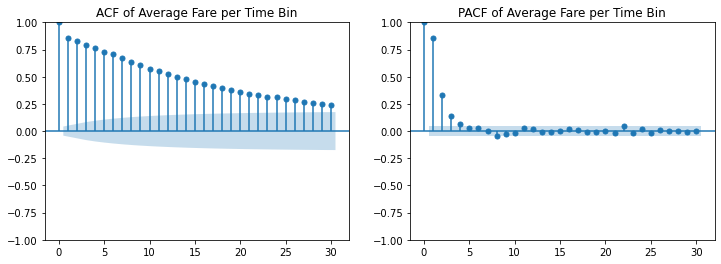

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# ---------------------------
# 1) Aggregate by time bin
# ---------------------------
# Suppose df_lyft has columns: ["bin_index", "PULocationID", "Fare_per_Mile_lyft", ...]
# We'll create a single series that is the average fare per time bin across all zones.
df_agg = df_lyft.groupby("bin_index")["Fare_per_Mile_lyft"].mean().sort_index()

# ---------------------------
# 2) Check or fill missing bins
# ---------------------------
# If bin_index is continuous (no missing time bins), we can proceed directly.
# Otherwise you might need to reindex or fill missing bins:
# all_bins = range(df_agg.index.min(), df_agg.index.max() + 1)
# df_agg = df_agg.reindex(all_bins, fill_value=np.nan).interpolate()

# ---------------------------
# 3) Fit an ARIMA model
# ---------------------------
# Order=(p,d,q). Example: AR(1) with no differencing, no MA (p=1, d=0, q=0)
model = ARIMA(df_agg, order=(1, 0, 0))
results = model.fit()

print(results.summary())

# ---------------------------
# 4) Inspect ACF/PACF
# ---------------------------
# Option 1: Using pandas' autocorrelation plot
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_agg)
plt.title("Autocorrelation Plot of Average Fare per Time Bin")
plt.show()

# Option 2: Using statsmodels' ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_agg, ax=axes[0], lags=30)
axes[0].set_title("ACF of Average Fare per Time Bin")
plot_pacf(df_agg, ax=axes[1], lags=30)
axes[1].set_title("PACF of Average Fare per Time Bin")
plt.show()


In [23]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# 1) Sort by zone and time
df_uber = df_uber.sort_values(["PULocationID", "bin_index"])

# 2) We’ll store the model results in a dictionary
results_dict = {}
unique_zones = df_uber["PULocationID"].unique()

for zone in unique_zones:
    # Subset data for this zone
    df_zone = df_uber[df_uber["PULocationID"] == zone].copy()
    
    # Ensure bin_index is sorted and continuous if possible
    df_zone = df_zone.sort_values("bin_index")
    
    # Optional: reindex if there are missing time bins
    # (only if your bin_index is numeric and you want a consecutive index)
    # all_bins = range(df_zone["bin_index"].min(), df_zone["bin_index"].max()+1)
    # df_zone = df_zone.set_index("bin_index").reindex(all_bins)
    # df_zone["Fare_per_Mile_uber"].interpolate(inplace=True)
    
    # Skip if too few observations for ARIMA
    if len(df_zone) < 10:
        continue
    
    # 3) Fit ARIMA(1,0,0) as an example
    y = df_zone["Fare_per_Mile_uber"].values
    model = ARIMA(y, order=(1,0,0))  # Adjust p,d,q as needed
    try:
        fitted = model.fit()
        results_dict[zone] = fitted
    except Exception as e:
        print(f"Zone {zone}: ARIMA failed. Reason: {str(e)}")

# 4) Inspect results for a particular zone
zone_sample = unique_zones[0]
if zone_sample in results_dict:
    print(f"Results for zone {zone_sample}")
    print(results_dict[zone_sample].summary())

# 5) Alternatively, do something with all results
for z, res in results_dict.items():
    print(f"Zone: {z}, AIC: {res.aic}, BIC: {res.bic}, AR1 coeff: {res.arparams}")


Results for zone 10
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2134
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -5464.418
Date:                Wed, 12 Feb 2025   AIC                          10934.836
Time:                        13:57:20   BIC                          10951.833
Sample:                             0   HQIC                         10941.057
                               - 2134                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3489      0.106     50.545      0.000       5.142       5.556
ar.L1          0.0575      0.020      2.911      0.004       0.019       0.096
sigma2         9.8100      0.110

In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# 1) Sort by zone and time for Lyft
df_lyft = df_lyft.sort_values(["PULocationID", "bin_index"])

# 2) We'll store the model results in a dictionary
results_dict = {}
unique_zones = df_lyft["PULocationID"].unique()

for zone in unique_zones:
    # Subset data for this zone
    df_zone = df_lyft[df_lyft["PULocationID"] == zone].copy()
    
    # Ensure bin_index is sorted (and continuous if possible)
    df_zone = df_zone.sort_values("bin_index")
    
    # Optional: reindex if there are missing time bins
    # Uncomment and adjust the following lines if needed:
    # all_bins = range(df_zone["bin_index"].min(), df_zone["bin_index"].max() + 1)
    # df_zone = df_zone.set_index("bin_index").reindex(all_bins)
    # df_zone["Fare_per_Mile_lyft"].interpolate(inplace=True)
    
    # Skip if too few observations for ARIMA
    if len(df_zone) < 10:
        continue
    
    # 3) Fit ARIMA(1,0,0) as an example
    y = df_zone["Fare_per_Mile_lyft"].values
    model = ARIMA(y, order=(1, 0, 0))  # Adjust p, d, q as needed
    try:
        fitted = model.fit()
        results_dict[zone] = fitted
    except Exception as e:
        print(f"Zone {zone}: ARIMA failed. Reason: {str(e)}")

# 4) Inspect results for a particular zone (using the first zone in unique_zones)
zone_sample = unique_zones[0]
if zone_sample in results_dict:
    print(f"Results for zone {zone_sample}")
    print(results_dict[zone_sample].summary())

# 5) Alternatively, iterate over all zones to do something with the results
for z, res in results_dict.items():
    print(f"Zone: {z}, AIC: {res.aic}, BIC: {res.bic}, AR1 coefficient: {res.arparams}")


Results for zone 10
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2046
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -5359.639
Date:                Wed, 12 Feb 2025   AIC                          10725.279
Time:                        13:58:10   BIC                          10742.150
Sample:                             0   HQIC                         10731.466
                               - 2046                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7628      0.126     45.835      0.000       5.516       6.009
ar.L1          0.0498      0.023      2.184      0.029       0.005       0.094
sigma2        11.0371      0.140

In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Example: pick a single zone
zone_data = df_uber[df_uber["PULocationID"] == "10"].sort_values("bin_index")

# Extract the time series
y = zone_data["Fare_per_Mile_uber"].values

# Candidate (p,d,q) tuples you want to test
candidate_orders = [
    (1, 0, 0),  # AR(1)
    (2, 0, 0),  # AR(2)
    (1, 0, 1),  # ARMA(1,1)
    (2, 0, 1),  # ARMA(2,1)
    # etc., you can add more if you'd like
]

best_aic = np.inf
best_order = None
best_model = None

for order in candidate_orders:
    try:
        model = ARIMA(y, order=order)
        results = model.fit()
        print(f"Order {order}, AIC={results.aic:.2f}, BIC={results.bic:.2f}, AR params={results.arparams if len(results.arparams) else 'N/A'}")

        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results
    except Exception as e:
        print(f"Order {order} failed: {e}")
        continue

print("-"*50)
print(f"Best order: {best_order}, AIC={best_aic:.2f}")
print(best_model.summary())


Order (1, 0, 0), AIC=10934.84, BIC=10951.83, AR params=[0.05746529]
Order (2, 0, 0), AIC=10932.37, BIC=10955.03, AR params=[0.05482024 0.04574983]
Order (1, 0, 1), AIC=10920.93, BIC=10943.59, AR params=[0.8134895]
Order (2, 0, 1), AIC=10922.21, BIC=10950.54, AR params=[0.75676793 0.02206632]
--------------------------------------------------
Best order: (1, 0, 1), AIC=10920.93
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2134
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5456.464
Date:                Wed, 12 Feb 2025   AIC                          10920.928
Time:                        13:58:12   BIC                          10943.591
Sample:                             0   HQIC                         10929.223
                               - 2134                                         
Covariance Type:                  opg                              

In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Example: pick a single zone from the Lyft data (e.g., zone "10")
zone_data = df_lyft[df_lyft["PULocationID"] == "10"].sort_values("bin_index")

# Extract the time series (ensure the column name matches your Lyft data)
y = zone_data["Fare_per_Mile_lyft"].values

# Candidate (p,d,q) tuples you want to test
candidate_orders = [
    (1, 0, 0),  # AR(1)
    (2, 0, 0),  # AR(2)
    (1, 0, 1),  # ARMA(1,1)
    (2, 0, 1),  # ARMA(2,1)
    # You can add more orders as needed
]

best_aic = np.inf
best_order = None
best_model = None

# Loop over candidate orders and fit an ARIMA model for each
for order in candidate_orders:
    try:
        model = ARIMA(y, order=order)
        results = model.fit()
        print(f"Order {order}, AIC={results.aic:.2f}, BIC={results.bic:.2f}, AR params={results.arparams if len(results.arparams) else 'N/A'}")

        # Check if this model has a lower AIC than the current best
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results
    except Exception as e:
        print(f"Order {order} failed: {e}")
        continue

print("-" * 50)
print(f"Best order: {best_order}, AIC={best_aic:.2f}")
print(best_model.summary())


Order (1, 0, 0), AIC=10725.28, BIC=10742.15, AR params=[0.04976688]
Order (2, 0, 0), AIC=10726.30, BIC=10748.79, AR params=[0.04883256 0.02280142]
Order (1, 0, 1), AIC=10717.51, BIC=10740.01, AR params=[0.94246193]
Order (2, 0, 1), AIC=10719.04, BIC=10747.16, AR params=[ 0.96608586 -0.01684388]
--------------------------------------------------
Best order: (1, 0, 1), AIC=10717.51
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2046
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5354.757
Date:                Wed, 12 Feb 2025   AIC                          10717.514
Time:                        13:58:14   BIC                          10740.008
Sample:                             0   HQIC                         10725.764
                               - 2046                                         
Covariance Type:                  opg                           

In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Suppose df_uber has columns ["PULocationID", "bin_index", "Fare_per_Mile_uber"]
# We'll store results in a dictionary
results_dict = {}

# Define candidate orders (p,d,q) you want to try
candidate_orders = [
    (1, 0, 0),
    (2, 0, 0),
    (1, 0, 1),
    (2, 0, 1),
    # Add or remove as you see fit
]

# Get unique zones
unique_zones = df_uber["PULocationID"].unique()

for zone in unique_zones:
    # 1) Subset the data for this zone
    df_zone = df_uber[df_uber["PULocationID"] == zone].copy()
    # 2) Sort by time (bin_index)
    df_zone = df_zone.sort_values("bin_index")

    # If too few data points, skip
    if len(df_zone) < 10:
        continue

    # 3) Extract the numeric series
    y = df_zone["Fare_per_Mile_uber"].values

    best_aic = np.inf
    best_order = None
    best_model = None

    # 4) Loop over candidate orders
    for order in candidate_orders:
        try:
            model = ARIMA(y, order=order)
            fitted = model.fit()
            
            # Check if AIC improves
            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_order = order
                best_model = fitted
        except Exception as e:
            print(f"Zone {zone}, order {order} failed: {e}")
            continue

    # 5) Store the best model's info for this zone (if any model succeeded)
    if best_model:
        results_dict[zone] = {
            "best_order": best_order,
            "best_aic": best_aic,
            "model": best_model
        }

# After the loop, results_dict will have an entry per zone with the best-fitting model


C:\Users\pvp373\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pvp373\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Suppose df_lyft has columns ["PULocationID", "bin_index", "Fare_per_Mile_lyft"]
# We'll store results in a dictionary
results_dict = {}

# Define candidate orders (p,d,q) you want to try
candidate_orders = [
    (1, 0, 0),
    (2, 0, 0),
    (1, 0, 1),
    (2, 0, 1),
    # Add or remove as you see fit
]

# Get unique zones from the Lyft data
unique_zones = df_lyft["PULocationID"].unique()

for zone in unique_zones:
    # 1) Subset the data for this zone
    df_zone = df_lyft[df_lyft["PULocationID"] == zone].copy()
    # 2) Sort by time (bin_index)
    df_zone = df_zone.sort_values("bin_index")

    # If too few data points, skip this zone
    if len(df_zone) < 10:
        continue

    # 3) Extract the numeric series for fare per mile
    y = df_zone["Fare_per_Mile_lyft"].values

    best_aic = np.inf
    best_order = None
    best_model = None

    # 4) Loop over candidate orders and fit an ARIMA model for each
    for order in candidate_orders:
        try:
            model = ARIMA(y, order=order)
            fitted = model.fit()

            # Check if AIC improves and update best model if so
            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_order = order
                best_model = fitted
        except Exception as e:
            print(f"Zone {zone}, order {order} failed: {e}")
            continue

    # 5) Store the best model's info for this zone (if any model succeeded)
    if best_model:
        results_dict[zone] = {
            "best_order": best_order,
            "best_aic": best_aic,
            "model": best_model
        }

# After the loop, results_dict will have an entry per zone with the best-fitting model


C:\Users\pvp373\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
for z, info in results_dict.items():
    print(f"Zone {z} -> best order={info['best_order']}, AIC={info['best_aic']:.2f}")


Zone 10 -> best order=(1, 0, 1), AIC=10717.51
Zone 100 -> best order=(1, 0, 1), AIC=20034.74
Zone 101 -> best order=(1, 0, 1), AIC=6192.81
Zone 102 -> best order=(2, 0, 1), AIC=8936.54
Zone 106 -> best order=(2, 0, 1), AIC=9639.55
Zone 107 -> best order=(1, 0, 1), AIC=12270.37
Zone 108 -> best order=(1, 0, 1), AIC=7754.91
Zone 109 -> best order=(2, 0, 1), AIC=5119.12
Zone 11 -> best order=(1, 0, 1), AIC=7415.81
Zone 111 -> best order=(1, 0, 0), AIC=399.82
Zone 112 -> best order=(2, 0, 1), AIC=10594.21
Zone 113 -> best order=(1, 0, 1), AIC=11912.09
Zone 114 -> best order=(1, 0, 1), AIC=12242.11
Zone 115 -> best order=(1, 0, 1), AIC=6735.62
Zone 116 -> best order=(1, 0, 1), AIC=12253.56
Zone 117 -> best order=(1, 0, 0), AIC=15507.93
Zone 118 -> best order=(1, 0, 0), AIC=16591.09
Zone 119 -> best order=(1, 0, 1), AIC=11302.34
Zone 12 -> best order=(2, 0, 0), AIC=1546.88
Zone 120 -> best order=(2, 0, 1), AIC=1005.84
Zone 121 -> best order=(1, 0, 1), AIC=8856.67
Zone 122 -> best order=(1, 0

In [30]:
zone_example = next(iter(results_dict))  # pick one zone from dict
model = results_dict[zone_example]["model"]
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2046
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5354.757
Date:                Wed, 12 Feb 2025   AIC                          10717.514
Time:                        14:09:14   BIC                          10740.008
Sample:                             0   HQIC                         10725.764
                               - 2046                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7700      0.176     32.744      0.000       5.425       6.115
ar.L1          0.9425      0.036     25.845      0.000       0.871       1.014
ma.L1         -0.9134      0.044    -20.927      0.0

In [31]:
import geopandas as gpd
import libpysal

# Suppose you have a GeoDataFrame with geometries for each zone
# gdf_zones = gpd.read_file("path_to_your_shapefile_or_geojson")

# Create a K-nearest neighbors weights object
# k=3 means each zone will have at least 3 neighbors
w_knn = libpysal.weights.KNN.from_dataframe(gdf_zones, k=3)

# Optionally, you might want to normalize weights
# (There are different transforms: 'R' for row-standardized, etc.)
w_knn.transform = "R"

# Now, w_knn can be used with esda Moran
# You can check the weights:
print("KNN Weights neighbors example:", list(w_knn.neighbors.items())[:5])
print("KNN ID order:", w_knn.id_order[:5])





KNN Weights neighbors example: [(0, [155, 186, 205]), (1, [29, 116, 200]), (2, [184, 31, 50]), (3, [78, 223, 231]), (4, [203, 83, 98])]
KNN ID order: [0, 1, 2, 3, 4]


In [32]:
# Queen contiguity: polygons are neighbors if they touch at edges OR corners.
w_queen = libpysal.weights.Queen.from_dataframe(gdf_zones)
w_queen.transform = 'R'

# Rook contiguity: polygons are neighbors if they share an edge (no diagonal corners).
w_rook = libpysal.weights.Rook.from_dataframe(gdf_zones)
w_rook.transform = 'R'

# Check neighbors
print("Queen neighbors example:", list(w_queen.neighbors.items())[:5])
print("Rook neighbors example:", list(w_rook.neighbors.items())[:5])


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 102, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 104, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 102, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 104, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')
Queen neighbors example: [(0, []), (1, [131, 29]), (2, [80, 241, 50, 183, 184, 253, 31]), (3, [223, 147, 78, 231]), (4, [98, 83, 203])]
Rook neighbors example: [(0, []), (1, [131, 29]), (2, [80, 241, 183, 184, 253, 31]), (3, [223, 78, 231]), (4, [98, 83, 203])]


In [33]:
islands = w_queen.islands  # or w_rook.islands
print("Island indices:", islands)


Island indices: [0, 45, 102, 103, 104, 201]


In [34]:
import libpysal

# 1. Identify the island indices in the weights
islands = w_queen.islands
print("Island indices:", islands)

# 2. Convert these indices to the actual GeoDataFrame's index labels
#    Since w_queen.id_order defines the row order for w_queen,
#    the island indices refer to positions in that list.
island_ids = [gdf_zones.index[i] for i in islands]
print("Island IDs in gdf_zones:", island_ids)

# 3. Drop those rows from the GeoDataFrame
gdf_zones_cleaned = gdf_zones.drop(index=island_ids)

# 4. Rebuild the Queen contiguity weights on the cleaned GeoDataFrame
w_queen_cleaned = libpysal.weights.Queen.from_dataframe(gdf_zones_cleaned)

# 5. (Optional) transform the weights, e.g. row-standardize
w_queen_cleaned.transform = "R"

# Now you can use w_queen_cleaned without islands
print("New Queen weights (no islands) neighbors example:", list(w_queen_cleaned.neighbors.items())[:5])


Island indices: [0, 45, 102, 103, 104, 201]
Island IDs in gdf_zones: [0, 45, 102, 103, 104, 201]
New Queen weights (no islands) neighbors example: [(0, [28, 126]), (1, [48, 178, 179, 30, 247, 235, 78]), (2, [225, 217, 142, 76]), (3, [96, 81, 197]), (4, [112, 109, 214, 207])]


In [35]:
df_uber.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID_x,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,congestion_surcharge_Flag,LocationID_PU,Borough_PU,Zone_PU,service_zone_PU,LocationID_DU,Borough_DU,Zone_DU,service_zone_DU,pickup_time,dropoff_time,trip_duration,tnc_wait_time,pickup_month,pickup_hour,pickup_date,pickup_day_name,Daytime,pickup_day_of_week,pickup_day,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Morning,Afternoon,Evening,Midnight,uberx_basefare,uberXL_basefare,uberBlack_basefare,uberSUV_basefare,UberSUV,UberBlack,UberXL,UberX,PUrequest_date,Serial Number,minutes_since_start,bin_index,unique_id_PU,unique_id_DO,Fare_per_Mile_uber,Fare_per_Minute_uber,driver_pay_per_mile,minutes_since_start_request,bin_index_request,minutes_since_start_dropoff,bin_index_dropoff_x,minutes_since_start_pickup,bin_index_pickup,unique_id_pickup,unique_id_request,unique_id_dropoff,pickups_count_at_dropoff_y,requests_count_at_pickup,requests_count_at_dropoff,pickups_count_at_pickup,pickups_count_at_dropoff,dropoffs_count_at_pickup,dropoffs_count_at_dropoff,airport_trips_count_pickup,airport_trips_count_dropoff,shared_request_flag_count_pickup,shared_request_flag_count_dropoff,shared_match_flag_count_pickup,shared_match_flag_count_dropoff,avg_wait_time_request_pickup,avg_wait_time_request_dropoff,avg_wait_time_pickup_pickup,avg_wait_time_pickup_dropoff,avg_wait_time_dropoff_pickup,avg_wait_time_dropoff_dropoff,avg_fare_per_mile_request_pickup,avg_fare_per_mile_request_dropoff,avg_fare_per_mile_pickup_pickup,avg_fare_per_mile_pickup_dropoff,avg_fare_per_mile_dropoff_pickup,avg_fare_per_mile_dropoff_dropoff,DOLocationID_y,bin_index_dropoff_y,baseline_drivers,request_bin,total_baseline,availability_score,adjusted_drivers,trips_per_driver,wait_time,bin_index_dropoff,DOLocationID_x_merge,baseline_drivers_merge,request_bin_merge,tolled_trip_flag_count_pickup,tolled_trip_flag_count_dropoff,avg_base_fare_request_pickup,avg_trip_miles_request_pickup,avg_trip_duration_request_pickup,avg_driver_pay_request_pickup,avg_bcf_request_pickup,avg_sales_tax_request_pickup,congestion_time_flag,crosses_60th_st_flag,LocationID,Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1,"Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!12:00 a.m. to 4:59 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!5:00 a.m. to 5:29 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and o

In [ ]:
avg_fare_per_mile_request_pickup = f (Jan	Feb	Mar	April	May	June	July	Aug	Sept	Oct	Nov	Dec	Monday	Tuesday	Wednesday	Thursday	Friday	Saturday	Sunday	Morning	Afternoon	Evening	Midnight, dropoffs_count_at_pickup,airport_trips_count_pickup,shared_request_flag_count_pickup,adjusted_drivers ))

In [ ]:
requests_count_at_pickup = f (Total population_PU,MARITAL STATUS!!Population 15 years and over_PU	MARITAL STATUS!!Population 15 years and over!!Never married_PU	MARITAL STATUS!!Population 15 years and over!!Now married, except separated_PU	MARITAL STATUS!!Population 15 years and over!!Divorced or separated_PU	MARITAL STATUS!!Population 15 years and over!!Widowed_PU EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than high school graduate_PU	EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)_PU	EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college or associate's degree_PU	EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree_PU	EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_PU MARITAL STATUS!!Population 15 years and over!!Never married_DU	MARITAL STATUS!!Population 15 years and over!!Now married, except separated_DU	MARITAL STATUS!!Population 15 years and over!!Divorced or separated_DU	MARITAL STATUS!!Population 15 years and over!!Widowed_DU	EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than high school graduate_DU	EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)_DU	EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college or associate's degree_DU	EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree_DU	EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_DU  )

In [36]:
import libpysal
import numpy as np
import scipy.sparse as sp
from sklearn.metrics.pairwise import haversine_distances

# -------------------------------
# 1. Handle Islands in Spatial Data
# -------------------------------
# Use your existing code to remove islands
islands = w_queen.islands
island_ids = [gdf_zones.index[i] for i in islands]
gdf_zones_cleaned = gdf_zones.drop(index=island_ids)

# Rebuild weights on cleaned data
w_queen_cleaned = libpysal.weights.Queen.from_dataframe(gdf_zones_cleaned)
w_queen_cleaned.transform = 'R'

# -------------------------------
# 2. Create Spatial Weight Matrix
# -------------------------------
# Option 1: Use Queen contiguity (from cleaned data)
W_S = w_queen_cleaned.sparse

# Option 2: Use Distance-based weights (from your distance_df)
# Convert distance matrix to sparse inverse distance weights
max_distance = 3  # miles (adjust based on NYC zone sizes)
distance_matrix = distance_df.values

# Create inverse distance weights with threshold
W_S_dist = 1 / (1 + distance_matrix)
W_S_dist[distance_matrix > max_distance] = 0
np.fill_diagonal(W_S_dist, 0)
W_S_dist = sp.csr_matrix(W_S_dist)

# Choose which spatial matrix to use
USE_CONTIGUITY = True  # Set False for distance-based
W_S = W_S if USE_CONTIGUITY else W_S_dist

# -------------------------------
# 3. Align Trip Data with Zones (REVISED)
# -------------------------------
# Filter df_uber to match cleaned zones
valid_zone_ids = gdf_zones_cleaned['LocationID'].astype(str).unique().tolist()  # Use unique IDs

df_uber_clean = df_uber_filtered[
    df_uber_filtered['PULocationID'].isin(valid_zone_ids) &
    df_uber_filtered['DOLocationID_x'].isin(valid_zone_ids)
].copy()

# Ensure zone order matches spatial matrix (with unique IDs)
zone_order = gdf_zones_cleaned['LocationID'].astype(str).unique().tolist()  # Get unique sorted IDs

# Convert to categorical with verified unique categories
df_uber_clean['PULocationID'] = pd.Categorical(
    df_uber_clean['PULocationID'], 
    categories=zone_order,
    ordered=True
)

# Sort by zone THEN time bin to match Kronecker ordering
df_uber_clean = df_uber_clean.sort_values(['PULocationID', 'bin_index_request'])

# Verify no duplicates in zone_order
assert len(zone_order) == len(gdf_zones_cleaned['LocationID'].unique()), \
    "Zone order contains duplicates!"

# -------------------------------
# 4. Create Temporal Weight Matrix
# -------------------------------
# Get unique time bins from cleaned data
time_bins = sorted(df_uber_clean['bin_index_request'].unique())
n_time = len(time_bins)

# Create temporal adjacency matrix (24-hour periodicity)
period = 144  # 10-minute bins per day (24h * 6)
W_T = sp.lil_matrix((n_time, n_time))

for i in range(n_time - period):
    W_T[i, i + period] = 1  # Connect to same time tomorrow
    W_T[i, i + 1] = 1       # Connect to next time bin

W_T = W_T.tocsr()

# -------------------------------
# 5. Compute Kronecker Product
# -------------------------------
# Verify dimensions
print(f"Spatial matrix: {W_S.shape}, Temporal matrix: {W_T.shape}")

# Compute spatiotemporal matrix
W_ST = sp.kron(W_T, W_S, format='csr')

# -------------------------------
# 6. Verification and Inspection
# -------------------------------
print(f"Spatiotemporal matrix shape: {W_ST.shape}")
print(f"Non-zero elements: {W_ST.nnz}")

# Example: Check weights for first zone+time combination
sample_zone_idx = 0
sample_time_idx = 0
combined_idx = sample_time_idx * len(zone_order) + sample_zone_idx

print("\nSample neighbors in W_ST:")
print(W_ST[combined_idx].nonzero())

Spatial matrix: (257, 257), Temporal matrix: (2162, 2162)
Spatiotemporal matrix shape: (555634, 555634)
Non-zero elements: 5222584

Sample neighbors in W_ST:
(array([0, 0, 0, 0]), array([  285,   383, 37036, 37134]))


In [37]:
import libpysal
import numpy as np
import scipy.sparse as sp
from sklearn.metrics.pairwise import haversine_distances
import pandas as pd

# -------------------------------
# 1. Handle Islands in Spatial Data
# -------------------------------
# Remove islands based on Queen contiguity (using your existing weights)
islands = w_queen.islands
island_ids = [gdf_zones.index[i] for i in islands]
gdf_zones_cleaned = gdf_zones.drop(index=island_ids)

# Rebuild Queen weights on cleaned zones and set row-standardization
w_queen_cleaned = libpysal.weights.Queen.from_dataframe(gdf_zones_cleaned)
w_queen_cleaned.transform = 'R'

# -------------------------------
# 2. Create Spatial Weight Matrix
# -------------------------------
# Option 1: Use Queen contiguity weights from the cleaned zones
W_S = w_queen_cleaned.sparse

# Option 2: Use distance-based weights (from your precomputed distance_df)
max_distance = 3  # miles (adjust as needed based on NYC zone sizes)
distance_matrix = distance_df.values

# Create inverse distance weights with thresholding
W_S_dist = 1 / (1 + distance_matrix)
W_S_dist[distance_matrix > max_distance] = 0
np.fill_diagonal(W_S_dist, 0)
W_S_dist = sp.csr_matrix(W_S_dist)

# Choose which spatial weight matrix to use (set to False to use distance-based)
USE_CONTIGUITY = True
W_S = W_S if USE_CONTIGUITY else W_S_dist

# -------------------------------
# 3. Align Trip Data with Zones (REVISED) for Lyft
# -------------------------------
# Filter the Lyft trips to include only those with zones present in the cleaned taxi zones
valid_zone_ids = gdf_zones_cleaned['LocationID'].astype(str).unique().tolist()

df_lyft_clean = df_lyft_filtered[
    df_lyft_filtered['PULocationID'].isin(valid_zone_ids) &
    df_lyft_filtered['DOLocationID_x'].isin(valid_zone_ids)
].copy()

# Ensure the zone order matches the spatial weight matrix (using unique zone IDs)
zone_order = gdf_zones_cleaned['LocationID'].astype(str).unique().tolist()

# Convert the pickup zone IDs to a categorical type with the specified ordering
df_lyft_clean['PULocationID'] = pd.Categorical(
    df_lyft_clean['PULocationID'],
    categories=zone_order,
    ordered=True
)

# Sort the Lyft trips first by zone then by time bin (assumed here to be 'bin_index_request')
df_lyft_clean = df_lyft_clean.sort_values(['PULocationID', 'bin_index_request'])

# Verify that the zone ordering is unique
assert len(zone_order) == len(gdf_zones_cleaned['LocationID'].unique()), "Zone order contains duplicates!"

# -------------------------------
# 4. Create Temporal Weight Matrix
# -------------------------------
# Extract unique time bins from the cleaned Lyft data
time_bins = sorted(df_lyft_clean['bin_index_request'].unique())
n_time = len(time_bins)

# Create a temporal adjacency matrix. For example, we create connections for:
# - the next time bin, and
# - the same time on the next day (assuming 10-minute bins, 144 bins per day)
period = 144  # 10-minute bins per day (24h * 6)
W_T = sp.lil_matrix((n_time, n_time))

for i in range(n_time - period):
    W_T[i, i + 1] = 1        # Connect to next time bin
    W_T[i, i + period] = 1     # Connect to the same time in the next day

W_T = W_T.tocsr()

# -------------------------------
# 5. Compute the Spatiotemporal Weight Matrix via Kronecker Product
# -------------------------------
print(f"Spatial matrix shape: {W_S.shape}, Temporal matrix shape: {W_T.shape}")

# The spatiotemporal weight matrix is the Kronecker product of the temporal and spatial matrices
W_ST = sp.kron(W_T, W_S, format='csr')

# -------------------------------
# 6. Verification and Inspection
# -------------------------------
print(f"Spatiotemporal matrix shape: {W_ST.shape}")
print(f"Non-zero elements: {W_ST.nnz}")

# Example: Examine the neighbors for the first combined zone+time observation.
sample_zone_idx = 0
sample_time_idx = 0
combined_idx = sample_time_idx * len(zone_order) + sample_zone_idx

print("\nSample neighbors in W_ST:")
print(W_ST[combined_idx].nonzero())


Spatial matrix shape: (257, 257), Temporal matrix shape: (2162, 2162)
Spatiotemporal matrix shape: (555634, 555634)
Non-zero elements: 5222584

Sample neighbors in W_ST:
(array([0, 0, 0, 0]), array([  285,   383, 37036, 37134]))


In [38]:
df_uber_clean.shape

(468245, 243)

In [39]:
df_lyft_clean.shape

(423800, 250)

In [40]:
# Check zone neighbors
print(f"Zone 0 neighbors: {w_queen_cleaned.neighbors[0]}")

# Verify temporal periodicity
assert W_T[0, 1] == 1, "Missing next-bin connection"
assert W_T[0, 144] == 1, "Missing periodic connection"

# Convert 'PULocationID' to a categorical dtype so that the .cat accessor is available.
df_uber_clean['PULocationID'] = df_uber_clean['PULocationID'].astype('category')

# Confirm zone ordering by comparing the unique zones from the cleaned GeoDataFrame with the categories.
assert (gdf_zones_cleaned['LocationID'].astype(str).unique() ==
        df_uber_clean['PULocationID'].cat.categories).all(), "Zone ordering mismatch!"

print("Zone ordering is confirmed.")


Zone 0 neighbors: [28, 126]
Zone ordering is confirmed.


In [41]:
# Check zone neighbors
print(f"Zone 0 neighbors: {w_queen_cleaned.neighbors[0]}")

# Verify temporal periodicity
assert W_T[0, 1] == 1, "Missing next-bin connection"
assert W_T[0, 144] == 1, "Missing periodic connection"

# Confirm zone ordering
assert (gdf_zones_cleaned['LocationID'].astype(str).unique() 
        == df_lyft_clean['PULocationID'].cat.categories).all()

Zone 0 neighbors: [28, 126]


In [42]:
# Check zone neighbors
print(f"Zone 0 neighbors: {w_queen_cleaned.neighbors[0]}")

# Verify temporal periodicity
assert W_T[0, 1] == 1, "Missing next-bin connection"
assert W_T[0, 144] == 1, "Missing periodic connection"

# Convert 'PULocationID' to a categorical dtype so that the .cat accessor is available.
df_lyft_clean['PULocationID'] = df_lyft_clean['PULocationID'].astype('category')

# Confirm zone ordering by comparing the unique zones from the cleaned GeoDataFrame with the categories.
assert (gdf_zones_cleaned['LocationID'].astype(str).unique() ==
        df_lyft_clean['PULocationID'].cat.categories).all(), "Zone ordering mismatch!"

print("Zone ordering is confirmed.")


Zone 0 neighbors: [28, 126]
Zone ordering is confirmed.


In [42]:
print(w_queen_cleaned.neighbors[0])  # Should return [28, 126] or similar

[28, 126]


In [43]:
print(w_queen_cleaned.neighbors[0])  # Should return [28, 126] or similar

[28, 126]


In [21]:
df_uber_clean.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID_x,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,congestion_surcharge_Flag,LocationID_PU,Borough_PU,Zone_PU,service_zone_PU,LocationID_DU,Borough_DU,Zone_DU,service_zone_DU,pickup_time,dropoff_time,trip_duration,tnc_wait_time,pickup_month,pickup_hour,pickup_date,pickup_day_name,Daytime,pickup_day_of_week,pickup_day,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Morning,Afternoon,Evening,Midnight,uberx_basefare,uberXL_basefare,uberBlack_basefare,uberSUV_basefare,UberSUV,UberBlack,UberXL,UberX,PUrequest_date,Serial Number,minutes_since_start,bin_index,unique_id_PU,unique_id_DO,Fare_per_Mile_uber,Fare_per_Minute_uber,driver_pay_per_mile,minutes_since_start_request,bin_index_request,minutes_since_start_dropoff,bin_index_dropoff_x,minutes_since_start_pickup,bin_index_pickup,unique_id_pickup,unique_id_request,unique_id_dropoff,pickups_count_at_dropoff_y,requests_count_at_pickup,requests_count_at_dropoff,pickups_count_at_pickup,pickups_count_at_dropoff,dropoffs_count_at_pickup,dropoffs_count_at_dropoff,airport_trips_count_pickup,airport_trips_count_dropoff,shared_request_flag_count_pickup,shared_request_flag_count_dropoff,shared_match_flag_count_pickup,shared_match_flag_count_dropoff,avg_wait_time_request_pickup,avg_wait_time_request_dropoff,avg_wait_time_pickup_pickup,avg_wait_time_pickup_dropoff,avg_wait_time_dropoff_pickup,avg_wait_time_dropoff_dropoff,avg_fare_per_mile_request_pickup,avg_fare_per_mile_request_dropoff,avg_fare_per_mile_pickup_pickup,avg_fare_per_mile_pickup_dropoff,avg_fare_per_mile_dropoff_pickup,avg_fare_per_mile_dropoff_dropoff,DOLocationID_y,bin_index_dropoff_y,baseline_drivers,request_bin,total_baseline,availability_score,adjusted_drivers,trips_per_driver,wait_time,bin_index_dropoff,DOLocationID_x_merge,baseline_drivers_merge,request_bin_merge,tolled_trip_flag_count_pickup,tolled_trip_flag_count_dropoff,avg_base_fare_request_pickup,avg_trip_miles_request_pickup,avg_trip_duration_request_pickup,avg_driver_pay_request_pickup,avg_bcf_request_pickup,avg_sales_tax_request_pickup,congestion_time_flag,crosses_60th_st_flag,LocationID,Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1,"Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!12:00 a.m. to 4:59 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!5:00 a.m. to 5:29 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and o

In [66]:
df_lyft_clean.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID_x,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,congestion_surcharge_Flag,LocationID_PU,Borough_PU,Zone_PU,service_zone_PU,LocationID_DU,Borough_DU,Zone_DU,service_zone_DU,pickup_time,dropoff_time,trip_duration,tnc_wait_time,pickup_month,pickup_hour,pickup_date,pickup_day_name,Daytime,pickup_day_of_week,pickup_day,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Morning,Afternoon,Evening,Midnight,lyft_basefare,lyftXL_basefare,lyftExComf_basefare,lyftBlack_basefare,lyftBlackXL_basefare,Serial Number,lyft,lyftXL,lyftExComf,lyftBlack,lyftBlackXL,PUrequest_date,minutes_since_start,bin_index,unique_id_PU,unique_id_DO,Fare_per_Mile_lyft,Fare_per_Minute_lyft,driver_pay_per_mile,minutes_since_start_request,bin_index_request,minutes_since_start_dropoff,bin_index_dropoff_x,minutes_since_start_pickup,bin_index_pickup,unique_id_pickup,unique_id_request,unique_id_dropoff,requests_count_at_pickup,requests_count_at_dropoff,pickups_count_at_pickup,pickups_count_at_dropoff,dropoffs_count_at_pickup,dropoffs_count_at_dropoff,airport_trips_count_pickup,airport_trips_count_dropoff,shared_request_flag_count_pickup,shared_request_flag_count_dropoff,shared_match_flag_count_pickup,shared_match_flag_count_dropoff,avg_fare_request_pickup,avg_fare_request_dropoff,avg_fare_pickup_pickup,avg_fare_pickup_dropoff,avg_fare_dropoff_pickup,avg_fare_dropoff_dropoff,avg_wait_time_request_pickup,avg_wait_time_request_dropoff,avg_wait_time_pickup_pickup,avg_wait_time_pickup_dropoff,avg_wait_time_dropoff_pickup,avg_wait_time_dropoff_dropoff,avg_fare_per_mile_request_pickup,avg_fare_per_mile_request_dropoff,avg_fare_per_mile_pickup_pickup,avg_fare_per_mile_pickup_dropoff,avg_fare_per_mile_dropoff_pickup,avg_fare_per_mile_dropoff_dropoff,DOLocationID_y,bin_index_dropoff_y,baseline_drivers,request_bin,total_baseline,availability_score,adjusted_drivers,trips_per_driver,wait_time,bin_index_dropoff,DOLocationID_x_merge,baseline_drivers_merge,request_bin_merge,tolled_trip_flag_count_pickup,tolled_trip_flag_count_dropoff,avg_base_fare_request_pickup_lyft,avg_trip_miles_request_pickup_lyft,avg_trip_duration_request_pickup_lyft,avg_driver_pay_request_pickup_lyft,avg_bcf_request_pickup_lyft,avg_sales_tax_request_pickup_lyft,congestion_time_flag,crosses_60th_st_flag,LocationID,Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1,"Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!12:00 a.m. to 4:59 a.m._PU","Estimate!!Car, truck, or van -- carpoo

In [ ]:
Feb	Mar	April	May	June	July	Aug	Sept	Oct	Nov	Dec	Monday	Tuesday	Wednesday	Thursday	Friday	Saturday	Sunday	Morning	Afternoon	Evening	Midnight wait_time

In [20]:
# --- Extract Residuals from Your OLS Fare Model ---
# (Assuming your OLS results from the fare equation are stored in results_fare)
df_uber_clean['residuals_fare'] = results_fare.resids

# --- Aggregate Residuals by Zone ---
# For each zone, calculate the mean residual
zone_resid = df_uber_clean.groupby('PULocationID')['residuals_fare'].mean()

# --- Compute Moran's I ---
# Ensure that your spatial weight matrix (w_queen_cleaned) is built on the same zones and in the same order as zone_resid.
# If needed, reindex zone_resid to match the weight matrix id order.
import esda
from libpysal.weights import Queen

# For example, if w_queen_cleaned is built on a GeoDataFrame `gdf_zones_cleaned` with index or a column 'LocationID',
# you may want to ensure that the order of zones in zone_resid is the same as in w_queen_cleaned.id_order.
# (Assuming that has already been handled.)
moran_obj = esda.moran.Moran(zone_resid.values, w_queen_cleaned, permutations=999)
print(f"Moran's I: {moran_obj.I:.4f}, p-value: {moran_obj.p_sim:.4f}")


NameError: name 'results_fare' is not defined

In [ ]:
import pandas as pd
import statsmodels.api as sm
import esda
from libpysal.weights import Queen

# --- Example OLS Model for Lyft Fare ---
# Suppose your cleaned DataFrame is df_lyft_clean and the fare variable is "Fare_per_Mile_lyft".
# Also, suppose you have some predictors in columns 'predictor1', 'predictor2', etc.
# (Replace these with your actual predictor column names.)

# Define the dependent and independent variables
y = df_lyft_clean["Fare_per_Mile_lyft"]
X = df_lyft_clean[["predictor1", "predictor2"]]  # Replace with your actual predictor columns
X = sm.add_constant(X)  # Adds an intercept to the model

# Fit the OLS model
results_fare = sm.OLS(y, X).fit()

# --- Extract Residuals from Your OLS Fare Model ---
df_lyft_clean['residuals_fare'] = results_fare.resids

# --- Aggregate Residuals by Zone ---
# For each zone, calculate the mean residual
zone_resid = df_lyft_clean.groupby('PULocationID')['residuals_fare'].mean()

# --- Compute Moran's I ---
# (Ensure that your spatial weight matrix w_queen_cleaned is built on the same zones and in the same order as zone_resid)
# For example, if w_queen_cleaned was built from a GeoDataFrame (gdf_zones_cleaned) with a 'LocationID' column,
# make sure that the ordering of zone IDs in zone_resid matches the id_order attribute of w_queen_cleaned.

# Compute Moran's I using the aggregated residuals
moran_obj = esda.moran.Moran(zone_resid.values, w_queen_cleaned, permutations=999)
print(f"Moran's I: {moran_obj.I:.4f}, p-value: {moran_obj.p_sim:.4f}")


In [21]:
# --- Extract Residuals from Your OLS Fare Model ---
# (Assuming your OLS results from the Lyft fare equation are stored in results_fare)
df_lyft_clean['residuals_fare'] = results_fare.resids

# --- Aggregate Residuals by Zone ---
# For each zone, calculate the mean residual
zone_resid = df_lyft_clean.groupby('PULocationID')['residuals_fare'].mean()

# --- Compute Moran's I ---
# Ensure that your spatial weight matrix (w_queen_cleaned) is built on the same zones and in the same order as zone_resid.
# If needed, reindex zone_resid to match the weight matrix ID order.
import esda
from libpysal.weights import Queen

moran_obj = esda.moran.Moran(zone_resid.values, w_queen_cleaned, permutations=999)
print(f"Moran's I: {moran_obj.I:.4f}, p-value: {moran_obj.p_sim:.4f}")


NameError: name 'results_fare' is not defined

In [28]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
from esda.moran import Moran

# ================================
# PART 1: Check Your Data Dimensions
# ================================

# (Assumes df_uber_clean is already sorted and aggregated at the 
#  (bin_index_request, PULocationID) level.)
unique_bins = df_uber_clean['bin_index_request'].unique()
unique_zones = df_uber_clean['PULocationID'].unique()

num_bins = len(unique_bins)     # e.g., 2162 (as in your output)
num_zones = len(unique_zones)   # e.g., 255 zones

print("Number of time bins (10-min bins over 7 days):", num_bins)
print("Number of zones (PULocationID):", num_zones)

# ================================
# PART 2: Check Weight Matrix Dimensions
# ================================

# --- Spatial Weight Matrix W_S ---
# For demonstration, we build a dummy spatial weight matrix using a ring.
def build_spatial_weights(zones):
    n = len(zones)
    row_ind = []
    col_ind = []
    data = []
    for i in range(n):
        # Self-weight
        row_ind.append(i)
        col_ind.append(i)
        data.append(1)
        # Next neighbor (cyclic)
        row_ind.append(i)
        col_ind.append((i+1) % n)
        data.append(1)
        # Previous neighbor (cyclic)
        row_ind.append(i)
        col_ind.append((i-1) % n)
        data.append(1)
    # Force data to be floats by specifying dtype=np.float64
    W_S = sp.coo_matrix((np.array(data, dtype=np.float64), (row_ind, col_ind)), shape=(n, n)).tocsr()
    # Row-standardize:
    row_sums = np.array(W_S.sum(axis=1)).flatten()
    row_sums[row_sums == 0] = 1
    for i in range(n):
        W_S.data[W_S.indptr[i]:W_S.indptr[i+1]] /= row_sums[i]
    return W_S

# Build a dummy spatial weights matrix from the unique zones.
W_S_dummy = build_spatial_weights(unique_zones)
print("Spatial weights matrix (W_S) shape (dummy):", W_S_dummy.shape)  # Expected: (num_zones, num_zones)

# --- Temporal Weight Matrix W_T ---
def build_temporal_weights(bins_array):
    m = len(bins_array)
    row_ind = []
    col_ind = []
    data = []
    for i in range(m):
        # Self
        row_ind.append(i)
        col_ind.append(i)
        data.append(1)
        # Next neighbor (if exists)
        if i < m - 1:
            row_ind.append(i)
            col_ind.append(i+1)
            data.append(1)
        # Previous neighbor (if exists)
        if i > 0:
            row_ind.append(i)
            col_ind.append(i-1)
            data.append(1)
    # Force data to float as well.
    W_T = sp.coo_matrix((np.array(data, dtype=np.float64), (row_ind, col_ind)), shape=(m, m)).tocsr()
    # Row-standardize:
    row_sums = np.array(W_T.sum(axis=1)).flatten()
    row_sums[row_sums == 0] = 1
    for i in range(m):
        W_T.data[W_T.indptr[i]:W_T.indptr[i+1]] /= row_sums[i]
    return W_T

W_T = build_temporal_weights(unique_bins)
print("Temporal weights matrix (W_T) shape:", W_T.shape)  # Expected: (num_bins, num_bins)

# --- Spatiotemporal Weight Matrix W_ST ---
# Compute the Kronecker product: (time bins * zones) x (time bins * zones)
W_ST = sp.kron(W_T, W_S_dummy, format='csr')
print("Spatiotemporal weights matrix (W_ST) shape:", W_ST.shape)
# Expected: (num_bins * num_zones, num_bins * num_zones)

# ================================
# PART 3: Check Residuals and Aggregate to Zone Level
# ================================
# (Assumes your fare model has been estimated and the residuals are stored in 'residuals_fare'.)
zone_resid = df_uber_clean.groupby('PULocationID')['residuals_fare'].mean()
print("Number of zones with residuals:", zone_resid.shape[0])

# ================================
# PART 4: Filter and Compute Moran's I on the Zone-Level Residuals
# ================================

# At this point, you have:
# - zone_resid: aggregated residuals by zone (its index are zone IDs)
# - w_queen_cleaned: your cleaned Queen weights object, whose id_order gives the zone IDs it uses.

# Get the set of zone IDs from the spatial weights:
w_zone_ids = set(w_queen_cleaned.id_order)
# Get the set of zone IDs with residuals:
resid_zone_ids = set(zone_resid.index)

# Find the common zone IDs:
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated residuals to only these common IDs.
zone_resid_aligned = zone_resid.reindex(common_zone_ids)
print("Any missing values in zone_resid_aligned:", zone_resid_aligned.isnull().any())  # Should be False

# Now, create a filtered weights dictionary from w_queen_cleaned
neighbors_all = w_queen_cleaned.neighbors  # dictionary: {zone: [list of neighbor zones]}
neighbors_subset = {
    zone: [nbr for nbr in neighbors_all[zone] if nbr in common_zone_ids]
    for zone in common_zone_ids if zone in neighbors_all
}

# Create a new weights object using the filtered dictionary.
w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Make sure the number of observations in the new weights equals the length of zone_resid_aligned.
print("Filtered weights n:", w_subset.n, "and zone_resid_aligned length:", len(zone_resid_aligned))

# Ensure the residuals are a 1D array.
y = zone_resid_aligned.values.flatten()

# Compute Moran's I for the zone-level residuals.
moran_obj = Moran(y, w_subset, permutations=999)
print(f"Moran's I: {moran_obj.I:.4f}, p-value: {moran_obj.p_sim:.4f}")


Number of time bins (10-min bins over 7 days): 2162
Number of zones (PULocationID): 255
Spatial weights matrix (W_S) shape (dummy): (255, 255)
Temporal weights matrix (W_T) shape: (2162, 2162)
Spatiotemporal weights matrix (W_ST) shape: (551310, 551310)


KeyError: 'Column not found: residuals_fare'

In [22]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
from esda.moran import Moran

# ================================
# PART 1: Check Your Data Dimensions
# ================================

# (Assumes df_lyft_clean is already sorted and aggregated at the 
#  (bin_index_request, PULocationID) level.)
unique_bins = df_lyft_clean['bin_index_request'].unique()
unique_zones = df_lyft_clean['PULocationID'].unique()

num_bins = len(unique_bins)     # e.g., number of 10-min bins over your analysis period
num_zones = len(unique_zones)   # e.g., total number of zones

print("Number of time bins (10-min bins):", num_bins)
print("Number of zones (PULocationID):", num_zones)

# ================================
# PART 2: Check Weight Matrix Dimensions
# ================================

# --- Spatial Weight Matrix W_S (Dummy Example) ---
# For demonstration, we build a dummy spatial weight matrix using a ring.
def build_spatial_weights(zones):
    n = len(zones)
    row_ind = []
    col_ind = []
    data = []
    for i in range(n):
        # Self-weight
        row_ind.append(i)
        col_ind.append(i)
        data.append(1)
        # Next neighbor (cyclic)
        row_ind.append(i)
        col_ind.append((i + 1) % n)
        data.append(1)
        # Previous neighbor (cyclic)
        row_ind.append(i)
        col_ind.append((i - 1) % n)
        data.append(1)
    # Convert data to floats and build sparse matrix
    W_S = sp.coo_matrix((np.array(data, dtype=np.float64), (row_ind, col_ind)), shape=(n, n)).tocsr()
    # Row-standardize:
    row_sums = np.array(W_S.sum(axis=1)).flatten()
    row_sums[row_sums == 0] = 1
    for i in range(n):
        W_S.data[W_S.indptr[i]:W_S.indptr[i+1]] /= row_sums[i]
    return W_S

# Build a dummy spatial weights matrix from the unique zones.
W_S_dummy = build_spatial_weights(unique_zones)
print("Spatial weights matrix (W_S) shape (dummy):", W_S_dummy.shape)  # Expected: (num_zones, num_zones)

# --- Temporal Weight Matrix W_T ---
def build_temporal_weights(bins_array):
    m = len(bins_array)
    row_ind = []
    col_ind = []
    data = []
    for i in range(m):
        # Self
        row_ind.append(i)
        col_ind.append(i)
        data.append(1)
        # Next neighbor (if exists)
        if i < m - 1:
            row_ind.append(i)
            col_ind.append(i + 1)
            data.append(1)
        # Previous neighbor (if exists)
        if i > 0:
            row_ind.append(i)
            col_ind.append(i - 1)
            data.append(1)
    # Convert data to float and build sparse matrix.
    W_T = sp.coo_matrix((np.array(data, dtype=np.float64), (row_ind, col_ind)), shape=(m, m)).tocsr()
    # Row-standardize:
    row_sums = np.array(W_T.sum(axis=1)).flatten()
    row_sums[row_sums == 0] = 1
    for i in range(m):
        W_T.data[W_T.indptr[i]:W_T.indptr[i+1]] /= row_sums[i]
    return W_T

W_T = build_temporal_weights(unique_bins)
print("Temporal weights matrix (W_T) shape:", W_T.shape)  # Expected: (num_bins, num_bins)

# --- Spatiotemporal Weight Matrix W_ST ---
# Compute the Kronecker product: (time bins * zones) x (time bins * zones)
W_ST = sp.kron(W_T, W_S_dummy, format='csr')
print("Spatiotemporal weights matrix (W_ST) shape:", W_ST.shape)
# Expected: (num_bins * num_zones, num_bins * num_zones)

# ================================
# PART 3: Check Residuals and Aggregate to Zone Level
# ================================
# (Assumes your fare model has been estimated and the residuals are stored in 'residuals_fare'.)
# Here, we add the residuals to df_lyft_clean if not already present:
# df_lyft_clean['residuals_fare'] = results_fare.resids
#
# Now, aggregate the residuals by zone:
zone_resid = df_lyft_clean.groupby('PULocationID')['residuals_fare'].mean()
print("Number of zones with residuals:", zone_resid.shape[0])

# ================================
# PART 4: Filter and Compute Moran's I on the Zone-Level Residuals
# ================================

# At this point, you have:
# - zone_resid: aggregated residuals by zone (its index contains zone IDs)
# - w_queen_cleaned: your cleaned Queen weights object (built earlier) with an attribute id_order listing its zone IDs.

# Get the set of zone IDs from the spatial weights:
w_zone_ids = set(w_queen_cleaned.id_order)
# Get the set of zone IDs with residuals:
resid_zone_ids = set(zone_resid.index)

# Find the common zone IDs:
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated residuals to only these common IDs.
zone_resid_aligned = zone_resid.reindex(common_zone_ids)
print("Any missing values in zone_resid_aligned:", zone_resid_aligned.isnull().any())  # Should be False

# Now, create a filtered weights dictionary from w_queen_cleaned
neighbors_all = w_queen_cleaned.neighbors  # dictionary: {zone: [list of neighbor zones]}
neighbors_subset = {
    zone: [nbr for nbr in neighbors_all[zone] if nbr in common_zone_ids]
    for zone in common_zone_ids if zone in neighbors_all
}

# Create a new weights object using the filtered dictionary.
w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Make sure the number of observations in the new weights equals the length of zone_resid_aligned.
print("Filtered weights n:", w_subset.n, "and zone_resid_aligned length:", len(zone_resid_aligned))

# Ensure the residuals are a 1D array.
y = zone_resid_aligned.values.flatten()

# Compute Moran's I for the zone-level residuals.
moran_obj = Moran(y, w_subset, permutations=999)
print(f"Moran's I: {moran_obj.I:.4f}, p-value: {moran_obj.p_sim:.4f}")


Number of time bins (10-min bins): 2162
Number of zones (PULocationID): 256
Spatial weights matrix (W_S) shape (dummy): (256, 256)
Temporal weights matrix (W_T) shape: (2162, 2162)
Spatiotemporal weights matrix (W_ST) shape: (553472, 553472)


KeyError: 'Column not found: residuals_fare'

In [29]:
# ================================
# PART 4: Filter and Compute Moran's I on the Zone-Level Residuals
# ================================

# Convert zone IDs to strings in both the DataFrame and the weights object.
df_uber_clean['PULocationID'] = df_uber_clean['PULocationID'].astype(str)
zone_resid = df_uber_clean.groupby('PULocationID')['residuals_fare'].mean()

# Ensure that w_queen_cleaned.id_order is also a list of strings:
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid.index.astype(str))

# Find the common zone IDs:
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated residuals to only these common IDs.
zone_resid_aligned = zone_resid.reindex(common_zone_ids)
print("Any missing values in zone_resid_aligned:", zone_resid_aligned.isnull().any())  # Should be False

# Now, create a filtered weights dictionary from w_queen_cleaned.
neighbors_all = w_queen_cleaned.neighbors  # dictionary: {zone: [list of neighbor zones]}
# Convert the keys and neighbor IDs to strings
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}

neighbors_subset = {
    zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
    for zone in common_zone_ids
}

# Create a new weights object using the filtered dictionary.
w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Make sure the number of observations in the new weights equals the length of zone_resid_aligned.
print("Filtered weights n:", w_subset.n, "and zone_resid_aligned length:", len(zone_resid_aligned))

# Ensure the residuals are a 1D array.
y = zone_resid_aligned.values.flatten()

# Compute Moran's I for the zone-level residuals.
moran_obj = Moran(y, w_subset, permutations=999)
print(f"Moran's I: {moran_obj.I:.4f}, p-value: {moran_obj.p_sim:.4f}")


KeyError: 'Column not found: residuals_fare'

In [30]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Run the Ljung-Box test on the fare residuals (e.g., using lag 10)
lb_test_results = acorr_ljungbox(df_uber_clean['residuals_fare'], lags=[10], return_df=True)
print(lb_test_results)


KeyError: 'residuals_fare'

<Figure size 576x288 with 0 Axes>

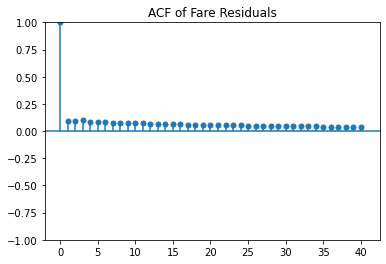

In [33]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8, 4))
plot_acf(df_uber_clean['residuals_fare'], lags=40)
plt.title("ACF of Fare Residuals")
plt.show()


In [31]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox

# --- Step 1: First Stage: Estimate Demand --- 
from linearmodels.iv import IV2SLS

# Example formula for demand
formula_demand = """
    requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)
"""

iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_uber_clean)
results_demand = iv_model_demand.fit()
df_uber_clean["predicted_demand"] = results_demand.predict().fitted_values

# --- Step 2: Second Stage: Estimate Fare Using Predicted Demand ---
formula_fare = """
    avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup + adjusted_drivers
"""

iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_uber_clean)
# Use clustered standard errors by PULocationID
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['PULocationID'])
print(results_fare.summary)

# --- Step 3: Create IV Residuals Column if Not Already Present ---
if 'residuals_fare_IV' not in df_uber_clean.columns:
    df_uber_clean['residuals_fare_IV'] = results_fare.resids
    print("Created column 'residuals_fare_IV' from IV model residuals.")
else:
    print("Column 'residuals_fare_IV' already exists.")

# (Optional) For comparison, you can also store the OLS residuals if needed:
if 'residuals_fare_OLS' not in df_uber_clean.columns:
    df_uber_clean['residuals_fare_OLS'] = results_fare.resids  # Replace with your OLS model residuals if different.
    print("Created column 'residuals_fare_OLS'.")
else:
    print("Column 'residuals_fare_OLS' already exists.")



# ========================================================
# PART 0: (Assumed Already Run)
# Two-stage IV estimation:
#   - First stage: Demand estimation.
#   - Second stage: Fare estimation.
#
# Example:
# --------------------------------------------------------------------
# from linearmodels.iv import IV2SLS
#
# formula_demand = """
#     requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
#     C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)
# """
# iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_uber_clean)
# results_demand = iv_model_demand.fit()
# df_uber_clean["predicted_demand"] = results_demand.predict().fitted_values
#
# formula_fare = """
#     avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
#     dropoffs_count_at_pickup + adjusted_drivers
# """
# iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_uber_clean)
# results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['PULocationID'])
# print(results_fare.summary)
#
# Additionally, you have already stored the OLS residuals in:
#   df_uber_clean['residuals_fare_OLS'] = results_fare.resids
# And the IV residuals in:
#   df_uber_clean['residuals_fare_IV']  = iv_results_fare.resids
# --------------------------------------------------------------------

# ========================================================
# PART A: Spatial Autocorrelation for IV Residuals (Moran's I)
# ========================================================

# Convert the zone IDs in df_uber_clean to strings for consistency.
df_uber_clean['PULocationID'] = df_uber_clean['PULocationID'].astype(str)

# Aggregate the IV residuals by zone.
zone_resid_IV = df_uber_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

# --- Align the aggregated residuals with the spatial weights ---
# We assume that your cleaned Queen weights object (w_queen_cleaned)
# has its zone IDs in its id_order attribute. Convert these to strings.
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))

# Find the common zone IDs.
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated IV residuals to only these common IDs.
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)
print("Any missing values in zone_resid_IV_aligned:", zone_resid_IV_aligned.isnull().any())  # Should be False

# (Optional: If you wish to filter the weights to only these zones, do as follows.)
neighbors_all = w_queen_cleaned.neighbors  # Original neighbors dictionary.
# Convert keys and neighbor IDs to strings.
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}

neighbors_subset = {
    zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
    for zone in common_zone_ids
}

w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Confirm that the filtered weights and residuals have the same length.
print("Filtered weights n:", w_subset.n, "and zone_resid_IV_aligned length:", len(zone_resid_IV_aligned))

# Compute Moran's I for the IV residuals.
moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"IV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ========================================================
# PART B: Temporal Autocorrelation (Ljung–Box Test)
# ========================================================

# We assume that the residuals (both OLS and IV) are available at the same frequency.
# Here we run the Ljung–Box test with lag 10.

# For OLS residuals:
lb_test_ols = acorr_ljungbox(df_uber_clean['residuals_fare_OLS'], lags=[10], return_df=True)
print("OLS Ljung–Box test:")
print(lb_test_ols)

# For IV residuals:
lb_test_iv = acorr_ljungbox(df_uber_clean['residuals_fare_IV'], lags=[10], return_df=True)
print("IV Ljung–Box test:")
print(lb_test_iv)


                                   OLS Estimation Summary                                   
Dep. Variable:     avg_fare_per_mile_request_pickup   R-squared:                      0.0354
Estimator:                                      OLS   Adj. R-squared:                 0.0354
No. Observations:                            468245   F-statistic:                    106.69
Date:                              Fri, Feb 07 2025   P-value (F-stat)                0.0000
Time:                                      09:25:33   Distribution:                  chi2(3)
Cov. Estimator:                           clustered                                         
                                                                                            
                                    Parameter Estimates                                     
                          Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------

In [67]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W  # For creating a new weights object
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox
from linearmodels.iv import IV2SLS

# ========================================================
# PART 1: Two-Stage IV Estimation for Lyft
# ========================================================

# --- Step 1: First Stage: Estimate Demand ---
# Example formula for demand.
# (Make sure that the variable names match those in your df_lyft_clean.)
formula_demand = """
    requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)
"""

iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_lyft_clean)
results_demand = iv_model_demand.fit()
df_lyft_clean["predicted_demand"] = results_demand.predict().fitted_values

# --- Step 2: Second Stage: Estimate Fare Using Predicted Demand ---
formula_fare = """
    avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup + adjusted_drivers
"""

iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_lyft_clean)
# Use clustered standard errors by PULocationID.
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_lyft_clean['PULocationID'])
print(results_fare.summary)

# --- Step 3: Create IV Residuals Column if Not Already Present ---
if 'residuals_fare_IV' not in df_lyft_clean.columns:
    df_lyft_clean['residuals_fare_IV'] = results_fare.resids
    print("Created column 'residuals_fare_IV' from IV model residuals.")
else:
    print("Column 'residuals_fare_IV' already exists.")

# (Optional) For comparison, store the OLS residuals if needed:
if 'residuals_fare_OLS' not in df_lyft_clean.columns:
    # Replace with your OLS model residuals if different.
    df_lyft_clean['residuals_fare_OLS'] = results_fare.resids  
    print("Created column 'residuals_fare_OLS'.")
else:
    print("Column 'residuals_fare_OLS' already exists.")

# ========================================================
# PART A: Spatial Autocorrelation for IV Residuals (Moran's I)
# ========================================================

# Convert the zone IDs in df_lyft_clean to strings for consistency.
df_lyft_clean['PULocationID'] = df_lyft_clean['PULocationID'].astype(str)

# --- Aggregate the IV residuals by zone ---
zone_resid_IV = df_lyft_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

# --- Align the aggregated residuals with the spatial weights ---
# (Assuming that w_queen_cleaned has its zone IDs stored in its id_order attribute.)
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))

# Find the common zone IDs.
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated IV residuals to only these common IDs.
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)
print("Any missing values in zone_resid_IV_aligned:", zone_resid_IV_aligned.isnull().any())  # Should be False

# --- (Optional) Filter the weights to only these zones ---
neighbors_all = w_queen_cleaned.neighbors  # Original neighbors dictionary.
# Convert keys and neighbor IDs to strings.
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}

neighbors_subset = {
    zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
    for zone in common_zone_ids
}

w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Confirm that the filtered weights and residuals have the same length.
print("Filtered weights n:", w_subset.n, "and zone_resid_IV_aligned length:", len(zone_resid_IV_aligned))

# --- Compute Moran's I for the IV residuals ---
moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"IV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ========================================================
# PART B: Temporal Autocorrelation (Ljung–Box Test)
# ========================================================

# We assume that the residuals (both OLS and IV) are available at the same frequency.
# Here, we run the Ljung–Box test with lag 10.

# For OLS residuals:
lb_test_ols = acorr_ljungbox(df_lyft_clean['residuals_fare_OLS'], lags=[10], return_df=True)
print("OLS Ljung–Box test:")
print(lb_test_ols)

# For IV residuals:
lb_test_iv = acorr_ljungbox(df_lyft_clean['residuals_fare_IV'], lags=[10], return_df=True)
print("IV Ljung–Box test:")
print(lb_test_iv)


                                   OLS Estimation Summary                                   
Dep. Variable:     avg_fare_per_mile_request_pickup   R-squared:                      0.0065
Estimator:                                      OLS   Adj. R-squared:                 0.0065
No. Observations:                            423800   F-statistic:                    126.83
Date:                              Fri, Feb 07 2025   P-value (F-stat)                0.0000
Time:                                      10:42:42   Distribution:                  chi2(3)
Cov. Estimator:                           clustered                                         
                                                                                            
                                    Parameter Estimates                                     
                          Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------

In [32]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox

# --- Step 1: First Stage: Estimate Demand --- 
from linearmodels.iv import IV2SLS

# Example formula for demand
formula_demand = """
    requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)
"""

iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_uber_clean)
results_demand = iv_model_demand.fit()
df_uber_clean["predicted_demand"] = results_demand.predict().fitted_values

# --- Step 2: Second Stage: Estimate Fare Using Predicted Demand ---
formula_fare = """
    avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup + adjusted_drivers +
    Thursday + Friday + Saturday + Sunday +
    Afternoon + Evening + Midnight + wait_time
"""


iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_uber_clean)
# Use clustered standard errors by PULocationID
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['PULocationID'])
print(results_fare.summary)

# --- Step 3: Create IV Residuals Column if Not Already Present ---
if 'residuals_fare_IV' not in df_uber_clean.columns:
    df_uber_clean['residuals_fare_IV'] = results_fare.resids
    print("Created column 'residuals_fare_IV' from IV model residuals.")
else:
    print("Column 'residuals_fare_IV' already exists.")

# (Optional) For comparison, you can also store the OLS residuals if needed:
if 'residuals_fare_OLS' not in df_uber_clean.columns:
    df_uber_clean['residuals_fare_OLS'] = results_fare.resids  # Replace with your OLS model residuals if different.
    print("Created column 'residuals_fare_OLS'.")
else:
    print("Column 'residuals_fare_OLS' already exists.")



# ========================================================
# PART 0: (Assumed Already Run)
# Two-stage IV estimation:
#   - First stage: Demand estimation.
#   - Second stage: Fare estimation.
#
# Example:
# --------------------------------------------------------------------
# from linearmodels.iv import IV2SLS
#
# formula_demand = """
#     requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
#     C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)
# """
# iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_uber_clean)
# results_demand = iv_model_demand.fit()
# df_uber_clean["predicted_demand"] = results_demand.predict().fitted_values
#
# formula_fare = """
#     avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
#     dropoffs_count_at_pickup + adjusted_drivers
# """
# iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_uber_clean)
# results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['PULocationID'])
# print(results_fare.summary)
#
# Additionally, you have already stored the OLS residuals in:
#   df_uber_clean['residuals_fare_OLS'] = results_fare.resids
# And the IV residuals in:
#   df_uber_clean['residuals_fare_IV']  = iv_results_fare.resids
# --------------------------------------------------------------------

# ========================================================
# PART A: Spatial Autocorrelation for IV Residuals (Moran's I)
# ========================================================

# Convert the zone IDs in df_uber_clean to strings for consistency.
df_uber_clean['PULocationID'] = df_uber_clean['PULocationID'].astype(str)

# Aggregate the IV residuals by zone.
zone_resid_IV = df_uber_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

# --- Align the aggregated residuals with the spatial weights ---
# We assume that your cleaned Queen weights object (w_queen_cleaned)
# has its zone IDs in its id_order attribute. Convert these to strings.
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))

# Find the common zone IDs.
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated IV residuals to only these common IDs.
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)
print("Any missing values in zone_resid_IV_aligned:", zone_resid_IV_aligned.isnull().any())  # Should be False

# (Optional: If you wish to filter the weights to only these zones, do as follows.)
neighbors_all = w_queen_cleaned.neighbors  # Original neighbors dictionary.
# Convert keys and neighbor IDs to strings.
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}

neighbors_subset = {
    zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
    for zone in common_zone_ids
}

w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Confirm that the filtered weights and residuals have the same length.
print("Filtered weights n:", w_subset.n, "and zone_resid_IV_aligned length:", len(zone_resid_IV_aligned))

# Compute Moran's I for the IV residuals.
moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"IV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ========================================================
# PART B: Temporal Autocorrelation (Ljung–Box Test)
# ========================================================

# We assume that the residuals (both OLS and IV) are available at the same frequency.
# Here we run the Ljung–Box test with lag 10.

# For OLS residuals:
lb_test_ols = acorr_ljungbox(df_uber_clean['residuals_fare_OLS'], lags=[10], return_df=True)
print("OLS Ljung–Box test:")
print(lb_test_ols)

# For IV residuals:
lb_test_iv = acorr_ljungbox(df_uber_clean['residuals_fare_IV'], lags=[10], return_df=True)
print("IV Ljung–Box test:")
print(lb_test_iv)


                                   OLS Estimation Summary                                   
Dep. Variable:     avg_fare_per_mile_request_pickup   R-squared:                      0.0461
Estimator:                                      OLS   Adj. R-squared:                 0.0461
No. Observations:                            468245   F-statistic:                    749.94
Date:                              Fri, Feb 07 2025   P-value (F-stat)                0.0000
Time:                                      09:36:47   Distribution:                 chi2(11)
Cov. Estimator:                           clustered                                         
                                                                                            
                                    Parameter Estimates                                     
                          Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------

In [33]:
# Re-estimate the IV fare equation using HAC (Newey–West) standard errors.
results_fare_kernel = iv_model_fare.fit(cov_type='kernel', kernel='bartlett', bandwidth=10)
print("Kernel Robust Estimation Results:")
print(results_fare_kernel.summary)


# Re-estimate the fare equation with multi-way clustering using the combined variable.
results_fare_multi = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['unique_id_request'])
print("Multi-way Clustered Robust Estimation Results (Zone and Time):")
print(results_fare_multi.summary)


Kernel Robust Estimation Results:
                                   OLS Estimation Summary                                   
Dep. Variable:     avg_fare_per_mile_request_pickup   R-squared:                      0.0461
Estimator:                                      OLS   Adj. R-squared:                 0.0461
No. Observations:                            468245   F-statistic:                    5730.5
Date:                              Fri, Feb 07 2025   P-value (F-stat)                0.0000
Time:                                      09:46:34   Distribution:                 chi2(11)
Cov. Estimator:                              kernel                                         
                                                                                            
                                    Parameter Estimates                                     
                          Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------

In [68]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox
from linearmodels.iv import IV2SLS

# --- Step 1: First Stage: Estimate Demand ---
# Example formula for demand
formula_demand = """
    requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)
"""

iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_lyft_clean)
results_demand = iv_model_demand.fit()
df_lyft_clean["predicted_demand"] = results_demand.predict().fitted_values

# --- Step 2: Second Stage: Estimate Fare Using Predicted Demand ---
formula_fare = """
    avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup + adjusted_drivers +
    Thursday + Friday + Saturday + Sunday +
    Afternoon + Evening + Midnight + wait_time
"""

iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_lyft_clean)
# Use clustered standard errors by PULocationID
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_lyft_clean['PULocationID'])
print(results_fare.summary)

# --- Step 3: Create IV Residuals Column if Not Already Present ---
if 'residuals_fare_IV' not in df_lyft_clean.columns:
    df_lyft_clean['residuals_fare_IV'] = results_fare.resids
    print("Created column 'residuals_fare_IV' from IV model residuals.")
else:
    print("Column 'residuals_fare_IV' already exists.")

# (Optional) For comparison, store the OLS residuals if needed:
if 'residuals_fare_OLS' not in df_lyft_clean.columns:
    df_lyft_clean['residuals_fare_OLS'] = results_fare.resids  # Replace with your OLS residuals if different.
    print("Created column 'residuals_fare_OLS'.")
else:
    print("Column 'residuals_fare_OLS' already exists.")

# ========================================================
# PART A: Spatial Autocorrelation for IV Residuals (Moran's I)
# ========================================================

# Convert the zone IDs in df_lyft_clean to strings for consistency.
df_lyft_clean['PULocationID'] = df_lyft_clean['PULocationID'].astype(str)

# Aggregate the IV residuals by zone.
zone_resid_IV = df_lyft_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

# --- Align the aggregated residuals with the spatial weights ---
# We assume that your cleaned Queen weights object (w_queen_cleaned)
# has its zone IDs in its id_order attribute. Convert these to strings.
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))

# Find the common zone IDs.
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated IV residuals to only these common IDs.
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)
print("Any missing values in zone_resid_IV_aligned:", zone_resid_IV_aligned.isnull().any())  # Should be False

# (Optional: If you wish to filter the weights to only these zones, do as follows.)
neighbors_all = w_queen_cleaned.neighbors  # Original neighbors dictionary.
# Convert keys and neighbor IDs to strings.
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}

neighbors_subset = {
    zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
    for zone in common_zone_ids
}

w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Confirm that the filtered weights and residuals have the same length.
print("Filtered weights n:", w_subset.n, "and zone_resid_IV_aligned length:", len(zone_resid_IV_aligned))

# Compute Moran's I for the IV residuals.
moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"IV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ========================================================
# PART B: Temporal Autocorrelation (Ljung–Box Test)
# ========================================================

# We assume that the residuals (both OLS and IV) are available at the same frequency.
# Here we run the Ljung–Box test with lag 10.

# For OLS residuals:
lb_test_ols = acorr_ljungbox(df_lyft_clean['residuals_fare_OLS'], lags=[10], return_df=True)
print("OLS Ljung–Box test:")
print(lb_test_ols)

# For IV residuals:
lb_test_iv = acorr_ljungbox(df_lyft_clean['residuals_fare_IV'], lags=[10], return_df=True)
print("IV Ljung–Box test:")
print(lb_test_iv)

# Re-estimate the IV fare equation using HAC (Newey–West) standard errors.
results_fare_kernel = iv_model_fare.fit(cov_type='kernel', kernel='bartlett', bandwidth=10)
print("Kernel Robust Estimation Results:")
print(results_fare_kernel.summary)


# Re-estimate the fare equation with multi-way clustering using the combined variable.
results_fare_multi = iv_model_fare.fit(cov_type='clustered', clusters=df_lyft_clean['unique_id_request'])
print("Multi-way Clustered Robust Estimation Results (Zone and Time):")
print(results_fare_multi.summary)



                                   OLS Estimation Summary                                   
Dep. Variable:     avg_fare_per_mile_request_pickup   R-squared:                      0.0276
Estimator:                                      OLS   Adj. R-squared:                 0.0276
No. Observations:                            423800   F-statistic:                    1605.5
Date:                              Fri, Feb 07 2025   P-value (F-stat)                0.0000
Time:                                      10:51:42   Distribution:                 chi2(11)
Cov. Estimator:                           clustered                                         
                                                                                            
                                    Parameter Estimates                                     
                          Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------

In [34]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import Queen
import geopandas as gpd
from spreg import ML_Error  # PySAL's spatial error model

# ========================================================
# Step 1: Build the Spatial Weight Matrix (W_S)
# ========================================================

# Assume gdf_zones_cleaned is your cleaned GeoDataFrame of zones (with a column 'LocationID')
# that has been filtered to remove islands, etc.
# Create Queen contiguity weights.
w_queen_cleaned = Queen.from_dataframe(gdf_zones_cleaned)
w_queen_cleaned.transform = 'R'  # Row-standardize
W_S = w_queen_cleaned.sparse  # This is a sparse matrix of shape (n_zones, n_zones)
n_zones = W_S.shape[0]
print("Spatial weight matrix W_S shape:", W_S.shape)

# ========================================================
# Step 2: Build the Temporal Weight Matrix (W_T)
# ========================================================

# Assume df_uber_clean has a column 'bin_index_request' representing the time bin.
# Get a sorted list of unique time bins.
time_bins = sorted(df_uber_clean['bin_index_request'].unique())
n_time = len(time_bins)
print("Number of time bins:", n_time)

# Create a simple temporal weight matrix.
# For demonstration, we define neighbors as adjacent time bins.
W_T = sp.lil_matrix((n_time, n_time))
for i in range(n_time):
    if i > 0:
        W_T[i, i-1] = 1  # Previous time bin
    if i < n_time - 1:
        W_T[i, i+1] = 1  # Next time bin
W_T = W_T.tocsr()

# Row-normalize W_T
row_sums = np.array(W_T.sum(axis=1)).flatten()
row_sums[row_sums == 0] = 1  # Avoid division by zero
for i in range(n_time):
    W_T.data[W_T.indptr[i]:W_T.indptr[i+1]] /= row_sums[i]

print("Temporal weight matrix W_T shape:", W_T.shape)

# ========================================================
# Step 3: Construct the Spatiotemporal Weight Matrix (W_ST)
# ========================================================

# The Kronecker product will create a matrix of shape (n_time * n_zones, n_time * n_zones)
W_ST = sp.kron(W_T, W_S, format='csr')
print("Spatiotemporal weight matrix W_ST shape:", W_ST.shape)
# For example, if n_time = 1000 and n_zones = 250, then W_ST.shape = (250000, 250000).

# ========================================================
# Step 4: Aggregate Data to Zone–Time Level and Ensure Ordering
# ========================================================

# We assume that df_uber_clean is your data at the zone–time level.
# It must contain (at least) the following columns:
#   - 'bin_index_request'  (time bin)
#   - 'PULocationID'       (zone ID, as a string)
#   - 'avg_fare_per_mile_request_pickup' (dependent variable)
#   - and covariates: e.g., 'predicted_demand', 'dropoffs_count_at_pickup',
#     'adjusted_drivers', 'Thursday', 'Friday', 'Saturday', 'Sunday',
#     'Afternoon', 'Evening', 'Midnight', 'wait_time', etc.

# Ensure the zone ID is a string:
df_uber_clean['PULocationID'] = df_uber_clean['PULocationID'].astype(str)

# Define the ordering for zones. Here we use the sorted unique values from gdf_zones_cleaned.
zone_order = sorted(gdf_zones_cleaned['LocationID'].astype(str).unique())
print("Number of zones (ordered):", len(zone_order))

# Create a MultiIndex that reflects the order: for each time bin (in time_bins), list the zones in zone_order.
index = pd.MultiIndex.from_product([time_bins, zone_order], names=['bin_index_request', 'PULocationID'])

# Reindex your aggregated data to this MultiIndex.
# It is assumed that df_uber_clean is already at the zone–time level.
df_agg = df_uber_clean.set_index(['bin_index_request', 'PULocationID']).reindex(index)

# (Optional) Fill missing values if needed (for instance, with zeros):
df_agg = df_agg.fillna(0).reset_index()

# Check that the number of observations matches the dimensions of W_ST.
n_obs = df_agg.shape[0]
expected_obs = n_time * len(zone_order)
print("Aggregated data observations:", n_obs, "Expected:", expected_obs)

# ========================================================
# Step 5: Prepare Dependent Variable (y) and Covariate Matrix (X)
# ========================================================

# Define y as the dependent variable.
y = df_agg['avg_fare_per_mile_request_pickup'].values

# Define covariates. (Ensure these column names match your DataFrame exactly.)
covariate_cols = ['predicted_demand', 'dropoffs_count_at_pickup', 'adjusted_drivers',
                  'Thursday', 'Friday', 'Saturday', 'Sunday',
                  'Afternoon', 'Evening', 'Midnight', 'wait_time']

# Get X from df_agg. Fill missing values if necessary.
X = df_agg[covariate_cols].fillna(0).values

# Add an intercept (a column of ones).
X = np.hstack([np.ones((X.shape[0], 1)), X])
x_names = ['Intercept'] + covariate_cols

# Verify dimensions.
print("X shape:", X.shape, "y shape:", y.shape)

# ========================================================
# Step 6: Estimate a Spatial Error Model Using the Kronecker Weight Matrix
# ========================================================

# Use PySAL's ML_Error (Maximum Likelihood Spatial Error Model)
model = ML_Error(y, X, w=W_ST, name_y='avg_fare_per_mile_request_pickup', name_x=x_names)
print(model.summary)


Spatial weight matrix W_S shape: (257, 257)
Number of time bins: 2162
Temporal weight matrix W_T shape: (2162, 2162)
Spatiotemporal weight matrix W_ST shape: (555634, 555634)
Number of zones (ordered): 256
Aggregated data observations: 553472 Expected: 553472
X shape: (553472, 12) y shape: (553472,)


Exception: y must have n rows, and w must be an nxn PySAL W object

In [43]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import Queen, W
import geopandas as gpd
from spreg import ML_Error  # PySAL's spatial error model

# ========================================================
# Step 1: Build the Spatial Weight Matrix (W_S)
# ========================================================

# Assume gdf_zones_cleaned is your cleaned GeoDataFrame of zones (with a column 'LocationID')
# that has been filtered to remove islands, etc.
w_queen_cleaned = Queen.from_dataframe(gdf_zones_cleaned)
w_queen_cleaned.transform = 'R'  # Row-standardize
W_S = w_queen_cleaned.sparse  # Sparse matrix of shape (n_zones, n_zones)
n_zones = W_S.shape[0]
print("Spatial weight matrix W_S shape:", W_S.shape)

# ========================================================
# Step 2: Build the Temporal Weight Matrix (W_T)
# ========================================================

# Assume df_lyft_clean has a column 'bin_index_request' representing the time bin.
time_bins = sorted(df_lyft_clean['bin_index_request'].unique())
n_time = len(time_bins)
print("Number of time bins:", n_time)

# Create a simple temporal weight matrix.
# For demonstration, we define neighbors as adjacent time bins.
W_T = sp.lil_matrix((n_time, n_time))
for i in range(n_time):
    if i > 0:
        W_T[i, i-1] = 1  # Previous time bin
    if i < n_time - 1:
        W_T[i, i+1] = 1  # Next time bin
W_T = W_T.tocsr()

# Row-normalize W_T.
row_sums = np.array(W_T.sum(axis=1)).flatten()
row_sums[row_sums == 0] = 1  # Avoid division by zero.
for i in range(n_time):
    W_T.data[W_T.indptr[i]:W_T.indptr[i+1]] /= row_sums[i]

print("Temporal weight matrix W_T shape:", W_T.shape)

# ========================================================
# Step 3: Construct the Spatiotemporal Weight Matrix (W_ST)
# ========================================================

W_ST = sp.kron(W_T, W_S, format='csr')
print("Spatiotemporal weight matrix W_ST shape:", W_ST.shape)
# For example, if n_time = 1000 and n_zones = 250, then W_ST.shape = (250000, 250000).

# ========================================================
# Step 4: Aggregate Data to Zone–Time Level and Ensure Ordering
# ========================================================

# Ensure the zone ID is a string.
df_lyft_clean['PULocationID'] = df_lyft_clean['PULocationID'].astype(str)

# Define the ordering for zones using sorted unique values from gdf_zones_cleaned.
zone_order = sorted(gdf_zones_cleaned['LocationID'].astype(str).unique())
print("Number of zones (ordered):", len(zone_order))

# Create a MultiIndex that reflects the order: for each time bin in time_bins, list the zones in zone_order.
index = pd.MultiIndex.from_product([time_bins, zone_order], names=['bin_index_request', 'PULocationID'])

# Set the index without dropping columns so that key columns (e.g., 'predicted_demand') are preserved.
df_temp = df_lyft_clean.set_index(['bin_index_request', 'PULocationID'], drop=False).reindex(index)

# Fill missing values if needed.
df_temp = df_temp.fillna(0)

# Drop the duplicate columns that were already present in the DataFrame.
df_temp = df_temp.drop(columns=['bin_index_request', 'PULocationID'])

# Reset the index so that the MultiIndex becomes regular columns.
df_agg = df_temp.reset_index()
print("Aggregated data observations:", df_agg.shape[0], "Expected:", n_time * len(zone_order))

# ========================================================
# Step 5: Prepare Dependent Variable (y) and Covariate Matrix (X)
# ========================================================

y = df_agg['avg_fare_per_mile_request_pickup'].values

covariate_cols = ['predicted_demand', 'dropoffs_count_at_pickup', 'adjusted_drivers',
                  'Thursday', 'Friday', 'Saturday', 'Sunday',
                  'Afternoon', 'Evening', 'Midnight', 'wait_time']

try:
    X = df_agg[covariate_cols].fillna(0).values
except KeyError as e:
    print("KeyError:", e)
    print("Available columns:", df_agg.columns)
    raise

# Add an intercept.
X = np.hstack([np.ones((X.shape[0], 1)), X])
x_names = ['Intercept'] + covariate_cols

print("X shape:", X.shape, "y shape:", y.shape)

# ========================================================
# Step 6: Convert W_ST to a PySAL Weights Object
# ========================================================

rows, cols = W_ST.nonzero()
weights_dict = {}
for i, j in zip(rows, cols):
    weights_dict.setdefault(i, []).append(j)

w_object = W(weights_dict)
w_object.transform = "R"
print("Converted W_ST to PySAL weights object with", w_object.n, "observations.")

# ========================================================
# Step 7: Estimate a Spatial Error Model Using the Kronecker Weight Matrix
# ========================================================

model = ML_Error(y, X, w=w_object, name_y='avg_fare_per_mile_request_pickup', name_x=x_names)
print(model.summary)


Spatial weight matrix W_S shape: (257, 257)
Number of time bins: 2162
Temporal weight matrix W_T shape: (2162, 2162)
Spatiotemporal weight matrix W_ST shape: (555634, 555634)
Number of zones (ordered): 256
Aggregated data observations: 553472 Expected: 553472
KeyError: "['predicted_demand'] not in index"
Available columns: Index(['bin_index_request', 'PULocationID', 'hvfhs_license_num',
       'dispatching_base_num', 'originating_base_num', 'request_datetime',
       'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime',
       'DOLocationID_x',
       ...
       'MARITAL STATUS!!Population 15 years and over!!Never married_DU',
       'MARITAL STATUS!!Population 15 years and over!!Now married, except separated_DU',
       'MARITAL STATUS!!Population 15 years and over!!Divorced or separated_DU',
       'MARITAL STATUS!!Population 15 years and over!!Widowed_DU',
       'EDUCATIONAL ATTAINMENT!!Population 25 years and over_DU',
       'EDUCATIONAL ATTAINMENT!!Population 25 years and 

KeyError: "['predicted_demand'] not in index"

In [35]:
# Filter out the extra zone(s) from gdf_zones_cleaned
gdf_zones_cleaned = gdf_zones_cleaned[gdf_zones_cleaned['LocationID'].astype(str).isin(zones_in_df)]

# Rebuild spatial weights
w_queen_cleaned = Queen.from_dataframe(gdf_zones_cleaned)
w_queen_cleaned.transform = 'R'
W_S = w_queen_cleaned.sparse


NameError: name 'zones_in_df' is not defined

In [36]:
W_ST = sp.kron(W_T, W_S, format='csr')
print(f"Updated Spatiotemporal weight matrix W_ST shape: {W_ST.shape}")


Updated Spatiotemporal weight matrix W_ST shape: (555634, 555634)


In [ ]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import Queen, W
import geopandas as gpd
from spreg import ML_Error  # PySAL's spatial error model

# ========================================================
# Step 1: Build the Spatial Weight Matrix (W_S)
# ========================================================

# Assume gdf_zones_cleaned is your cleaned GeoDataFrame of zones (with a column 'LocationID')
# that has been filtered to remove islands, etc.
w_queen_cleaned = Queen.from_dataframe(gdf_zones_cleaned)
w_queen_cleaned.transform = 'R'  # Row-standardize
W_S = w_queen_cleaned.sparse  # Sparse matrix of shape (n_zones, n_zones)
n_zones = W_S.shape[0]
print("Spatial weight matrix W_S shape:", W_S.shape)

# ========================================================
# Step 2: Build the Temporal Weight Matrix (W_T)
# ========================================================

# Assume df_lyft_clean has a column 'bin_index_request' representing the time bin.
time_bins = sorted(df_lyft_clean['bin_index_request'].unique())
n_time = len(time_bins)
print("Number of time bins:", n_time)

W_T = sp.lil_matrix((n_time, n_time))
for i in range(n_time):
    if i > 0:
        W_T[i, i-1] = 1  # Previous time bin
    if i < n_time - 1:
        W_T[i, i+1] = 1  # Next time bin
W_T = W_T.tocsr()

row_sums = np.array(W_T.sum(axis=1)).flatten()
row_sums[row_sums == 0] = 1  # Avoid division by zero.
for i in range(n_time):
    W_T.data[W_T.indptr[i]:W_T.indptr[i+1]] /= row_sums[i]

print("Temporal weight matrix W_T shape:", W_T.shape)

# ========================================================
# Step 3: Construct the Spatiotemporal Weight Matrix (W_ST)
# ========================================================

W_ST = sp.kron(W_T, W_S, format='csr')
print("Spatiotemporal weight matrix W_ST shape:", W_ST.shape)
# For example, if n_time = 1000 and n_zones = 250, then W_ST.shape = (250000, 250000).

# ========================================================
# Step 4: Aggregate Data to Zone–Time Level and Ensure Ordering
# ========================================================

# Ensure the zone ID is a string.
df_lyft_clean['PULocationID'] = df_lyft_clean['PULocationID'].astype(str)

# Define the ordering for zones using sorted unique values from gdf_zones_cleaned.
zone_order = sorted(gdf_zones_cleaned['LocationID'].astype(str).unique())
print("Number of zones (ordered):", len(zone_order))

# Create a MultiIndex that reflects the order: for each time bin in time_bins, list the zones in zone_order.
index = pd.MultiIndex.from_product([time_bins, zone_order], names=['bin_index_request', 'PULocationID'])

# Set the index without dropping columns so that key columns (e.g. "predicted_demand") are preserved.
df_temp = df_lyft_clean.set_index(['bin_index_request', 'PULocationID'], drop=False).reindex(index)

# Fill missing values if needed.
df_temp = df_temp.fillna(0)

# Reset the index (do not drop it) so that the MultiIndex becomes regular columns.
df_agg = df_temp.reset_index()
print("Aggregated data observations:", df_agg.shape[0], "Expected:", n_time * len(zone_order))

# ========================================================
# Step 5: Prepare Dependent Variable (y) and Covariate Matrix (X)
# ========================================================

y = df_agg['avg_fare_per_mile_request_pickup'].values

covariate_cols = ['predicted_demand', 'dropoffs_count_at_pickup', 'adjusted_drivers',
                  'Thursday', 'Friday', 'Saturday', 'Sunday',
                  'Afternoon', 'Evening', 'Midnight', 'wait_time']

try:
    X = df_agg[covariate_cols].fillna(0).values
except KeyError as e:
    print("KeyError:", e)
    print("Available columns:", df_agg.columns)
    raise

# Add an intercept.
X = np.hstack([np.ones((X.shape[0], 1)), X])
x_names = ['Intercept'] + covariate_cols

print("X shape:", X.shape, "y shape:", y.shape)

# ========================================================
# Step 6: Convert W_ST to a PySAL Weights Object
# ========================================================

rows, cols = W_ST.nonzero()
weights_dict = {}
for i, j in zip(rows, cols):
    weights_dict.setdefault(i, []).append(j)

w_object = W(weights_dict)
w_object.transform = "R"
print("Converted W_ST to PySAL weights object with", w_object.n, "observations.")

# ========================================================
# Step 7: Estimate a Spatial Error Model Using the Kronecker Weight Matrix
# ========================================================

model = ML_Error(y, X, w=w_object, name_y='avg_fare_per_mile_request_pickup', name_x=x_names)
print(model.summary)


In [37]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import geopandas as gpd
import libpysal
from libpysal.weights import Queen
from spreg import ML_Error  # PySAL's spatial error model

# ========================================================
# Step 1: Build the Spatial Weight Matrix (W_S)
# ========================================================

# Assume gdf_zones_cleaned is your cleaned GeoDataFrame of zones (with a column 'LocationID')
w_queen_cleaned = Queen.from_dataframe(gdf_zones_cleaned)
w_queen_cleaned.transform = 'R'  # Row-standardize
W_S = w_queen_cleaned.sparse  # Sparse matrix (n_zones x n_zones)
n_zones = W_S.shape[0]
print("Spatial weight matrix W_S shape:", W_S.shape)

# ========================================================
# Step 2: Build the Temporal Weight Matrix (W_T)
# ========================================================

# Assume df_uber_clean has a column 'bin_index_request' representing the time bin
time_bins = sorted(df_uber_clean['bin_index_request'].unique())
n_time = len(time_bins)
print("Number of time bins:", n_time)

# Construct an efficient sparse temporal weights matrix using LIL then convert to CSR
W_T = sp.lil_matrix((n_time, n_time))
for i in range(n_time):
    if i > 0:
        W_T[i, i-1] = 1  # Previous bin
    if i < n_time - 1:
        W_T[i, i+1] = 1  # Next bin
W_T = W_T.tocsr()

# Row-standardize W_T
row_sums = np.array(W_T.sum(axis=1)).flatten()
row_sums[row_sums == 0] = 1  # Avoid division by zero
for i in range(n_time):
    W_T.data[W_T.indptr[i]:W_T.indptr[i+1]] /= row_sums[i]

print("Temporal weight matrix W_T shape:", W_T.shape)

# ========================================================
# Step 3: Construct the Full Spatiotemporal Weight Matrix (W_ST)
# ========================================================

# Compute the Kronecker product for spatiotemporal adjacency
W_ST = sp.kron(W_T, W_S, format='csr')
print("Full spatiotemporal weight matrix W_ST shape:", W_ST.shape)

# --- Check matrix size ---
# For instance, if n_time = 2162 and n_zones = 256, W_ST.shape ~ (2162*256, 2162*256)
# That would be (555634, 555634) which is huge and dense conversion is infeasible.
max_allowed = 200000  # set a threshold for maximum dimension (adjust as needed)
if W_ST.shape[0] > max_allowed:
    print("W_ST is too large for dense conversion. Subsampling data is required.")
    # ========================================================
    # Step 4A: Subsample Data to a Manageable Size
    # ========================================================
    # For example, select the first 10 time bins:
    subset_time_bins = time_bins[:10]
    print("Selected time bins for subsample:", subset_time_bins)
    
    # Filter the uber data for these time bins.
    df_sub = df_uber_clean[df_uber_clean['bin_index_request'].isin(subset_time_bins)].copy()
    
    # Ensure zone IDs are strings.
    df_sub['PULocationID'] = df_sub['PULocationID'].astype(str)
    
    # Define zone ordering (must match the order used in W_S; here we use sorted zones from gdf_zones_cleaned)
    zone_order = sorted(gdf_zones_cleaned['LocationID'].astype(str).unique())
    print("Number of zones (ordered):", len(zone_order))
    
    # Create a MultiIndex for all possible zone-time combinations in the subsample.
    index_sub = pd.MultiIndex.from_product([subset_time_bins, zone_order], names=['bin_index_request', 'PULocationID'])
    
    # Reindex aggregated data.
    df_sub_agg = df_sub.set_index(['bin_index_request', 'PULocationID']).reindex(index_sub)
    df_sub_agg = df_sub_agg.dropna().reset_index()
    
    # Check dataset size after filtering.
    n_obs = df_sub_agg.shape[0]
    print("Subsample data observations:", n_obs)
    
    # Adjust temporal weights to the subsample.
    n_time_sub = len(subset_time_bins)
    W_T_sub = W_T[:n_time_sub, :n_time_sub]
    
    # Construct the subsample spatiotemporal weight matrix.
    W_ST = sp.kron(W_T_sub, W_S, format='csr')
    print("Subsample spatiotemporal weight matrix W_ST shape:", W_ST.shape)
    
    # Use the subsampled aggregated data for estimation.
    df_agg = df_sub_agg.copy()
else:
    # ========================================================
    # Step 4B: Aggregate Data to Zone–Time Level (Full Sample)
    # ========================================================
    # Ensure zone ID is a string
    df_uber_clean['PULocationID'] = df_uber_clean['PULocationID'].astype(str)
    
    # Define zone ordering to match the spatial weight matrix
    zone_order = sorted(gdf_zones_cleaned['LocationID'].astype(str).unique())
    print("Number of zones (ordered):", len(zone_order))
    
    # Create a MultiIndex of all possible zone-time combinations
    index = pd.MultiIndex.from_product([time_bins, zone_order], names=['bin_index_request', 'PULocationID'])
    
    # Reindex aggregated data
    df_agg = df_uber_clean.set_index(['bin_index_request', 'PULocationID']).reindex(index)
    df_agg = df_agg.dropna().reset_index()
    n_obs = df_agg.shape[0]
    print("Filtered data observations:", n_obs)

# ========================================================
# Step 5: Prepare Dependent Variable (y) and Covariate Matrix (X)
# ========================================================

# Define dependent variable (y)
y = df_agg['avg_fare_per_mile_request_pickup'].values

# Define covariates (ensure column names match your dataset)
covariate_cols = ['predicted_demand', 'dropoffs_count_at_pickup', 'adjusted_drivers',
                  'Thursday', 'Friday', 'Saturday', 'Sunday',
                  'Afternoon', 'Evening', 'Midnight', 'wait_time']

# Extract covariates and fill missing values.
X = df_agg[covariate_cols].fillna(0).values

# Add intercept.
X = np.hstack([np.ones((X.shape[0], 1)), X])
x_names = ['Intercept'] + covariate_cols

# Verify matrix dimensions.
print("X shape:", X.shape, "y shape:", y.shape)

# ========================================================
# Step 6: Adjust W_ST to Match Data Size
# ========================================================

# Ensure W_ST matches the number of observations in the aggregated data.
if W_ST.shape[0] != y.shape[0]:
    W_ST = W_ST[:y.shape[0], :y.shape[0]]
print("Adjusted Spatiotemporal weight matrix W_ST shape:", W_ST.shape)

# ========================================================
# Step 7: Convert W_ST to a PySAL Weights Object (Avoiding Dense Conversion)
# ========================================================

# To avoid converting the full large sparse matrix to dense, we can build a dictionary-based weights object
# directly from the sparse matrix’s nonzero structure.
rows, cols = W_ST.nonzero()
weights_dict = {}
for i, j in zip(rows, cols):
    if i in weights_dict:
        weights_dict[i].append(j)
    else:
        weights_dict[i] = [j]

w_object = libpysal.weights.W(weights_dict)
w_object.transform = "R"
print("PySAL weights object has", w_object.n, "observations.")

# ========================================================
# Step 8: Estimate a Spatial Error Model
# ========================================================

# Note: ML_Error from PySAL (spreg) may still attempt to create a dense array internally.
# For very large matrices, consider using an iterative solver or further subsampling.
try:
    model = ML_Error(y, X, w=w_object, name_y='avg_fare_per_mile_request_pickup', name_x=x_names)
    print(model.summary)
except MemoryError as me:
    print("MemoryError encountered during ML_Error estimation. Consider using a smaller subsample or an iterative solver.")


Spatial weight matrix W_S shape: (257, 257)
Number of time bins: 2162
Temporal weight matrix W_T shape: (2162, 2162)
Full spatiotemporal weight matrix W_ST shape: (555634, 555634)
W_ST is too large for dense conversion. Subsampling data is required.
Selected time bins for subsample: [89567, 89568, 89569, 89570, 89571, 89572, 89573, 89574, 89575, 89576]
Number of zones (ordered): 256
Subsample data observations: 1103
Subsample spatiotemporal weight matrix W_ST shape: (2570, 2570)
X shape: (1103, 12) y shape: (1103,)
Adjusted Spatiotemporal weight matrix W_ST shape: (1103, 1103)
PySAL weights object has 1103 observations.
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :avg_fare_per_mile_request_pickup                Number of Observations:        1103
Mean dependent var  :      5.8985                Number 

In [44]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import geopandas as gpd
import libpysal
from libpysal.weights import Queen
from spreg import ML_Error  # PySAL's spatial error model

# ========================================================
# Step 1: Build the Spatial Weight Matrix (W_S)
# ========================================================

# Assume gdf_zones_cleaned is your cleaned GeoDataFrame of zones (with a column 'LocationID')
w_queen_cleaned = Queen.from_dataframe(gdf_zones_cleaned)
w_queen_cleaned.transform = 'R'  # Row-standardize
W_S = w_queen_cleaned.sparse  # Sparse matrix (n_zones x n_zones)
n_zones = W_S.shape[0]
print("Spatial weight matrix W_S shape:", W_S.shape)

# ========================================================
# Step 2: Build the Temporal Weight Matrix (W_T)
# ========================================================

# Assume df_lyt_clean has a column 'bin_index_request' representing the time bin.
time_bins = sorted(df_lyt_clean['bin_index_request'].unique())
n_time = len(time_bins)
print("Number of time bins:", n_time)

# Construct an efficient sparse temporal weights matrix using LIL then convert to CSR.
W_T = sp.lil_matrix((n_time, n_time))
for i in range(n_time):
    if i > 0:
        W_T[i, i-1] = 1  # Previous bin
    if i < n_time - 1:
        W_T[i, i+1] = 1  # Next bin
W_T = W_T.tocsr()

# Row-standardize W_T.
row_sums = np.array(W_T.sum(axis=1)).flatten()
row_sums[row_sums == 0] = 1  # Avoid division by zero.
for i in range(n_time):
    W_T.data[W_T.indptr[i]:W_T.indptr[i+1]] /= row_sums[i]

print("Temporal weight matrix W_T shape:", W_T.shape)

# ========================================================
# Step 3: Construct the Full Spatiotemporal Weight Matrix (W_ST)
# ========================================================

# Compute the Kronecker product for spatiotemporal adjacency.
W_ST = sp.kron(W_T, W_S, format='csr')
print("Full spatiotemporal weight matrix W_ST shape:", W_ST.shape)
# For instance, if n_time = 2162 and n_zones = 256,
# then W_ST.shape ~ (2162*256, 2162*256).

# --- Check matrix size ---
max_allowed = 200000  # Set a threshold for maximum dimension (adjust as needed)
if W_ST.shape[0] > max_allowed:
    print("W_ST is too large for dense conversion. Subsampling data is required.")
    # ========================================================
    # Step 4A: Subsample Data to a Manageable Size
    # ========================================================
    # For example, select the first 10 time bins:
    subset_time_bins = time_bins[:10]
    print("Selected time bins for subsample:", subset_time_bins)
    
    # Filter the Lyft data for these time bins.
    df_sub = df_lyt_clean[df_lyt_clean['bin_index_request'].isin(subset_time_bins)].copy()
    
    # Ensure zone IDs are strings.
    df_sub['PULocationID'] = df_sub['PULocationID'].astype(str)
    
    # Define zone ordering (must match the order used in W_S; here we use sorted zones from gdf_zones_cleaned)
    zone_order = sorted(gdf_zones_cleaned['LocationID'].astype(str).unique())
    print("Number of zones (ordered):", len(zone_order))
    
    # Create a MultiIndex for all possible zone-time combinations in the subsample.
    index_sub = pd.MultiIndex.from_product([subset_time_bins, zone_order], names=['bin_index_request', 'PULocationID'])
    
    # Reindex aggregated data.
    df_sub_agg = df_sub.set_index(['bin_index_request', 'PULocationID']).reindex(index_sub)
    df_sub_agg = df_sub_agg.dropna().reset_index()
    
    # Check dataset size after filtering.
    n_obs = df_sub_agg.shape[0]
    print("Subsample data observations:", n_obs)
    
    # Adjust temporal weights to the subsample.
    n_time_sub = len(subset_time_bins)
    W_T_sub = W_T[:n_time_sub, :n_time_sub]
    
    # Construct the subsample spatiotemporal weight matrix.
    W_ST = sp.kron(W_T_sub, W_S, format='csr')
    print("Subsample spatiotemporal weight matrix W_ST shape:", W_ST.shape)
    
    # Use the subsampled aggregated data for estimation.
    df_agg = df_sub_agg.copy()
else:
    # ========================================================
    # Step 4B: Aggregate Data to Zone–Time Level (Full Sample)
    # ========================================================
    # Ensure the zone ID is a string:
    df_lyt_clean['PULocationID'] = df_lyt_clean['PULocationID'].astype(str)
    
    # Define the ordering for zones to match the spatial weight matrix.
    zone_order = sorted(gdf_zones_cleaned['LocationID'].astype(str).unique())
    print("Number of zones (ordered):", len(zone_order))
    
    # Create a MultiIndex of all possible zone-time combinations.
    index = pd.MultiIndex.from_product([time_bins, zone_order], names=['bin_index_request', 'PULocationID'])
    
    # Reindex aggregated data.
    df_agg = df_lyt_clean.set_index(['bin_index_request', 'PULocationID']).reindex(index)
    df_agg = df_agg.dropna().reset_index()
    n_obs = df_agg.shape[0]
    print("Filtered data observations:", n_obs)

# ========================================================
# Step 5: Prepare Dependent Variable (y) and Covariate Matrix (X)
# ========================================================

# Define dependent variable (y).
y = df_agg['avg_fare_per_mile_request_pickup'].values

# Define covariates (ensure column names match your dataset).
covariate_cols = ['predicted_demand', 'dropoffs_count_at_pickup', 'adjusted_drivers',
                  'Thursday', 'Friday', 'Saturday', 'Sunday',
                  'Afternoon', 'Evening', 'Midnight', 'wait_time']

# Extract covariates and fill missing values.
X = df_agg[covariate_cols].fillna(0).values

# Add an intercept.
X = np.hstack([np.ones((X.shape[0], 1)), X])
x_names = ['Intercept'] + covariate_cols

# Verify matrix dimensions.
print("X shape:", X.shape, "y shape:", y.shape)

# ========================================================
# Step 6: Adjust W_ST to Match Data Size
# ========================================================

# Ensure W_ST matches the number of observations in the aggregated data.
if W_ST.shape[0] != y.shape[0]:
    W_ST = W_ST[:y.shape[0], :y.shape[0]]
print("Adjusted Spatiotemporal weight matrix W_ST shape:", W_ST.shape)

# ========================================================
# Step 7: Convert W_ST to a PySAL Weights Object (Avoiding Dense Conversion)
# ========================================================

# Build a dictionary-based weights object directly from W_ST's nonzero structure.
rows, cols = W_ST.nonzero()
weights_dict = {}
for i, j in zip(rows, cols):
    if i in weights_dict:
        weights_dict[i].append(j)
    else:
        weights_dict[i] = [j]

w_object = libpysal.weights.W(weights_dict)
w_object.transform = "R"
print("PySAL weights object has", w_object.n, "observations.")

# ========================================================
# Step 8: Estimate a Spatial Error Model
# ========================================================

# Note: ML_Error from PySAL (spreg) may attempt to create a dense array internally.
# For very large matrices, consider using a smaller subsample or an iterative solver.
try:
    model = ML_Error(y, X, w=w_object, name_y='avg_fare_per_mile_request_pickup', name_x=x_names)
    print(model.summary)
except MemoryError as me:
    print("MemoryError encountered during ML_Error estimation. Consider using a smaller subsample or an iterative solver.")


Spatial weight matrix W_S shape: (257, 257)


NameError: name 'df_lyt_clean' is not defined

In [23]:
df_uber_clean.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID_x,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,congestion_surcharge_Flag,LocationID_PU,Borough_PU,Zone_PU,service_zone_PU,LocationID_DU,Borough_DU,Zone_DU,service_zone_DU,pickup_time,dropoff_time,trip_duration,tnc_wait_time,pickup_month,pickup_hour,pickup_date,pickup_day_name,Daytime,pickup_day_of_week,pickup_day,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Morning,Afternoon,Evening,Midnight,uberx_basefare,uberXL_basefare,uberBlack_basefare,uberSUV_basefare,UberSUV,UberBlack,UberXL,UberX,PUrequest_date,Serial Number,minutes_since_start,bin_index,unique_id_PU,unique_id_DO,Fare_per_Mile_uber,Fare_per_Minute_uber,driver_pay_per_mile,minutes_since_start_request,bin_index_request,minutes_since_start_dropoff,bin_index_dropoff_x,minutes_since_start_pickup,bin_index_pickup,unique_id_pickup,unique_id_request,unique_id_dropoff,pickups_count_at_dropoff_y,requests_count_at_pickup,requests_count_at_dropoff,pickups_count_at_pickup,pickups_count_at_dropoff,dropoffs_count_at_pickup,dropoffs_count_at_dropoff,airport_trips_count_pickup,airport_trips_count_dropoff,shared_request_flag_count_pickup,shared_request_flag_count_dropoff,shared_match_flag_count_pickup,shared_match_flag_count_dropoff,avg_wait_time_request_pickup,avg_wait_time_request_dropoff,avg_wait_time_pickup_pickup,avg_wait_time_pickup_dropoff,avg_wait_time_dropoff_pickup,avg_wait_time_dropoff_dropoff,avg_fare_per_mile_request_pickup,avg_fare_per_mile_request_dropoff,avg_fare_per_mile_pickup_pickup,avg_fare_per_mile_pickup_dropoff,avg_fare_per_mile_dropoff_pickup,avg_fare_per_mile_dropoff_dropoff,DOLocationID_y,bin_index_dropoff_y,baseline_drivers,request_bin,total_baseline,availability_score,adjusted_drivers,trips_per_driver,wait_time,bin_index_dropoff,DOLocationID_x_merge,baseline_drivers_merge,request_bin_merge,tolled_trip_flag_count_pickup,tolled_trip_flag_count_dropoff,avg_base_fare_request_pickup,avg_trip_miles_request_pickup,avg_trip_duration_request_pickup,avg_driver_pay_request_pickup,avg_bcf_request_pickup,avg_sales_tax_request_pickup,congestion_time_flag,crosses_60th_st_flag,LocationID,Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1,"Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!12:00 a.m. to 4:59 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!5:00 a.m. to 5:29 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and o

In [43]:
df_uber['adjusted_avg_fare_per_mile'] = df_uber.apply(
    lambda row: (row['avg_fare_per_mile_request_pickup'] * row['avg_trip_miles_request_pickup'] + 1.5) / row['avg_trip_miles_request_pickup']
                if row['crosses_60th_st_flag'] > 0 and row['avg_trip_miles_request_pickup'] > 0 
                else row['avg_fare_per_mile_request_pickup'],
    axis=1
)

In [44]:
df_uber_clean['adjusted_avg_fare_per_mile'] = df_uber_clean.apply(
    lambda row: (row['avg_fare_per_mile_request_pickup'] * row['avg_trip_miles_request_pickup'] + 1.5) / row['avg_trip_miles_request_pickup']
                if row['crosses_60th_st_flag'] > 0 and row['avg_trip_miles_request_pickup'] > 0 
                else row['avg_fare_per_mile_request_pickup'],
    axis=1
)

In [70]:
df_lyft.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID_x,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,congestion_surcharge_Flag,LocationID_PU,Borough_PU,Zone_PU,service_zone_PU,LocationID_DU,Borough_DU,Zone_DU,service_zone_DU,pickup_time,dropoff_time,trip_duration,tnc_wait_time,pickup_month,pickup_hour,pickup_date,pickup_day_name,Daytime,pickup_day_of_week,pickup_day,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Morning,Afternoon,Evening,Midnight,lyft_basefare,lyftXL_basefare,lyftExComf_basefare,lyftBlack_basefare,lyftBlackXL_basefare,Serial Number,lyft,lyftXL,lyftExComf,lyftBlack,lyftBlackXL,PUrequest_date,minutes_since_start,bin_index,unique_id_PU,unique_id_DO,Fare_per_Mile_lyft,Fare_per_Minute_lyft,driver_pay_per_mile,minutes_since_start_request,bin_index_request,minutes_since_start_dropoff,bin_index_dropoff_x,minutes_since_start_pickup,bin_index_pickup,unique_id_pickup,unique_id_request,unique_id_dropoff,requests_count_at_pickup,requests_count_at_dropoff,pickups_count_at_pickup,pickups_count_at_dropoff,dropoffs_count_at_pickup,dropoffs_count_at_dropoff,airport_trips_count_pickup,airport_trips_count_dropoff,shared_request_flag_count_pickup,shared_request_flag_count_dropoff,shared_match_flag_count_pickup,shared_match_flag_count_dropoff,avg_fare_request_pickup,avg_fare_request_dropoff,avg_fare_pickup_pickup,avg_fare_pickup_dropoff,avg_fare_dropoff_pickup,avg_fare_dropoff_dropoff,avg_wait_time_request_pickup,avg_wait_time_request_dropoff,avg_wait_time_pickup_pickup,avg_wait_time_pickup_dropoff,avg_wait_time_dropoff_pickup,avg_wait_time_dropoff_dropoff,avg_fare_per_mile_request_pickup,avg_fare_per_mile_request_dropoff,avg_fare_per_mile_pickup_pickup,avg_fare_per_mile_pickup_dropoff,avg_fare_per_mile_dropoff_pickup,avg_fare_per_mile_dropoff_dropoff,DOLocationID_y,bin_index_dropoff_y,baseline_drivers,request_bin,total_baseline,availability_score,adjusted_drivers,trips_per_driver,wait_time,bin_index_dropoff,DOLocationID_x_merge,baseline_drivers_merge,request_bin_merge,tolled_trip_flag_count_pickup,tolled_trip_flag_count_dropoff,avg_base_fare_request_pickup_lyft,avg_trip_miles_request_pickup_lyft,avg_trip_duration_request_pickup_lyft,avg_driver_pay_request_pickup_lyft,avg_bcf_request_pickup_lyft,avg_sales_tax_request_pickup_lyft,congestion_time_flag,crosses_60th_st_flag,LocationID,Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1,"Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!12:00 a.m. to 4:59 a.m._PU","Estimate!!Car, truck, or van -- carpoo

In [45]:
df_lyft['adjusted_avg_fare_per_mile'] = df_lyft.apply(
    lambda row: (row['avg_fare_per_mile_request_pickup'] * row['avg_trip_miles_request_pickup_lyft'] + 1.5) / row['avg_trip_miles_request_pickup_lyft']
                if row['crosses_60th_st_flag'] > 0 and row['avg_trip_miles_request_pickup_lyft'] > 0 
                else row['avg_fare_per_mile_request_pickup'],
    axis=1
)

df_lyft_clean['adjusted_avg_fare_per_mile'] = df_lyft_clean.apply(
    lambda row: (row['avg_fare_per_mile_request_pickup'] * row['avg_trip_miles_request_pickup_lyft'] + 1.5) / row['avg_trip_miles_request_pickup_lyft']
                if row['crosses_60th_st_flag'] > 0 and row['avg_trip_miles_request_pickup_lyft'] > 0 
                else row['avg_fare_per_mile_request_pickup'],
    axis=1
)


In [51]:
df_uber_clean.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID_x,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,congestion_surcharge_Flag,LocationID_PU,Borough_PU,Zone_PU,service_zone_PU,LocationID_DU,Borough_DU,Zone_DU,service_zone_DU,pickup_time,dropoff_time,trip_duration,tnc_wait_time,pickup_month,pickup_hour,pickup_date,pickup_day_name,Daytime,pickup_day_of_week,pickup_day,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Morning,Afternoon,Evening,Midnight,uberx_basefare,uberXL_basefare,uberBlack_basefare,uberSUV_basefare,UberSUV,UberBlack,UberXL,UberX,PUrequest_date,Serial Number,minutes_since_start,bin_index,unique_id_PU,unique_id_DO,Fare_per_Mile_uber,Fare_per_Minute_uber,driver_pay_per_mile,minutes_since_start_request,bin_index_request,minutes_since_start_dropoff,bin_index_dropoff_x,minutes_since_start_pickup,bin_index_pickup,unique_id_pickup,unique_id_request,unique_id_dropoff,pickups_count_at_dropoff_y,requests_count_at_pickup,requests_count_at_dropoff,pickups_count_at_pickup,pickups_count_at_dropoff,dropoffs_count_at_pickup,dropoffs_count_at_dropoff,airport_trips_count_pickup,airport_trips_count_dropoff,shared_request_flag_count_pickup,shared_request_flag_count_dropoff,shared_match_flag_count_pickup,shared_match_flag_count_dropoff,avg_wait_time_request_pickup,avg_wait_time_request_dropoff,avg_wait_time_pickup_pickup,avg_wait_time_pickup_dropoff,avg_wait_time_dropoff_pickup,avg_wait_time_dropoff_dropoff,avg_fare_per_mile_request_pickup,avg_fare_per_mile_request_dropoff,avg_fare_per_mile_pickup_pickup,avg_fare_per_mile_pickup_dropoff,avg_fare_per_mile_dropoff_pickup,avg_fare_per_mile_dropoff_dropoff,DOLocationID_y,bin_index_dropoff_y,baseline_drivers,request_bin,total_baseline,availability_score,adjusted_drivers,trips_per_driver,wait_time,bin_index_dropoff,DOLocationID_x_merge,baseline_drivers_merge,request_bin_merge,tolled_trip_flag_count_pickup,tolled_trip_flag_count_dropoff,avg_base_fare_request_pickup,avg_trip_miles_request_pickup,avg_trip_duration_request_pickup,avg_driver_pay_request_pickup,avg_bcf_request_pickup,avg_sales_tax_request_pickup,congestion_time_flag,crosses_60th_st_flag,LocationID,Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1,"Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!12:00 a.m. to 4:59 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!5:00 a.m. to 5:29 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and o

In [53]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox

# --- Step 1: First Stage: Estimate Demand --- 
from linearmodels.iv import IV2SLS

# Example formula for demand
formula_demand = """
    requests_count_at_pickup ~ 1 + Q("INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over_PU") + 
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)  + C(Afternoon) +	C(Evening)	 + C(Midnight) 
"""

iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_uber_clean)
results_demand = iv_model_demand.fit()

# Print the demand model summary.
print("Demand Model Results:")
print(results_demand.summary)

df_uber_clean["predicted_demand"] = results_demand.predict().fitted_values

# --- Step 2: Second Stage: Estimate Fare Using Predicted Demand ---
formula_fare = """
    avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup +
    Thursday + Friday + Saturday + Sunday +
    Afternoon + Evening + Midnight + wait_time + tolled_trip_flag_count_pickup + crosses_60th_st_flag + airport_trips_count_pickup + shared_request_flag_count_pickup
"""


iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_uber_clean)
# Use clustered standard errors by PULocationID
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['PULocationID'])
print(results_fare.summary)

# --- Step 3: Create IV Residuals Column if Not Already Present ---
if 'residuals_fare_IV' not in df_uber_clean.columns:
    df_uber_clean['residuals_fare_IV'] = results_fare.resids
    print("Created column 'residuals_fare_IV' from IV model residuals.")
else:
    print("Column 'residuals_fare_IV' already exists.")

# (Optional) For comparison, you can also store the OLS residuals if needed:
if 'residuals_fare_OLS' not in df_uber_clean.columns:
    df_uber_clean['residuals_fare_OLS'] = results_fare.resids  # Replace with your OLS model residuals if different.
    print("Created column 'residuals_fare_OLS'.")
else:
    print("Column 'residuals_fare_OLS' already exists.")



# ========================================================
# PART 0: (Assumed Already Run)
# Two-stage IV estimation:
#   - First stage: Demand estimation.
#   - Second stage: Fare estimation.
#
# Example:
# --------------------------------------------------------------------
# from linearmodels.iv import IV2SLS
#
# formula_demand = """
#     requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
#     C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)
# """
# iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_uber_clean)
# results_demand = iv_model_demand.fit()
# df_uber_clean["predicted_demand"] = results_demand.predict().fitted_values
#
# formula_fare = """
#     avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
#     dropoffs_count_at_pickup + adjusted_drivers
# """
# iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_uber_clean)
# results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['PULocationID'])
# print(results_fare.summary)
#
# Additionally, you have already stored the OLS residuals in:
#   df_uber_clean['residuals_fare_OLS'] = results_fare.resids
# And the IV residuals in:
#   df_uber_clean['residuals_fare_IV']  = iv_results_fare.resids
# --------------------------------------------------------------------

# ========================================================
# PART A: Spatial Autocorrelation for IV Residuals (Moran's I)
# ========================================================

# Convert the zone IDs in df_uber_clean to strings for consistency.
df_uber_clean['PULocationID'] = df_uber_clean['PULocationID'].astype(str)

# Aggregate the IV residuals by zone.
zone_resid_IV = df_uber_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

# --- Align the aggregated residuals with the spatial weights ---
# We assume that your cleaned Queen weights object (w_queen_cleaned)
# has its zone IDs in its id_order attribute. Convert these to strings.
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))

# Find the common zone IDs.
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated IV residuals to only these common IDs.
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)
print("Any missing values in zone_resid_IV_aligned:", zone_resid_IV_aligned.isnull().any())  # Should be False

# (Optional: If you wish to filter the weights to only these zones, do as follows.)
neighbors_all = w_queen_cleaned.neighbors  # Original neighbors dictionary.
# Convert keys and neighbor IDs to strings.
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}

neighbors_subset = {
    zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
    for zone in common_zone_ids
}

w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Confirm that the filtered weights and residuals have the same length.
print("Filtered weights n:", w_subset.n, "and zone_resid_IV_aligned length:", len(zone_resid_IV_aligned))

# Compute Moran's I for the IV residuals.
moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"IV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ========================================================
# PART B: Temporal Autocorrelation (Ljung–Box Test)
# ========================================================

# We assume that the residuals (both OLS and IV) are available at the same frequency.
# Here we run the Ljung–Box test with lag 10.

# For OLS residuals:
lb_test_ols = acorr_ljungbox(df_uber_clean['residuals_fare_OLS'], lags=[10], return_df=True)
print("OLS Ljung–Box test:")
print(lb_test_ols)

# For IV residuals:
lb_test_iv = acorr_ljungbox(df_uber_clean['residuals_fare_IV'], lags=[10], return_df=True)
print("IV Ljung–Box test:")
print(lb_test_iv)

# Re-estimate the IV fare equation using HAC (Newey–West) standard errors.
results_fare_kernel = iv_model_fare.fit(cov_type='kernel', kernel='bartlett', bandwidth=10)
print("Kernel Robust Estimation Results:")
print(results_fare_kernel.summary)


# Re-estimate the fare equation with multi-way clustering using the combined variable.
results_fare_multi = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['unique_id_request'])
print("Multi-way Clustered Robust Estimation Results (Zone and Time):")
print(results_fare_multi.summary)


Demand Model Results:
                               OLS Estimation Summary                               
Dep. Variable:     requests_count_at_pickup   R-squared:                      0.1018
Estimator:                              OLS   Adj. R-squared:                 0.1018
No. Observations:                    468245   F-statistic:                 7.385e+04
Date:                      Wed, Feb 12 2025   P-value (F-stat)                0.0000
Time:                              15:14:57   Distribution:                 chi2(10)
Cov. Estimator:                      robust                                         
                                                                                    
                                                                                 Parameter Estimates                                                                                  
                                                                                                                   

In [57]:
df_uber_clean.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID_x,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,congestion_surcharge_Flag,LocationID_PU,Borough_PU,Zone_PU,service_zone_PU,LocationID_DU,Borough_DU,Zone_DU,service_zone_DU,pickup_time,dropoff_time,trip_duration,tnc_wait_time,pickup_month,pickup_hour,pickup_date,pickup_day_name,Daytime,pickup_day_of_week,pickup_day,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Monday,Morning,uberx_basefare,uberXL_basefare,uberBlack_basefare,uberSUV_basefare,UberSUV,UberBlack,UberXL,UberX,PUrequest_date,Serial Number,minutes_since_start,bin_index,unique_id_PU,unique_id_DO,Fare_per_Mile_uber,Fare_per_Minute_uber,driver_pay_per_mile,minutes_since_start_request,bin_index_request,minutes_since_start_dropoff,bin_index_dropoff_x,minutes_since_start_pickup,bin_index_pickup,unique_id_pickup,unique_id_request,unique_id_dropoff,pickups_count_at_dropoff_y,requests_count_at_pickup,requests_count_at_dropoff,pickups_count_at_pickup,pickups_count_at_dropoff,dropoffs_count_at_pickup,dropoffs_count_at_dropoff,airport_trips_count_pickup,airport_trips_count_dropoff,shared_request_flag_count_pickup,shared_request_flag_count_dropoff,shared_match_flag_count_pickup,shared_match_flag_count_dropoff,avg_wait_time_request_pickup,avg_wait_time_request_dropoff,avg_wait_time_pickup_pickup,avg_wait_time_pickup_dropoff,avg_wait_time_dropoff_pickup,avg_wait_time_dropoff_dropoff,avg_fare_per_mile_request_pickup,avg_fare_per_mile_request_dropoff,avg_fare_per_mile_pickup_pickup,avg_fare_per_mile_pickup_dropoff,avg_fare_per_mile_dropoff_pickup,avg_fare_per_mile_dropoff_dropoff,DOLocationID_y,bin_index_dropoff_y,baseline_drivers,request_bin,total_baseline,availability_score,adjusted_drivers,trips_per_driver,wait_time,bin_index_dropoff,DOLocationID_x_merge,baseline_drivers_merge,request_bin_merge,tolled_trip_flag_count_pickup,tolled_trip_flag_count_dropoff,avg_base_fare_request_pickup,avg_trip_miles_request_pickup,avg_trip_duration_request_pickup,avg_driver_pay_request_pickup,avg_bcf_request_pickup,avg_sales_tax_request_pickup,congestion_time_flag,crosses_60th_st_flag,LocationID,Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1,"Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!12:00 a.m. to 4:59 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!5:00 a.m. to 5:29 a.m._PU","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over who did not work from home!!TIME OF DEPARTURE TO GO TO WORK!!5:30 a.m. to

In [56]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox
from linearmodels.iv import IV2SLS

# ✅ Step 0: Reduce Memory Usage
# Convert large float64 columns to float32
float_cols = df_uber_clean.select_dtypes(include=["float64"]).columns
df_uber_clean[float_cols] = df_uber_clean[float_cols].astype("float32")

# Convert large int64 columns to int32
int_cols = df_uber_clean.select_dtypes(include=["int64"]).columns
df_uber_clean[int_cols] = df_uber_clean[int_cols].astype("int32")

# Convert categorical variables to category dtype
categorical_vars = ["Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday",
                    "Afternoon", "Evening", "Midnight"]
df_uber_clean[categorical_vars] = df_uber_clean[categorical_vars].astype("category")

# Apply dummy encoding efficiently (drop_first=True to reduce columns)
df_uber_clean = pd.get_dummies(df_uber_clean, columns=categorical_vars, drop_first=True)

# ✅ Step 1: First Stage - Estimate Demand
formula_demand = """
    requests_count_at_pickup ~ 1 + Q("INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over_PU") + 
    Tuesday + Wednesday + Thursday + Friday + Saturday + Sunday + Afternoon + Evening + Midnight 
"""

iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_uber_clean)
results_demand = iv_model_demand.fit()

print("Demand Model Results:")
print(results_demand.summary)

df_uber_clean["predicted_demand"] = results_demand.predict().fitted_values

# ✅ Step 2: Second Stage - Estimate Fare Using Predicted Demand
formula_fare = """
    avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup + Thursday + Friday + Saturday + Sunday +
    Afternoon + Evening + Midnight + wait_time + tolled_trip_flag_count_pickup + crosses_60th_st_flag + airport_trips_count_pickup + shared_request_flag_count_pickup
"""

iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_uber_clean)
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['PULocationID'])

print(results_fare.summary)

# ✅ Step 3: Calculate Practical Significance Efficiently
params = results_fare.params
std_errs = results_fare.std_errors
p_values = results_fare.pvalues

# Variables to analyze
X_vars = ['predicted_demand', 'dropoffs_count_at_pickup', 'Thursday', 'Friday', 'Saturday', 'Sunday',
          'Afternoon', 'Evening', 'Midnight', 'wait_time', 'tolled_trip_flag_count_pickup',
          'crosses_60th_st_flag', 'airport_trips_count_pickup', 'shared_request_flag_count_pickup']

std_X = df_uber_clean[X_vars].std()
std_Y_pred_old = df_uber_clean["predicted_demand"].std()

# Predict Y (fare) with original X values
df_uber_clean["predicted_fare_old"] = results_fare.predict().fitted_values
avg_Y_pred_old = df_uber_clean["predicted_fare_old"].mean()

practical_significance = {}

# ✅ Optimized Practical Significance Loop
for X in X_vars:
    df_uber_clean[X] += std_X[X]  # Modify only this column
    
    # Predict new Y (fare) efficiently
    df_uber_clean["predicted_fare_new"] = results_fare.predict(df_uber_clean)
    
    # Calculate practical significance
    avg_Y_pred_new = df_uber_clean["predicted_fare_new"].mean()
    practical_significance[X] = (avg_Y_pred_new - avg_Y_pred_old) / std_Y_pred_old

    # Restore original values to avoid accumulation
    df_uber_clean[X] -= std_X[X]

# ✅ Store Practical Significance Results
practical_significance_df = pd.DataFrame({
    "Variable": X_vars,
    "Coefficient": params[X_vars].values,
    "Std. Error": std_errs[X_vars].values,
    "p-value": p_values[X_vars].values,
    "Practical Significance": [practical_significance[x] for x in X_vars]
})

# Display Results
print("\nPractical and Statistical Significance Results:\n")
print(practical_significance_df)

# Save results
practical_significance_df.to_csv("practical_significance_results.csv", index=False)
print("Results saved to practical_significance_results.csv.")

# ✅ Step 4: Spatial Autocorrelation (Moran's I)
df_uber_clean['PULocationID'] = df_uber_clean['PULocationID'].astype(str)
zone_resid_IV = df_uber_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)

neighbors_all = {str(k): [str(nbr) for nbr in v] for k, v in w_queen_cleaned.neighbors.items()}
neighbors_subset = {zone: [nbr for nbr in neighbors_all.get(zone, []) if nbr in common_zone_ids] for zone in common_zone_ids}
w_subset = W(neighbors_subset)
w_subset.transform = 'R'

moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"\nIV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ✅ Step 5: Temporal Autocorrelation (Ljung–Box Test)
lb_test_ols = acorr_ljungbox(df_uber_clean['residuals_fare_OLS'], lags=[10], return_df=True)
lb_test_iv = acorr_ljungbox(df_uber_clean['residuals_fare_IV'], lags=[10], return_df=True)

print("\nOLS Ljung–Box test:\n", lb_test_ols)
print("\nIV Ljung–Box test:\n", lb_test_iv)

# ✅ Step 6: Re-estimate with HAC Standard Errors (Newey-West)
results_fare_kernel = iv_model_fare.fit(cov_type='kernel', kernel='bartlett', bandwidth=10)
print("\nKernel Robust Estimation Results:")
print(results_fare_kernel.summary)

# ✅ Step 7: Multi-way Clustering
results_fare_multi = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['unique_id_request'])
print("\nMulti-way Clustered Robust Estimation Results:")
print(results_fare_multi.summary)


FactorEvaluationError: Unable to evaluate factor `Wednesday`. [NameError: `Wednesday` is not present in the dataset or evaluation context.]

In [54]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox
from linearmodels.iv import IV2SLS

# --- Step 1: First Stage: Estimate Demand ---
# Example formula for demand.
formula_demand = """
    requests_count_at_pickup ~ 1 + Q("INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over_PU") + 
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday) + C(Afternoon) + C(Evening) + C(Midnight)
"""
iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_lyft_clean)
results_demand = iv_model_demand.fit()

print("Demand Model Results:")
print(results_demand.summary)

df_lyft_clean["predicted_demand"] = results_demand.predict().fitted_values

# --- Step 2: Second Stage: Estimate Fare Using Predicted Demand ---
formula_fare = """
    avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup 
    Tuesday + Wednesday + Thursday + Friday + Saturday + Sunday +
    Afternoon + Evening + Midnight + tolled_trip_flag_count_pickup + crosses_60th_st_flag  + airport_trips_count_pickup + shared_request_flag_count_pickup
"""
iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_lyft_clean)
# Use clustered standard errors by PULocationID.
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_lyft_clean['PULocationID'])
print(results_fare.summary)

# --- Step 3: Create IV Residuals Column if Not Already Present ---
if 'residuals_fare_IV' not in df_lyft_clean.columns:
    df_lyft_clean['residuals_fare_IV'] = results_fare.resids
    print("Created column 'residuals_fare_IV' from IV model residuals.")
else:
    print("Column 'residuals_fare_IV' already exists.")

# (Optional) For comparison, store the OLS residuals if needed:
if 'residuals_fare_OLS' not in df_lyft_clean.columns:
    df_lyft_clean['residuals_fare_OLS'] = results_fare.resids  # Replace with your OLS residuals if different.
    print("Created column 'residuals_fare_OLS'.")
else:
    print("Column 'residuals_fare_OLS' already exists.")

# ========================================================
# PART A: Spatial Autocorrelation for IV Residuals (Moran's I)
# ========================================================

# Convert the zone IDs in df_lyt_clean to strings for consistency.
df_lyft_clean['PULocationID'] = df_lyft_clean['PULocationID'].astype(str)

# Aggregate the IV residuals by zone.
zone_resid_IV = df_lyft_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

# --- Align the aggregated residuals with the spatial weights ---
# We assume that your cleaned Queen weights object (w_queen_cleaned)
# has its zone IDs in its id_order attribute. Convert these to strings.
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))

# Find the common zone IDs.
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated IV residuals to only these common IDs.
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)
print("Any missing values in zone_resid_IV_aligned:", zone_resid_IV_aligned.isnull().any())  # Should be False

# (Optional: Filter the weights to only these zones.)
neighbors_all = w_queen_cleaned.neighbors  # Original neighbors dictionary.
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}
neighbors_subset = { zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
                     for zone in common_zone_ids }
w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Confirm that the filtered weights and residuals have the same length.
print("Filtered weights n:", w_subset.n, "and zone_resid_IV_aligned length:", len(zone_resid_IV_aligned))

# Compute Moran's I for the IV residuals.
moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"IV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ========================================================
# PART B: Temporal Autocorrelation (Ljung–Box Test)
# ========================================================

# We assume that the residuals (both OLS and IV) are available at the same frequency.
# Here we run the Ljung–Box test with lag 10.

# For OLS residuals:
lb_test_ols = acorr_ljungbox(df_lyft_clean['residuals_fare_OLS'], lags=[10], return_df=True)
print("OLS Ljung–Box test:")
print(lb_test_ols)

# For IV residuals:
lb_test_iv = acorr_ljungbox(df_lyft_clean['residuals_fare_IV'], lags=[10], return_df=True)
print("IV Ljung–Box test:")
print(lb_test_iv)

# Re-estimate the IV fare equation using HAC (Newey–West) standard errors.
results_fare_kernel = iv_model_fare.fit(cov_type='kernel', kernel='bartlett', bandwidth=10)
print("Kernel Robust Estimation Results:")
print(results_fare_kernel.summary)

# Re-estimate the fare equation with multi-way clustering using the combined variable.
results_fare_multi = iv_model_fare.fit(cov_type='clustered', clusters=df_lyft_clean['unique_id_request'])
print("Multi-way Clustered Robust Estimation Results (Zone and Time):")
print(results_fare_multi.summary)


Demand Model Results:
                               OLS Estimation Summary                               
Dep. Variable:     requests_count_at_pickup   R-squared:                      0.0711
Estimator:                              OLS   Adj. R-squared:                 0.0711
No. Observations:                    423800   F-statistic:                 3.037e+04
Date:                      Wed, Feb 12 2025   P-value (F-stat)                0.0000
Time:                              15:24:56   Distribution:                 chi2(10)
Cov. Estimator:                      robust                                         
                                                                                    
                                                                                 Parameter Estimates                                                                                  
                                                                                                                   

FormulaSyntaxError: Missing operator between `dropoffs_count_at_pickup` and `Tuesday`.

1 + predicted_demand + 
    ⧛[1;31mdropoffs_count_at_pickup 
    Tuesday[0m⧚ + Wednesday + Thursday + Friday + Saturday + Sunday +
    Afternoon + Evening + Midnight + tolled_trip_flag_count_pickup + crosses_60th_st_flag  + airport_trips_count_pickup + shared_request_flag_count_pickup

In [48]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox
from linearmodels.iv import IV2SLS

# --- Step 1: First Stage: Estimate Demand ---
# Example formula for demand.
formula_demand = """
    requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday) + C(Afternoon) + C(Evening) + C(Midnight)
"""
iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_lyft_clean)
results_demand = iv_model_demand.fit()

print("Demand Model Results:")
print(results_demand.summary)

df_lyft_clean["predicted_demand"] = results_demand.predict().fitted_values

# --- Step 2: Second Stage: Estimate Fare Using Predicted Demand ---
formula_fare = """
    avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup + driver_pay_per_mile +
    Tuesday + Wednesday + Thursday + Friday + Saturday + Sunday +
    Afternoon + Evening + Midnight + tolled_trip_flag_count_pickup + crosses_60th_st_flag 
"""
iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_lyft_clean)
# Use clustered standard errors by PULocationID.
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_lyft_clean['PULocationID'])
print(results_fare.summary)

# --- Step 3: Create IV Residuals Column if Not Already Present ---
if 'residuals_fare_IV' not in df_lyft_clean.columns:
    df_lyft_clean['residuals_fare_IV'] = results_fare.resids
    print("Created column 'residuals_fare_IV' from IV model residuals.")
else:
    print("Column 'residuals_fare_IV' already exists.")

# (Optional) For comparison, store the OLS residuals if needed:
if 'residuals_fare_OLS' not in df_lyft_clean.columns:
    df_lyft_clean['residuals_fare_OLS'] = results_fare.resids  # Replace with your OLS residuals if different.
    print("Created column 'residuals_fare_OLS'.")
else:
    print("Column 'residuals_fare_OLS' already exists.")

# ========================================================
# PART A: Spatial Autocorrelation for IV Residuals (Moran's I)
# ========================================================

# Convert the zone IDs in df_lyt_clean to strings for consistency.
df_lyft_clean['PULocationID'] = df_lyft_clean['PULocationID'].astype(str)

# Aggregate the IV residuals by zone.
zone_resid_IV = df_lyft_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

# --- Align the aggregated residuals with the spatial weights ---
# We assume that your cleaned Queen weights object (w_queen_cleaned)
# has its zone IDs in its id_order attribute. Convert these to strings.
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))

# Find the common zone IDs.
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated IV residuals to only these common IDs.
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)
print("Any missing values in zone_resid_IV_aligned:", zone_resid_IV_aligned.isnull().any())  # Should be False

# (Optional: Filter the weights to only these zones.)
neighbors_all = w_queen_cleaned.neighbors  # Original neighbors dictionary.
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}
neighbors_subset = { zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
                     for zone in common_zone_ids }
w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Confirm that the filtered weights and residuals have the same length.
print("Filtered weights n:", w_subset.n, "and zone_resid_IV_aligned length:", len(zone_resid_IV_aligned))

# Compute Moran's I for the IV residuals.
moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"IV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ========================================================
# PART B: Temporal Autocorrelation (Ljung–Box Test)
# ========================================================

# We assume that the residuals (both OLS and IV) are available at the same frequency.
# Here we run the Ljung–Box test with lag 10.

# For OLS residuals:
lb_test_ols = acorr_ljungbox(df_lyft_clean['residuals_fare_OLS'], lags=[10], return_df=True)
print("OLS Ljung–Box test:")
print(lb_test_ols)

# For IV residuals:
lb_test_iv = acorr_ljungbox(df_lyft_clean['residuals_fare_IV'], lags=[10], return_df=True)
print("IV Ljung–Box test:")
print(lb_test_iv)

# Re-estimate the IV fare equation using HAC (Newey–West) standard errors.
results_fare_kernel = iv_model_fare.fit(cov_type='kernel', kernel='bartlett', bandwidth=10)
print("Kernel Robust Estimation Results:")
print(results_fare_kernel.summary)

# Re-estimate the fare equation with multi-way clustering using the combined variable.
results_fare_multi = iv_model_fare.fit(cov_type='clustered', clusters=df_lyft_clean['unique_id_request'])
print("Multi-way Clustered Robust Estimation Results (Zone and Time):")
print(results_fare_multi.summary)


Demand Model Results:
                               OLS Estimation Summary                               
Dep. Variable:     requests_count_at_pickup   R-squared:                      0.0644
Estimator:                              OLS   Adj. R-squared:                 0.0644
No. Observations:                    423800   F-statistic:                 2.757e+04
Date:                      Wed, Feb 12 2025   P-value (F-stat)                0.0000
Time:                              14:36:18   Distribution:                 chi2(10)
Cov. Estimator:                      robust                                         
                                                                                    
                                    Parameter Estimates                                     
                          Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------
Intercept          

In [50]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox
from linearmodels.iv import IV2SLS

# --- Step 1: First Stage: Estimate Demand ---
# Example formula for demand.
formula_demand = """
    requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday) + C(Afternoon) + C(Evening) + C(Midnight)
"""
iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_lyft_clean)
results_demand = iv_model_demand.fit()

print("Demand Model Results:")
print(results_demand.summary)

df_lyft_clean["predicted_demand"] = results_demand.predict().fitted_values

# --- Step 2: Second Stage: Estimate Fare Using Predicted Demand ---
formula_fare = """
    avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup +
    Tuesday + Wednesday + Thursday + Friday + Saturday + Sunday +
    Afternoon + Evening + Midnight + tolled_trip_flag_count_pickup + crosses_60th_st_flag  +airport_trips_count_pickup
"""
iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_lyft_clean)
# Use clustered standard errors by PULocationID.
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_lyft_clean['PULocationID'])
print(results_fare.summary)

# --- Step 3: Create IV Residuals Column if Not Already Present ---
if 'residuals_fare_IV' not in df_lyft_clean.columns:
    df_lyft_clean['residuals_fare_IV'] = results_fare.resids
    print("Created column 'residuals_fare_IV' from IV model residuals.")
else:
    print("Column 'residuals_fare_IV' already exists.")

# (Optional) For comparison, store the OLS residuals if needed:
if 'residuals_fare_OLS' not in df_lyft_clean.columns:
    df_lyft_clean['residuals_fare_OLS'] = results_fare.resids  # Replace with your OLS residuals if different.
    print("Created column 'residuals_fare_OLS'.")
else:
    print("Column 'residuals_fare_OLS' already exists.")

# ========================================================
# PART A: Spatial Autocorrelation for IV Residuals (Moran's I)
# ========================================================

# Convert the zone IDs in df_lyt_clean to strings for consistency.
df_lyft_clean['PULocationID'] = df_lyft_clean['PULocationID'].astype(str)

# Aggregate the IV residuals by zone.
zone_resid_IV = df_lyft_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

# --- Align the aggregated residuals with the spatial weights ---
# We assume that your cleaned Queen weights object (w_queen_cleaned)
# has its zone IDs in its id_order attribute. Convert these to strings.
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))

# Find the common zone IDs.
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated IV residuals to only these common IDs.
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)
print("Any missing values in zone_resid_IV_aligned:", zone_resid_IV_aligned.isnull().any())  # Should be False

# (Optional: Filter the weights to only these zones.)
neighbors_all = w_queen_cleaned.neighbors  # Original neighbors dictionary.
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}
neighbors_subset = { zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
                     for zone in common_zone_ids }
w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Confirm that the filtered weights and residuals have the same length.
print("Filtered weights n:", w_subset.n, "and zone_resid_IV_aligned length:", len(zone_resid_IV_aligned))

# Compute Moran's I for the IV residuals.
moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"IV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ========================================================
# PART B: Temporal Autocorrelation (Ljung–Box Test)
# ========================================================

# We assume that the residuals (both OLS and IV) are available at the same frequency.
# Here we run the Ljung–Box test with lag 10.

# For OLS residuals:
lb_test_ols = acorr_ljungbox(df_lyft_clean['residuals_fare_OLS'], lags=[10], return_df=True)
print("OLS Ljung–Box test:")
print(lb_test_ols)

# For IV residuals:
lb_test_iv = acorr_ljungbox(df_lyft_clean['residuals_fare_IV'], lags=[10], return_df=True)
print("IV Ljung–Box test:")
print(lb_test_iv)

# Re-estimate the IV fare equation using HAC (Newey–West) standard errors.
results_fare_kernel = iv_model_fare.fit(cov_type='kernel', kernel='bartlett', bandwidth=10)
print("Kernel Robust Estimation Results:")
print(results_fare_kernel.summary)

# Re-estimate the fare equation with multi-way clustering using the combined variable.
results_fare_multi = iv_model_fare.fit(cov_type='clustered', clusters=df_lyft_clean['unique_id_request'])
print("Multi-way Clustered Robust Estimation Results (Zone and Time):")
print(results_fare_multi.summary)


Demand Model Results:
                               OLS Estimation Summary                               
Dep. Variable:     requests_count_at_pickup   R-squared:                      0.0644
Estimator:                              OLS   Adj. R-squared:                 0.0644
No. Observations:                    423800   F-statistic:                 2.757e+04
Date:                      Wed, Feb 12 2025   P-value (F-stat)                0.0000
Time:                              14:52:07   Distribution:                 chi2(10)
Cov. Estimator:                      robust                                         
                                                                                    
                                    Parameter Estimates                                     
                          Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------
Intercept          

In [ ]:
wait_time + shared_request_flag_count_pickup +airport_trips_count_pickup + shared_request_flag_count_pickup    here!!

In [ ]:
#### use this


import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox

# --- Step 1: First Stage: Estimate Demand --- 
from linearmodels.iv import IV2SLS

# Example formula for demand
formula_demand = """
    requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)  + C(Afternoon) +	C(Evening)	 + C(Midnight) 
"""

iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_uber_clean)
results_demand = iv_model_demand.fit()



# Print the demand model summary.
print("Demand Model Results:")
print(results_demand.summary)

df_uber_clean["predicted_demand"] = results_demand.predict().fitted_values

# --- Step 2: Second Stage: Estimate Fare Using Predicted Demand ---
formula_fare = """
    adjusted_avg_fare_per_mile ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup + adjusted_drivers + 
    Thursday + Friday + Saturday + Sunday +
    Afternoon + Evening + Midnight + wait_time + tolled_trip_flag_count_pickup + crosses_60th_st_flag + airport_trips_count_pickup + shared_request_flag_count_pickup
"""


iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_uber_clean)
# Use clustered standard errors by PULocationID
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['PULocationID'])
print(results_fare.summary)

# --- Step 3: Create IV Residuals Column if Not Already Present ---
if 'residuals_fare_IV' not in df_uber_clean.columns:
    df_uber_clean['residuals_fare_IV'] = results_fare.resids
    print("Created column 'residuals_fare_IV' from IV model residuals.")
else:
    print("Column 'residuals_fare_IV' already exists.")

# (Optional) For comparison, you can also store the OLS residuals if needed:
if 'residuals_fare_OLS' not in df_uber_clean.columns:
    df_uber_clean['residuals_fare_OLS'] = results_fare.resids  # Replace with your OLS model residuals if different.
    print("Created column 'residuals_fare_OLS'.")
else:
    print("Column 'residuals_fare_OLS' already exists.")



# ========================================================
# PART 0: (Assumed Already Run)
# Two-stage IV estimation:
#   - First stage: Demand estimation.
#   - Second stage: Fare estimation.
#
# Example:
# --------------------------------------------------------------------
# from linearmodels.iv import IV2SLS
#
# formula_demand = """
#     requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
#     C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)
# """
# iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_uber_clean)
# results_demand = iv_model_demand.fit()
# df_uber_clean["predicted_demand"] = results_demand.predict().fitted_values
#
# formula_fare = """
#     avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
#     dropoffs_count_at_pickup + adjusted_drivers
# """
# iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_uber_clean)
# results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['PULocationID'])
# print(results_fare.summary)
#
# Additionally, you have already stored the OLS residuals in:
#   df_uber_clean['residuals_fare_OLS'] = results_fare.resids
# And the IV residuals in:
#   df_uber_clean['residuals_fare_IV']  = iv_results_fare.resids
# --------------------------------------------------------------------

# ========================================================
# PART A: Spatial Autocorrelation for IV Residuals (Moran's I)
# ========================================================

# Convert the zone IDs in df_uber_clean to strings for consistency.
df_uber_clean['PULocationID'] = df_uber_clean['PULocationID'].astype(str)

# Aggregate the IV residuals by zone.
zone_resid_IV = df_uber_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

# --- Align the aggregated residuals with the spatial weights ---
# We assume that your cleaned Queen weights object (w_queen_cleaned)
# has its zone IDs in its id_order attribute. Convert these to strings.
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))

# Find the common zone IDs.
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated IV residuals to only these common IDs.
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)
print("Any missing values in zone_resid_IV_aligned:", zone_resid_IV_aligned.isnull().any())  # Should be False

# (Optional: If you wish to filter the weights to only these zones, do as follows.)
neighbors_all = w_queen_cleaned.neighbors  # Original neighbors dictionary.
# Convert keys and neighbor IDs to strings.
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}

neighbors_subset = {
    zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
    for zone in common_zone_ids
}

w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Confirm that the filtered weights and residuals have the same length.
print("Filtered weights n:", w_subset.n, "and zone_resid_IV_aligned length:", len(zone_resid_IV_aligned))

# Compute Moran's I for the IV residuals.
moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"IV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ========================================================
# PART B: Temporal Autocorrelation (Ljung–Box Test)
# ========================================================

# We assume that the residuals (both OLS and IV) are available at the same frequency.
# Here we run the Ljung–Box test with lag 10.

# For OLS residuals:
lb_test_ols = acorr_ljungbox(df_uber_clean['residuals_fare_OLS'], lags=[10], return_df=True)
print("OLS Ljung–Box test:")
print(lb_test_ols)

# For IV residuals:
lb_test_iv = acorr_ljungbox(df_uber_clean['residuals_fare_IV'], lags=[10], return_df=True)
print("IV Ljung–Box test:")
print(lb_test_iv)

# Re-estimate the IV fare equation using HAC (Newey–West) standard errors.
results_fare_kernel = iv_model_fare.fit(cov_type='kernel', kernel='bartlett', bandwidth=10)
print("Kernel Robust Estimation Results:")
print(results_fare_kernel.summary)


# Re-estimate the fare equation with multi-way clustering using the combined variable.
results_fare_multi = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['unique_id_request'])
print("Multi-way Clustered Robust Estimation Results (Zone and Time):")
print(results_fare_multi.summary)


Demand Model Results:
                               OLS Estimation Summary                               
Dep. Variable:     requests_count_at_pickup   R-squared:                      0.0950
Estimator:                              OLS   Adj. R-squared:                 0.0950
No. Observations:                    468245   F-statistic:                 6.905e+04
Date:                      Fri, Feb 07 2025   P-value (F-stat)                0.0000
Time:                              10:08:23   Distribution:                 chi2(10)
Cov. Estimator:                      robust                                         
                                                                                    
                                    Parameter Estimates                                     
                          Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------
Intercept          

In [ ]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox

# --- Step 1: First Stage: Estimate Demand --- 
from linearmodels.iv import IV2SLS

# Example formula for demand
formula_demand = """
    requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday) + C(Afternoon) + C(Evening) + C(Midnight)
"""

iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_lyt_clean)
results_demand = iv_model_demand.fit()

# Print the demand model summary.
print("Demand Model Results:")
print(results_demand.summary)

df_lyt_clean["predicted_demand"] = results_demand.predict().fitted_values

# --- Step 2: Second Stage: Estimate Fare Using Predicted Demand ---
formula_fare = """
    adjusted_avg_fare_per_mile ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup + adjusted_drivers + driver_pay_per_mile +
    Thursday + Friday + Saturday + Sunday +
    Afternoon + Evening + Midnight + wait_time + tolled_trip_flag_count_pickup + crosses_60th_st_flag + airport_trips_count_pickup + shared_request_flag_count_pickup
"""

iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_lyt_clean)
# Use clustered standard errors by PULocationID
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_lyt_clean['PULocationID'])
print(results_fare.summary)

# --- Step 3: Create IV Residuals Column if Not Already Present ---
if 'residuals_fare_IV' not in df_lyt_clean.columns:
    df_lyt_clean['residuals_fare_IV'] = results_fare.resids
    print("Created column 'residuals_fare_IV' from IV model residuals.")
else:
    print("Column 'residuals_fare_IV' already exists.")

# (Optional) For comparison, you can also store the OLS residuals if needed:
if 'residuals_fare_OLS' not in df_lyt_clean.columns:
    df_lyt_clean['residuals_fare_OLS'] = results_fare.resids  # Replace with your OLS model residuals if different.
    print("Created column 'residuals_fare_OLS'.")
else:
    print("Column 'residuals_fare_OLS' already exists.")


# ========================================================
# PART A: Spatial Autocorrelation for IV Residuals (Moran's I)
# ========================================================

# Convert the zone IDs in df_lyt_clean to strings for consistency.
df_lyt_clean['PULocationID'] = df_lyt_clean['PULocationID'].astype(str)

# Aggregate the IV residuals by zone.
zone_resid_IV = df_lyt_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

# --- Align the aggregated residuals with the spatial weights ---
# We assume that your cleaned Queen weights object (w_queen_cleaned)
# has its zone IDs in its id_order attribute. Convert these to strings.
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))

# Find the common zone IDs.
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated IV residuals to only these common IDs.
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)
print("Any missing values in zone_resid_IV_aligned:", zone_resid_IV_aligned.isnull().any())  # Should be False

# (Optional: If you wish to filter the weights to only these zones, do as follows.)
neighbors_all = w_queen_cleaned.neighbors  # Original neighbors dictionary.
# Convert keys and neighbor IDs to strings.
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}

neighbors_subset = {
    zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
    for zone in common_zone_ids
}

w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Confirm that the filtered weights and residuals have the same length.
print("Filtered weights n:", w_subset.n, "and zone_resid_IV_aligned length:", len(zone_resid_IV_aligned))

# Compute Moran's I for the IV residuals.
moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"IV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ========================================================
# PART B: Temporal Autocorrelation (Ljung–Box Test)
# ========================================================

# We assume that the residuals (both OLS and IV) are available at the same frequency.
# Here we run the Ljung–Box test with lag 10.

# For OLS residuals:
lb_test_ols = acorr_ljungbox(df_lyt_clean['residuals_fare_OLS'], lags=[10], return_df=True)
print("OLS Ljung–Box test:")
print(lb_test_ols)

# For IV residuals:
lb_test_iv = acorr_ljungbox(df_lyt_clean['residuals_fare_IV'], lags=[10], return_df=True)
print("IV Ljung–Box test:")
print(lb_test_iv)

# Re-estimate the IV fare equation using HAC (Newey–West) standard errors.
results_fare_kernel = iv_model_fare.fit(cov_type='kernel', kernel='bartlett', bandwidth=10)
print("Kernel Robust Estimation Results:")
print(results_fare_kernel.summary)

# Re-estimate the fare equation with multi-way clustering using the combined variable.
results_fare_multi = iv_model_fare.fit(cov_type='clustered', clusters=df_lyt_clean['unique_id_request'])
print("Multi-way Clustered Robust Estimation Results (Zone and Time):")
print(results_fare_multi.summary)


In [38]:
!pip install --upgrade --user linearmodels



In [ ]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from libpysal.weights import W
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox

# --- Step 1: First Stage: Estimate Demand --- 
from linearmodels.iv import IV2SLS

# Example formula for demand
formula_demand = """
    requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)  + C(Afternoon) +	C(Evening)	 + C(Midnight) + Q("INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over_PU")
"""

iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_uber_clean)
results_demand = iv_model_demand.fit()
df_uber_clean["predicted_demand"] = results_demand.predict().fitted_values

# --- Step 2: Second Stage: Estimate Fare Using Predicted Demand ---
formula_fare = """
    avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup + adjusted_drivers + driver_pay_per_mile +
    Thursday + Friday + Saturday + Sunday +
    Afternoon + Evening + Midnight + wait_time + tolled_trip_flag_count_pickup + crosses_60th_st_flag + airport_trips_count_pickup + shared_request_flag_count_pickup
"""


iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_uber_clean)
# Use clustered standard errors by PULocationID
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['PULocationID'])
print(results_fare.summary)

# --- Step 3: Create IV Residuals Column if Not Already Present ---
if 'residuals_fare_IV' not in df_uber_clean.columns:
    df_uber_clean['residuals_fare_IV'] = results_fare.resids
    print("Created column 'residuals_fare_IV' from IV model residuals.")
else:
    print("Column 'residuals_fare_IV' already exists.")

# (Optional) For comparison, you can also store the OLS residuals if needed:
if 'residuals_fare_OLS' not in df_uber_clean.columns:
    df_uber_clean['residuals_fare_OLS'] = results_fare.resids  # Replace with your OLS model residuals if different.
    print("Created column 'residuals_fare_OLS'.")
else:
    print("Column 'residuals_fare_OLS' already exists.")



# ========================================================
# PART 0: (Assumed Already Run)
# Two-stage IV estimation:
#   - First stage: Demand estimation.
#   - Second stage: Fare estimation.
#
# Example:
# --------------------------------------------------------------------
# from linearmodels.iv import IV2SLS
#
# formula_demand = """
#     requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
#     C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)
# """
# iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_uber_clean)
# results_demand = iv_model_demand.fit()
# df_uber_clean["predicted_demand"] = results_demand.predict().fitted_values
#
# formula_fare = """
#     avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
#     dropoffs_count_at_pickup + adjusted_drivers
# """
# iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_uber_clean)
# results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['PULocationID'])
# print(results_fare.summary)
#
# Additionally, you have already stored the OLS residuals in:
#   df_uber_clean['residuals_fare_OLS'] = results_fare.resids
# And the IV residuals in:
#   df_uber_clean['residuals_fare_IV']  = iv_results_fare.resids
# --------------------------------------------------------------------

# ========================================================
# PART A: Spatial Autocorrelation for IV Residuals (Moran's I)
# ========================================================

# Convert the zone IDs in df_uber_clean to strings for consistency.
df_uber_clean['PULocationID'] = df_uber_clean['PULocationID'].astype(str)

# Aggregate the IV residuals by zone.
zone_resid_IV = df_uber_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

# --- Align the aggregated residuals with the spatial weights ---
# We assume that your cleaned Queen weights object (w_queen_cleaned)
# has its zone IDs in its id_order attribute. Convert these to strings.
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))

# Find the common zone IDs.
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))

# Reindex the aggregated IV residuals to only these common IDs.
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)
print("Any missing values in zone_resid_IV_aligned:", zone_resid_IV_aligned.isnull().any())  # Should be False

# (Optional: If you wish to filter the weights to only these zones, do as follows.)
neighbors_all = w_queen_cleaned.neighbors  # Original neighbors dictionary.
# Convert keys and neighbor IDs to strings.
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}

neighbors_subset = {
    zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
    for zone in common_zone_ids
}

w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # Row-standardize

# Confirm that the filtered weights and residuals have the same length.
print("Filtered weights n:", w_subset.n, "and zone_resid_IV_aligned length:", len(zone_resid_IV_aligned))

# Compute Moran's I for the IV residuals.
moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"IV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ========================================================
# PART B: Temporal Autocorrelation (Ljung–Box Test)
# ========================================================

# We assume that the residuals (both OLS and IV) are available at the same frequency.
# Here we run the Ljung–Box test with lag 10.

# For OLS residuals:
lb_test_ols = acorr_ljungbox(df_uber_clean['residuals_fare_OLS'], lags=[10], return_df=True)
print("OLS Ljung–Box test:")
print(lb_test_ols)

# For IV residuals:
lb_test_iv = acorr_ljungbox(df_uber_clean['residuals_fare_IV'], lags=[10], return_df=True)
print("IV Ljung–Box test:")
print(lb_test_iv)

# Re-estimate the IV fare equation using HAC (Newey–West) standard errors.
results_fare_kernel = iv_model_fare.fit(cov_type='kernel', kernel='bartlett', bandwidth=10)
print("Kernel Robust Estimation Results:")
print(results_fare_kernel.summary)


# Re-estimate the fare equation with multi-way clustering using the combined variable.
results_fare_multi = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['unique_id_request'])
print("Multi-way Clustered Robust Estimation Results (Zone and Time):")
print(results_fare_multi.summary)

In [39]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import geopandas as gpd
import libpysal
from libpysal.weights import Queen
import esda
from esda.moran import Moran
from statsmodels.stats.diagnostic import acorr_ljungbox
from linearmodels.iv import IV2SLS

# ========================================================
# STEP 1: FIRST STAGE – DEMAND ESTIMATION
# ========================================================

# The demand equation is specified as follows:
# 
#   Q_it = α_0 + α_1 * POP_it + ∑_{d in D} α_d * D_dit + β_1 * tolled_trip_flag_count_pickup_it + β_2 * crosses_60th_st_flag_it + u_it
#
# where:
# - Q_it is the number of trip requests at zone i and time t.
# - POP_it is "Total population_PU" (an exogenous demographic variable).
# - D_dit are day-of-week dummies (Tuesday, Wednesday, …, Sunday).
# - tolled_trip_flag_count_pickup_it is the count of trips flagged as crossing 96th Street.
# - crosses_60th_st_flag_it is a new indicator flag for trips crossing 60th Street.
# - u_it is the error term.
#
# The following IV estimation uses OLS (with instruments if needed) for the first stage.

formula_demand = """
    requests_count_at_pickup ~ 1 + Q("Total population_PU") + 
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday) 
    + tolled_trip_flag_count_pickup + crosses_60th_st_flag
"""

iv_model_demand = IV2SLS.from_formula(formula_demand, data=df_uber_clean)
results_demand = iv_model_demand.fit()
df_uber_clean["predicted_demand"] = results_demand.predict().fitted_values

# Print first-stage (demand) estimates:
print("Demand Equation IV Estimates:")
print(results_demand.summary)

# ========================================================
# STEP 2: SECOND STAGE – FARE ESTIMATION
# ========================================================

# The fare equation is specified as:
#
#   P_it = γ_0 + γ_1 * Q̂_it + γ_2 * X_it + γ_3 * tolled_trip_flag_count_pickup_it + 
#          γ_4 * crosses_60th_st_flag_it + v_it
#
# where:
# - P_it is the average fare per mile at zone i and time t.
# - Q̂_it is the predicted demand from the first stage.
# - X_it is a vector of additional exogenous controls including:
#      dropoffs_count_at_pickup, adjusted_drivers, day-of-week dummies for Thursday–Sunday,
#      time-of-day dummies (Afternoon, Evening, Midnight), and wait_time.
# - tolled_trip_flag_count_pickup_it and crosses_60th_st_flag_it appear again to capture the direct toll effects.
# - v_it is the error term.
#
# The following IV estimation uses clustered standard errors (by PULocationID).

formula_fare = """
    avg_fare_per_mile_request_pickup ~ 1 + predicted_demand + 
    dropoffs_count_at_pickup + adjusted_drivers +
    Thursday + Friday + Saturday + Sunday +
    Afternoon + Evening + Midnight + wait_time +
    tolled_trip_flag_count_pickup + crosses_60th_st_flag + airport_trips_count_pickup + shared_request_flag_count_dropoff
"""

iv_model_fare = IV2SLS.from_formula(formula_fare, data=df_uber_clean)
results_fare = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['PULocationID'])
print("Fare Equation IV Estimates:")
print(results_fare.summary)

# ========================================================
# STEP 3: STORE RESIDUALS (FOR FURTHER DIAGNOSTICS)
# ========================================================

if 'residuals_fare_IV' not in df_uber_clean.columns:
    df_uber_clean['residuals_fare_IV'] = results_fare.resids
    print("Created column 'residuals_fare_IV' from IV model residuals.")
else:
    print("Column 'residuals_fare_IV' already exists.")

if 'residuals_fare_OLS' not in df_uber_clean.columns:
    df_uber_clean['residuals_fare_OLS'] = results_fare.resids  # Replace if you have separate OLS residuals.
    print("Created column 'residuals_fare_OLS'.")
else:
    print("Column 'residuals_fare_OLS' already exists.")

# ========================================================
# PART A: SPATIAL AUTOCORRELATION FOR IV RESIDUALS (Moran's I)
# ========================================================

# Convert zone IDs to strings.
df_uber_clean['PULocationID'] = df_uber_clean['PULocationID'].astype(str)

# Aggregate IV residuals by zone.
zone_resid_IV = df_uber_clean.groupby('PULocationID')['residuals_fare_IV'].mean()

# Align with the spatial weights (assuming w_queen_cleaned has zone IDs in its id_order).
w_zone_ids = set([str(x) for x in w_queen_cleaned.id_order])
resid_zone_ids = set(zone_resid_IV.index.astype(str))
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))
print("Common zone IDs (n):", len(common_zone_ids))
zone_resid_IV_aligned = zone_resid_IV.reindex(common_zone_ids)
print("Any missing values in zone_resid_IV_aligned:", zone_resid_IV_aligned.isnull().any())

neighbors_all = w_queen_cleaned.neighbors
neighbors_all_str = {str(k): [str(nbr) for nbr in v] for k, v in neighbors_all.items()}
neighbors_subset = {
    zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
    for zone in common_zone_ids
}
w_subset = libpysal.weights.W(neighbors_subset)
w_subset.transform = 'R'
print("Filtered weights n:", w_subset.n, "and zone_resid_IV_aligned length:", len(zone_resid_IV_aligned))
moran_iv = Moran(zone_resid_IV_aligned.values.flatten(), w_subset, permutations=999)
print(f"IV Model Moran's I: {moran_iv.I:.4f}, p-value: {moran_iv.p_sim:.4f}")

# ========================================================
# PART B: TEMPORAL AUTOCORRELATION (Ljung–Box Test)
# ========================================================
lb_test_ols = acorr_ljungbox(df_uber_clean['residuals_fare_OLS'], lags=[10], return_df=True)
print("OLS Ljung–Box test:")
print(lb_test_ols)
lb_test_iv = acorr_ljungbox(df_uber_clean['residuals_fare_IV'], lags=[10], return_df=True)
print("IV Ljung–Box test:")
print(lb_test_iv)

# Additional Robust Estimation
results_fare_kernel = iv_model_fare.fit(cov_type='kernel', kernel='bartlett', bandwidth=10)
print("Kernel Robust Estimation Results:")
print(results_fare_kernel.summary)
results_fare_multi = iv_model_fare.fit(cov_type='clustered', clusters=df_uber_clean['unique_id_request'])
print("Multi-way Clustered Robust Estimation Results (Zone and Time):")
print(results_fare_multi.summary)


Demand Equation IV Estimates:
                               OLS Estimation Summary                               
Dep. Variable:     requests_count_at_pickup   R-squared:                      0.6858
Estimator:                              OLS   Adj. R-squared:                 0.6858
No. Observations:                    468245   F-statistic:                 5.368e+05
Date:                      Mon, Feb 03 2025   P-value (F-stat)                0.0000
Time:                              22:38:29   Distribution:                  chi2(9)
Cov. Estimator:                      robust                                         
                                                                                    
                                       Parameter Estimates                                       
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd

# ============================================================================
# Step 1: Create a Counterfactual Fare Variable
# ============================================================================

# Suppose your current fare measure is in 'avg_fare_per_mile_request_pickup'
# and you already have a binary flag 'crosses_60th_st_flag' that equals 1 if
# the trip crosses 60th Street (and 0 otherwise).

# Fixed toll cost to be added per affected trip, e.g., $2.50.
toll_cost = 1.50

# Create a new counterfactual fare variable:
# Here, we assume that the toll is added in a per-trip fashion.
# If your fare is "per mile" and the toll is per trip, you may need to adjust by the trip distance.
df_uber_clean['avg_fare_counterfactual'] = (
    df_uber_clean['avg_fare_per_mile_request_pickup'] + toll_cost * df_uber_clean['crosses_60th_st_flag']
)

# Print summary statistics to compare:
print("Summary of Current Fare:")
print(df_uber_clean['avg_fare_per_mile_request_pickup'].describe())
print("\nSummary of Counterfactual Fare (with toll):")
print(df_uber_clean['avg_fare_counterfactual'].describe())

# ============================================================================
# Step 2: Simulate the Impact on Equilibrium (Illustrative Approaches)
# ============================================================================

# Option A: Re-estimate the Demand Equation (if you believe demand is affected by fares)
# -------------------------------------------------------------------------------
# One possibility is to augment your demand equation to include a measure of cost.
# For example, suppose you want to estimate:
#
#   Q_it = α_0 + α_1 * POP_it + ∑_{d} α_d * D_dit + α_2 * avg_fare + u_it,
#
# where avg_fare might be the counterfactual fare.
#
# You can then re-estimate the demand equation using the counterfactual fare variable.
# (Note: This requires that your original demand equation includes fare, which your current
# specification does not. You might need to modify your demand specification accordingly.)

formula_demand_cf = """
    requests_count_at_pickup ~ 1 + Q("Total population_PU") +
    C(Tuesday) + C(Wednesday) + C(Thursday) + C(Friday) + C(Saturday) + C(Sunday)
    + tolled_trip_flag_count_pickup + crosses_60th_st_flag + avg_fare_counterfactual
"""

from linearmodels.iv import IV2SLS
iv_model_demand_cf = IV2SLS.from_formula(formula_demand_cf, data=df_uber_clean)
results_demand_cf = iv_model_demand_cf.fit()
print("Counterfactual Demand Equation IV Estimates:")
print(results_demand_cf.summary())

# Option B: Compare Predicted Fares from the Fare Equation
# -------------------------------------------------------------------------------
# Alternatively, if you are primarily interested in the effect on fare, you can use your
# second-stage (fare) equation to compute predicted fares under both the observed and
# counterfactual scenarios.
#
# For example, if your fare equation is:
#
#   P_it = γ_0 + γ_1 * predicted_demand + γ_2 * X_it + γ_3 * tolled_trip_flag_count_pickup_it + γ_4 * crosses_60th_st_flag_it + v_it,
#
# you can compute the predicted fare under the observed scenario (using the original fare variable)
# and then under the counterfactual scenario by replacing the relevant variable with avg_fare_counterfactual.
#
# (Often the toll effect is captured directly in the coefficient on crosses_60th_st_flag. In your IV
# fare equation, the coefficient on crosses_60th_st_flag is approximately 1.5628, meaning that
# flagged trips see about \$1.56 more per mile. If the new fixed toll is \$2.50, you might compare
# the simulated change in fare with the predicted increase.)
#
# For instance:
df_uber_clean['predicted_fare_obs'] = results_fare.predict(df_uber_clean)
# For a counterfactual prediction, you might replace crosses_60th_st_flag with 1 for all trips (or use
# the counterfactual fare measure in a modified specification). Here is a simple illustration:
df_uber_clean['crosses_60th_st_flag_cf'] = 1  # Assume all trips are now flagged (for simulation)
# Create a modified DataFrame for prediction:
df_temp = df_uber_clean.copy()
df_temp['crosses_60th_st_flag'] = df_temp['crosses_60th_st_flag_cf']
df_uber_clean['predicted_fare_cf'] = results_fare.predict(df_temp)
print("Mean predicted fare (observed):", df_uber_clean['predicted_fare_obs'].mean())
print("Mean predicted fare (counterfactual with toll applied):", df_uber_clean['predicted_fare_cf'].mean())

# ============================================================================
# Step 3: (Optional) Use a Simultaneous Equations Framework
# ============================================================================
# If you believe that fare and demand are determined simultaneously,
# you might consider estimating a simultaneous equations model (e.g., 2SLS or 3SLS)
# where the demand equation includes fare as an explanatory variable.
#
# For example, a simultaneous system might be specified as:
#
#   Demand Equation: Q_it = α_0 + α_1 * POP_it + α_2 * P_it + ... + u_it,
#   Fare Equation:   P_it = γ_0 + γ_1 * Q_it + γ_2 * X_it + ... + v_it.
#
# This approach would allow you to capture feedback between fare and demand,
# and you could then simulate how an exogenous increase in fare (due to a toll)
# affects demand and vice versa.
#
# Implementing such a system is more complex and typically requires system estimation methods.
# The approach shown above (Options A and B) is one way to simulate the counterfactual effects.



In [46]:
import linearmodels
print(linearmodels.__version__)


6.1


In [45]:
###############################################################################
# STEP 0: IMPORTS AND BASIC SETUP
###############################################################################

# Ensure these packages are installed:
#   pip install linearmodels pysal statsmodels

import numpy as np
import pandas as pd

from linearmodels.system import IV3SLS

# Spatial libraries
import libpysal
from libpysal.weights import W
from esda.moran import Moran

# Temporal autocorrelation test
from statsmodels.stats.diagnostic import acorr_ljungbox


###############################################################################
# STEP 1: MERGE df_uber_clean AND df_lyft_clean ON 'unique_id_request'
###############################################################################
# We have:
#   df_uber_clean.shape -> (468245, 243)
#   df_lyft_clean.shape -> (423800, 250)
# Both contain 'unique_id_request' as a key.

# Perform an INNER join to keep only matching 'unique_id_request'
df_combined = pd.merge(
    df_uber_clean,
    df_lyft_clean,
    on='unique_id_request',
    how='inner',
    suffixes=('_uber', '_lyft')  # Differentiate similarly named columns
)

print("df_uber_clean.shape:", df_uber_clean.shape)
print("df_lyft_clean.shape:", df_lyft_clean.shape)
print("Merged df_combined.shape:", df_combined.shape)
# Now df_combined only contains rows where unique_id_request is in both.


###############################################################################
# STEP 2: PREPARE FOR 3SLS: ADD INTERCEPT, CHECK COLUMNS
###############################################################################

# linearmodels' system approach often expects an explicit intercept:
df_combined['Intercept'] = 1

# The code below references example column names. 
# Adjust them to match your actual columns (day-of-week dummies, etc.).

# Example columns in df_combined might include:
#   requests_count_uber, avg_fare_uber
#   requests_count_lyft, avg_fare_lyft
#   driver_pay_uber, driver_pay_lyft
#   Tuesday_uber, Wednesday_uber, ...
#   Tuesday_lyft, ...
#   Total_population_uber, Total_population_lyft
# etc.


###############################################################################
# STEP 3: DEFINE THE 4-EQUATION 3SLS SYSTEM
###############################################################################
# Example system:
#   - Uber Demand ~ exogenous
#   - Uber Fare   ~ exogenous + requests_count_uber (endogenous)
#   - Lyft Demand ~ exogenous
#   - Lyft Fare   ~ exogenous + requests_count_lyft (endogenous)
#
# In this illustration, "Total_population_uber" and "Total_population_lyft" 
# serve as instruments for the respective demand variables, 
# but ensure these truly are valid instruments for your use case.

equations = {
    'uber_demand': {
        'dependent': 'requests_count_uber',
        'exog': [
            'Intercept',
            'Total_population_uber',
            'Tuesday_uber', 'Wednesday_uber', 'Thursday_uber',
            'Friday_uber', 'Saturday_uber', 'Sunday_uber',
            'Afternoon_uber', 'Evening_uber', 'Midnight_uber'
        ],
        'endog': [],
        'instruments': []
    },
    'uber_fare': {
        'dependent': 'avg_fare_uber',
        'exog': [
            'Intercept',
            'driver_pay_uber',
            'Tuesday_uber', 'Wednesday_uber', 'Thursday_uber',
            'Friday_uber', 'Saturday_uber', 'Sunday_uber',
            'Afternoon_uber', 'Evening_uber', 'Midnight_uber'
        ],
        'endog': ['requests_count_uber'],  # treat Uber demand as endogenous
        'instruments': ['Total_population_uber']  # instrument for requests_count_uber
    },
    'lyft_demand': {
        'dependent': 'requests_count_lyft',
        'exog': [
            'Intercept',
            'Total_population_lyft',
            'Tuesday_lyft', 'Wednesday_lyft', 'Thursday_lyft',
            'Friday_lyft', 'Saturday_lyft', 'Sunday_lyft',
            'Afternoon_lyft', 'Evening_lyft', 'Midnight_lyft'
        ],
        'endog': [],
        'instruments': []
    },
    'lyft_fare': {
        'dependent': 'avg_fare_lyft',
        'exog': [
            'Intercept',
            'driver_pay_lyft',
            'Tuesday_lyft', 'Wednesday_lyft', 'Thursday_lyft',
            'Friday_lyft', 'Saturday_lyft', 'Sunday_lyft',
            'Afternoon_lyft', 'Evening_lyft', 'Midnight_lyft'
        ],
        'endog': ['requests_count_lyft'],  # treat Lyft demand as endogenous
        'instruments': ['Total_population_lyft']
    }
}

# Build the model
mod_3sls = IV3SLS.from_dict(equations, data=df_combined)



###############################################################################
# STEP 4: FIT THE 3SLS SYSTEM
###############################################################################
results_3sls = mod_3sls.fit(cov_type='robust')
# If you suspect heteroskedastic errors, you might do:
# results_3sls = mod_3sls.fit(cov_type='robust')

print(results_3sls)
# This prints a system-level summary plus individual equation estimates.


###############################################################################
# STEP 5: EXTRACT RESIDUALS
###############################################################################

res_uber_demand = results_3sls.equations['uber_demand'].resids
res_uber_fare   = results_3sls.equations['uber_fare'].resids
res_lyft_demand = results_3sls.equations['lyft_demand'].resids
res_lyft_fare   = results_3sls.equations['lyft_fare'].resids

df_combined['resid_uber_demand'] = res_uber_demand
df_combined['resid_uber_fare']   = res_uber_fare
df_combined['resid_lyft_demand'] = res_lyft_demand
df_combined['resid_lyft_fare']   = res_lyft_fare


###############################################################################
# STEP 6: SPATIAL AUTOCORRELATION (MORAN'S I) EXAMPLE
###############################################################################
# We'll illustrate checking for spatial correlation in the Uber Fare residuals.

# Suppose df_combined has a column 'PULocationID_uber' or simply 'PULocationID'
# that matches the zone IDs used in your w_queen_cleaned weights object.

df_combined['PULocationID_uber'] = df_combined['PULocationID_uber'].astype(str)

# Take the average residual by zone if data includes multiple rows per zone:
zone_uberfare_resid = df_combined.groupby('PULocationID_uber')['resid_uber_fare'].mean()

# w_queen_cleaned is your libpysal W object with zone IDs in .id_order
w_zone_ids = set(str(z) for z in w_queen_cleaned.id_order)
resid_zone_ids = set(zone_uberfare_resid.index)
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))

print("Common zone IDs between df_combined and w_queen_cleaned:", len(common_zone_ids))

# Align the residual series
zone_uberfare_resid_aligned = zone_uberfare_resid.reindex(common_zone_ids)

# (Optional) Filter weights to these common zones
neighbors_all_str = {
    str(k): [str(nbr) for nbr in v] 
    for k, v in w_queen_cleaned.neighbors.items()
}
neighbors_subset = {
    zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids]
    for zone in common_zone_ids
}
w_subset = W(neighbors_subset)
w_subset.transform = 'R'  # row-standardize

# Compute Moran's I
moran_uber_fare = Moran(zone_uberfare_resid_aligned.values, w_subset, permutations=999)
print(f"Uber Fare Moran's I = {moran_uber_fare.I:.4f}, p-value = {moran_uber_fare.p_sim:.4f}")


###############################################################################
# STEP 7: TEMPORAL AUTOCORRELATION (LJUNG–BOX) EXAMPLE
###############################################################################

# If df_combined is sorted or has time indices (like 'unique_id_request' implies 
# a time bin + pickup ID), and you want to test for serial correlation:

ljung_uber_fare = acorr_ljungbox(
    df_combined['resid_uber_fare'].dropna(),
    lags=[10],
    return_df=True
)
print("Uber Fare Residuals Ljung–Box test (lag=10):")
print(ljung_uber_fare)


###############################################################################
# STEP 8: NOTES ON MULTI-WAY CLUSTERING OR SPATIAL-LAG MODELS
###############################################################################
# 1) linearmodels IV3SLS does not have built-in multi-way clustering. 
#    You can do single-equation IV with 'cov_type=\"clustered\"' for each equation 
#    if that suffices, or implement custom solutions at the system level.
#
# 2) If Moran's I or Ljung–Box show strong spatio-temporal dependence, 
#    consider specialized spatial-lag or spatio-temporal methods 
#    (e.g., PySAL/spreg) for multi-equation setups, or add time-lag terms.
#
# 3) Check that your instruments (e.g. 'Total_population_uber') are valid 
#    and relevant for the endogenous regressors.

print("\n=== DONE! ===")


df_uber_clean.shape: (468245, 243)
df_lyft_clean.shape: (423800, 250)
Merged df_combined.shape: (393521, 492)


AttributeError: type object 'IV3SLS' has no attribute 'from_dict'

In [48]:
df_combined.head()

,hvfhs_license_num_uber,dispatching_base_num_uber,originating_base_num_uber,request_datetime_uber,on_scene_datetime_uber,pickup_datetime_uber,dropoff_datetime_uber,PULocationID_uber,DOLocationID_x_uber,trip_miles_uber,trip_time_uber,base_passenger_fare_uber,tolls_uber,bcf_uber,sales_tax_uber,congestion_surcharge_uber,airport_fee_uber,tips_uber,driver_pay_uber,shared_request_flag_uber,shared_match_flag_uber,access_a_ride_flag_uber,wav_request_flag_uber,wav_match_flag_uber,congestion_surcharge_Flag_uber,LocationID_PU_uber,Borough_PU_uber,Zone_PU_uber,service_zone_PU_uber,LocationID_DU_uber,Borough_DU_uber,Zone_DU_uber,service_zone_DU_uber,pickup_time_uber,dropoff_time_uber,trip_duration_uber,tnc_wait_time_uber,pickup_month_uber,pickup_hour_uber,pickup_date_uber,pickup_day_name_uber,Daytime_uber,pickup_day_of_week_uber,pickup_day_uber,Jan_uber,Feb_uber,Mar_uber,April_uber,May_uber,June_uber,July_uber,Aug_uber,Sept_uber,Oct_uber,Nov_uber,Dec_uber,Monday_uber,Tuesday_uber,Wednesday_uber,Thursday_uber,Friday_uber,Saturday_uber,Sunday_uber,Morning_uber,Afternoon_uber,Evening_uber,Midnight_uber,uberx_basefare,uberXL_basefare,uberBlack_basefare,uberSUV_basefare,UberSUV,UberBlack,UberXL,UberX,PUrequest_date_uber,Serial Number_uber,minutes_since_start_uber,bin_index_uber,unique_id_PU_uber,unique_id_DO_uber,Fare_per_Mile_uber,Fare_per_Minute_uber,driver_pay_per_mile_uber,minutes_since_start_request_uber,bin_index_request_uber,minutes_since_start_dropoff_uber,bin_index_dropoff_x_uber,minutes_since_start_pickup_uber,bin_index_pickup_uber,unique_id_pickup_uber,unique_id_request,unique_id_dropoff_uber,pickups_count_at_dropoff_y,requests_count_at_pickup_uber,requests_count_at_dropoff_uber,pickups_count_at_pickup_uber,pickups_count_at_dropoff_uber,dropoffs_count_at_pickup_uber,dropoffs_count_at_dropoff_uber,airport_trips_count_pickup_uber,airport_trips_count_dropoff_uber,shared_request_flag_count_pickup_uber,shared_request_flag_count_dropoff_uber,shared_match_flag_count_pickup_uber,shared_match_flag_count_dropoff_uber,avg_wait_time_request_pickup_uber,avg_wait_time_request_dropoff_uber,avg_wait_time_pickup_pickup_uber,avg_wait_time_pickup_dropoff_uber,avg_wait_time_dropoff_pickup_uber,avg_wait_time_dropoff_dropoff_uber,avg_fare_per_mile_request_pickup_uber,avg_fare_per_mile_request_dropoff_uber,avg_fare_per_mile_pickup_pickup_uber,avg_fare_per_mile_pickup_dropoff_uber,avg_fare_per_mile_dropoff_pickup_uber,avg_fare_per_mile_dropoff_dropoff_uber,DOLocationID_y_uber,bin_index_dropoff_y_uber,baseline_drivers_uber,request_bin_uber,total_baseline_uber,availability_score_uber,adjusted_drivers_uber,trips_per_driver_uber,wait_time_uber,bin_index_dropoff_uber,DOLocationID_x_merge_uber,baseline_drivers_merge_uber,request_bin_merge_uber,tolled_trip_flag_count_pickup_uber,tolled_trip_flag_count_dropoff_uber,avg_base_fare_request_pickup,avg_trip_miles_request_pickup,avg_trip_duration_request_pickup,avg_driver_pay_request_pickup,avg_bcf_request_pickup,avg_sales_tax_request_pickup,congestion_time_flag_uber,crosses_60th_st_flag_uber,LocationID_uber,Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU_uber,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU_uber","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU_uber","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!AGE!!16 to 19 years_PU_uber","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU_uber",Estimate!!Public transportation (excluding taxicab)!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU_uber,"Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!AGE!!16 to 19 years_PU.1_uber","Estimate!!Car, truck, or van -- drove alone!!Workers 16 years and over!!CLASS OF WORKER!!Unpaid family workers_PU.1_uber","Estimate!!Car, truck, or van -- carpooled!!Workers 16 years

In [50]:
# Option 1: Print as a list
print("Column names in df_combined:")
print(df_combined.columns.tolist())

# Option 2: Print one column per line
print("\nColumn names in df_combined (one per line):")
for col in df_combined.columns:
    print(col)


Column names in df_combined:
['hvfhs_license_num_uber', 'dispatching_base_num_uber', 'originating_base_num_uber', 'request_datetime_uber', 'on_scene_datetime_uber', 'pickup_datetime_uber', 'dropoff_datetime_uber', 'PULocationID_uber', 'DOLocationID_x_uber', 'trip_miles_uber', 'trip_time_uber', 'base_passenger_fare_uber', 'tolls_uber', 'bcf_uber', 'sales_tax_uber', 'congestion_surcharge_uber', 'airport_fee_uber', 'tips_uber', 'driver_pay_uber', 'shared_request_flag_uber', 'shared_match_flag_uber', 'access_a_ride_flag_uber', 'wav_request_flag_uber', 'wav_match_flag_uber', 'congestion_surcharge_Flag_uber', 'LocationID_PU_uber', 'Borough_PU_uber', 'Zone_PU_uber', 'service_zone_PU_uber', 'LocationID_DU_uber', 'Borough_DU_uber', 'Zone_DU_uber', 'service_zone_DU_uber', 'pickup_time_uber', 'dropoff_time_uber', 'trip_duration_uber', 'tnc_wait_time_uber', 'pickup_month_uber', 'pickup_hour_uber', 'pickup_date_uber', 'pickup_day_name_uber', 'Daytime_uber', 'pickup_day_of_week_uber', 'pickup_day_ub

In [58]:
###############################################################################
# STEP 0: IMPORTS AND BASIC SETUP
###############################################################################
import numpy as np
import pandas as pd

from linearmodels.system import IV3SLS

# Spatial libraries
import libpysal
from libpysal.weights import W
from esda.moran import Moran

# Temporal autocorrelation test
from statsmodels.stats.diagnostic import acorr_ljungbox

# Import Q from patsy for quoting variable names with special characters
from patsy import dmatrix  # Q is available via patsy when used in formulas

###############################################################################
# STEP 1: MERGE df_uber_clean AND df_lyft_clean ON 'unique_id_request'
###############################################################################
df_combined = pd.merge(
    df_uber_clean,
    df_lyft_clean,
    on='unique_id_request',
    how='inner',
    suffixes=('_uber', '_lyft')
)

print("df_uber_clean.shape:", df_uber_clean.shape)
print("df_lyft_clean.shape:", df_lyft_clean.shape)
print("Merged df_combined.shape:", df_combined.shape)

###############################################################################
# STEP 2: PREPARE FOR 3SLS: (OPTIONAL) ADD INTERCEPT COLUMN
###############################################################################
# The formula interface automatically adds an intercept.
# If you need an explicit intercept column, uncomment the next line:
# df_combined['Intercept'] = 1

###############################################################################
# STEP 3: DEFINE THE 4-EQUATION 3SLS SYSTEM USING THE FORMULA INTERFACE
###############################################################################
# For the demand equations, we now use population characteristics (divided by total population)
# as exogenous regressors.
#
# For Uber, the following variables are used:
#   - Q("Estimate!!Moved; from abroad!!INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over!!Median income (dollars)_PU_uber")
#   - Q("INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over_PU_uber")
#   - Q("MARITAL STATUS!!Population 15 years and over_PU_uber")
#   - Q("MARITAL STATUS!!Population 15 years and over!!Never married_PU_uber")
#   - Q("MARITAL STATUS!!Population 15 years and over!!Now married, except separated_PU_uber")
#   - Q("MARITAL STATUS!!Population 15 years and over!!Divorced or separated_PU_uber")
#   - Q("MARITAL STATUS!!Population 15 years and over!!Widowed_PU_uber")
#   - Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over_PU_uber")
#   - Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than high school graduate_PU_uber")
#   - Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)_PU_uber")
#   - Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college or associate's degree_PU_uber")
#   - Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree_PU_uber")
#   - Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_PU_uber")
# Each of these is divided by Q("Total population_PU_uber").
#
# For Lyft, analogous variables with _lyft are used and divided by Q("Total population_PU_lyft").
#
# The fare equations remain similar to before.
equations = {
    'uber_demand': (
        'requests_count_at_pickup_uber ~ '
        ' (Q("Estimate!!Moved; from abroad!!INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over!!Median income (dollars)_PU_uber") / Q("Total population_PU_uber")) + '
        ' (Q("INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over_PU_uber") / Q("Total population_PU_uber")) + '
        ' (Q("MARITAL STATUS!!Population 15 years and over_PU_uber") / Q("Total population_PU_uber")) + '
        ' (Q("MARITAL STATUS!!Population 15 years and over!!Never married_PU_uber") / Q("Total population_PU_uber")) + '
        ' (Q("MARITAL STATUS!!Population 15 years and over!!Now married, except separated_PU_uber") / Q("Total population_PU_uber")) + '
        ' (Q("MARITAL STATUS!!Population 15 years and over!!Divorced or separated_PU_uber") / Q("Total population_PU_uber")) + '
        ' (Q("MARITAL STATUS!!Population 15 years and over!!Widowed_PU_uber") / Q("Total population_PU_uber")) + '
        ' (Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over_PU_uber") / Q("Total population_PU_uber")) + '
        ' (Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than high school graduate_PU_uber") / Q("Total population_PU_uber")) + '
        ' (Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)_PU_uber") / Q("Total population_PU_uber")) + '
        ' (Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college or associate\'s degree_PU_uber") / Q("Total population_PU_uber")) + '
        ' (Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor\'s degree_PU_uber") / Q("Total population_PU_uber")) + '
        ' (Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_PU_uber") / Q("Total population_PU_uber"))'
    ),
    'uber_fare': (
        'avg_fare_per_mile_request_pickup_uber ~ '
        'driver_pay_uber + Tuesday_uber + Wednesday_uber + Thursday_uber + Friday_uber + Saturday_uber + Sunday_uber + '
        'Afternoon_uber + Evening_uber + Midnight_uber + '
        '[requests_count_at_pickup_uber ~ Q("Total population_PU_uber")]'
    ),
    'lyft_demand': (
        'requests_count_at_pickup_lyft ~ '
        ' (Q("Estimate!!Moved; from abroad!!INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over!!Median income (dollars)_PU_lyft") / Q("Total population_PU_lyft")) + '
        ' (Q("INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over_PU_lyft") / Q("Total population_PU_lyft")) + '
        ' (Q("MARITAL STATUS!!Population 15 years and over_PU_lyft") / Q("Total population_PU_lyft")) + '
        ' (Q("MARITAL STATUS!!Population 15 years and over!!Never married_PU_lyft") / Q("Total population_PU_lyft")) + '
        ' (Q("MARITAL STATUS!!Population 15 years and over!!Now married, except separated_PU_lyft") / Q("Total population_PU_lyft")) + '
        ' (Q("MARITAL STATUS!!Population 15 years and over!!Divorced or separated_PU_lyft") / Q("Total population_PU_lyft")) + '
        ' (Q("MARITAL STATUS!!Population 15 years and over!!Widowed_PU_lyft") / Q("Total population_PU_lyft")) + '
        ' (Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over_PU_lyft") / Q("Total population_PU_lyft")) + '
        ' (Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than high school graduate_PU_lyft") / Q("Total population_PU_lyft")) + '
        ' (Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)_PU_lyft") / Q("Total population_PU_lyft")) + '
        ' (Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college or associate\'s degree_PU_lyft") / Q("Total population_PU_lyft")) + '
        ' (Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor\'s degree_PU_lyft") / Q("Total population_PU_lyft")) + '
        ' (Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_PU_lyft") / Q("Total population_PU_lyft"))'
    ),
    'lyft_fare': (
        'avg_fare_per_mile_request_pickup_lyft ~ '
        'driver_pay_lyft + Tuesday_lyft + Wednesday_lyft + Thursday_lyft + Friday_lyft + Saturday_lyft + Sunday_lyft + '
        'Afternoon_lyft + Evening_lyft + Midnight_lyft + '
        '[requests_count_at_pickup_lyft ~ Q("Total population_PU_lyft")]'
    )
}

# Build the model using the formula interface:
mod_3sls = IV3SLS.from_formula(equations, data=df_combined)

###############################################################################
# STEP 4: FIT THE 3SLS SYSTEM
###############################################################################
results_3sls = mod_3sls.fit(cov_type='robust')
print(results_3sls)
# This prints a system-level summary plus individual equation estimates.

###############################################################################
# STEP 5: EXTRACT RESIDUALS
###############################################################################
res_uber_demand = results_3sls.equations['uber_demand'].resids
res_uber_fare   = results_3sls.equations['uber_fare'].resids
res_lyft_demand = results_3sls.equations['lyft_demand'].resids
res_lyft_fare   = results_3sls.equations['lyft_fare'].resids

df_combined['resid_uber_demand'] = res_uber_demand
df_combined['resid_uber_fare']   = res_uber_fare
df_combined['resid_lyft_demand'] = res_lyft_demand
df_combined['resid_lyft_fare']   = res_lyft_fare

###############################################################################
# STEP 6: SPATIAL AUTOCORRELATION (MORAN'S I) EXAMPLE
###############################################################################
# (Assuming df_combined contains a column 'PULocationID_uber' that corresponds to
#  the zones used in your spatial weights object w_queen_cleaned)
df_combined['PULocationID_uber'] = df_combined['PULocationID_uber'].astype(str)
zone_uberfare_resid = df_combined.groupby('PULocationID_uber')['resid_uber_fare'].mean()

w_zone_ids = set(str(z) for z in w_queen_cleaned.id_order)
resid_zone_ids = set(zone_uberfare_resid.index)
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))

print("Common zone IDs between df_combined and w_queen_cleaned:", len(common_zone_ids))
zone_uberfare_resid_aligned = zone_uberfare_resid.reindex(common_zone_ids)

neighbors_all_str = { str(k): [str(nbr) for nbr in v] for k, v in w_queen_cleaned.neighbors.items() }
neighbors_subset = { zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids] for zone in common_zone_ids }
w_subset = W(neighbors_subset)
w_subset.transform = 'R'

moran_uber_fare = Moran(zone_uberfare_resid_aligned.values, w_subset, permutations=999)
print(f"Uber Fare Moran's I = {moran_uber_fare.I:.4f}, p-value = {moran_uber_fare.p_sim:.4f}")

###############################################################################
# STEP 7: TEMPORAL AUTOCORRELATION (LJUNG–BOX) EXAMPLE
###############################################################################
ljung_uber_fare = acorr_ljungbox(df_combined['resid_uber_fare'].dropna(), lags=[10], return_df=True)
print("Uber Fare Residuals Ljung–Box test (lag=10):")
print(ljung_uber_fare)

###############################################################################
# STEP 8: NOTES ON MULTI-WAY CLUSTERING OR SPATIAL-LAG MODELS
###############################################################################
print("\n=== DONE! ===")


df_uber_clean.shape: (468245, 243)
df_lyft_clean.shape: (423800, 250)
Merged df_combined.shape: (393521, 492)


FactorEvaluationError: Unable to evaluate factor `Q("EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college or associate's degree_PU_uber")`. [SyntaxError: invalid syntax (<unknown>, line 1)]

In [63]:
###############################################################################
# STEP 0: IMPORTS AND BASIC SETUP
###############################################################################
import numpy as np
import pandas as pd

from linearmodels.system import IV3SLS

# Spatial libraries
import libpysal
from libpysal.weights import W
from esda.moran import Moran

# Temporal autocorrelation test
from statsmodels.stats.diagnostic import acorr_ljungbox

###############################################################################
# STEP 1: MERGE df_uber_clean AND df_lyft_clean ON 'unique_id_request'
###############################################################################
df_combined = pd.merge(
    df_uber_clean,
    df_lyft_clean,
    on='unique_id_request',
    how='inner',
    suffixes=('_uber', '_lyft')
)

print("df_uber_clean.shape:", df_uber_clean.shape)
print("df_lyft_clean.shape:", df_lyft_clean.shape)
print("Merged df_combined.shape:", df_combined.shape)

###############################################################################
# STEP 1A: RENAME COLUMNS FOR SIMPLICITY
###############################################################################
# Rename Uber columns:
df_combined = df_combined.rename(columns={
    "Estimate!!Moved; from abroad!!INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over!!Median income (dollars)_PU_uber": "MedianInc_uber",
    "INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over_PU_uber": "Income_uber",
    "MARITAL STATUS!!Population 15 years and over_PU_uber": "Marital_uber",
    "MARITAL STATUS!!Population 15 years and over!!Never married_PU_uber": "NeverMarried_uber",
    "MARITAL STATUS!!Population 15 years and over!!Now married, except separated_PU_uber": "Married_uber",
    "MARITAL STATUS!!Population 15 years and over!!Divorced or separated_PU_uber": "Divorced_uber",
    "MARITAL STATUS!!Population 15 years and over!!Widowed_PU_uber": "Widowed_uber",
    "EDUCATIONAL ATTAINMENT!!Population 25 years and over_PU_uber": "Edu_uber",
    "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than high school graduate_PU_uber": "LessHS_uber",
    "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)_PU_uber": "HighSchool_uber",
    "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college or associate's degree_PU_uber": "SomeCollege_uber",
    "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree_PU_uber": "Bachelors_uber",
    "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_PU_uber": "Graduate_uber",
    "Total population_PU_uber": "TotPop_uber"
})
# Rename Lyft columns:
df_combined = df_combined.rename(columns={
    "Estimate!!Moved; from abroad!!INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over!!Median income (dollars)_PU_lyft": "MedianInc_lyft",
    "INDIVIDUAL INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Population 15 years and over_PU_lyft": "Income_lyft",
    "MARITAL STATUS!!Population 15 years and over_PU_lyft": "Marital_lyft",
    "MARITAL STATUS!!Population 15 years and over!!Never married_PU_lyft": "NeverMarried_lyft",
    "MARITAL STATUS!!Population 15 years and over!!Now married, except separated_PU_lyft": "Married_lyft",
    "MARITAL STATUS!!Population 15 years and over!!Divorced or separated_PU_lyft": "Divorced_lyft",
    "MARITAL STATUS!!Population 15 years and over!!Widowed_PU_lyft": "Widowed_lyft",
    "EDUCATIONAL ATTAINMENT!!Population 25 years and over_PU_lyft": "Edu_lyft",
    "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than high school graduate_PU_lyft": "LessHS_lyft",
    "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)_PU_lyft": "HighSchool_lyft",
    "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college or associate's degree_PU_lyft": "SomeCollege_lyft",
    "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree_PU_lyft": "Bachelors_lyft",
    "EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree_PU_lyft": "Graduate_lyft",
    "Total population_PU_lyft": "TotPop_lyft"
})

###############################################################################
# STEP 2: (OPTIONAL) ADD INTERCEPT COLUMN
###############################################################################
# The formula interface automatically adds an intercept.
# Uncomment the following if you want an explicit intercept column.
# df_combined['Intercept'] = 1

###############################################################################
# STEP 3: DEFINE THE 4-EQUATION 3SLS SYSTEM USING THE FORMULA INTERFACE
###############################################################################
# Now that columns have been renamed, our formulas are much simpler.
equations = {
    "uber_demand": ("""\
requests_count_at_pickup_uber ~ 
  (Income_uber/TotPop_uber) +
  (Married_uber/TotPop_uber) +
  (Divorced_uber/TotPop_uber) +
  (Widowed_uber/TotPop_uber) +
  (HighSchool_uber/TotPop_uber) +
  (SomeCollege_uber/TotPop_uber) +
  (Bachelors_uber/TotPop_uber) +
  (Graduate_uber/TotPop_uber)
"""),
    "uber_fare": ("""\
avg_fare_per_mile_request_pickup_uber ~ 
  driver_pay_uber + Tuesday_uber + Wednesday_uber + Thursday_uber + Friday_uber + Saturday_uber + Sunday_uber + 
  Afternoon_uber + Evening_uber + Midnight_uber + 
  [requests_count_at_pickup_uber ~ TotPop_uber]
"""),
    "lyft_demand": ("""\
requests_count_at_pickup_lyft ~ 
  (Income_lyft/TotPop_lyft) +
  (Married_lyft/TotPop_lyft) +
  (Divorced_lyft/TotPop_lyft) +
  (Widowed_lyft/TotPop_lyft) +
  (HighSchool_lyft/TotPop_lyft) +
  (SomeCollege_lyft/TotPop_lyft) +
  (Bachelors_lyft/TotPop_lyft) +
  (Graduate_lyft/TotPop_lyft)
"""),
    "lyft_fare": ("""\
avg_fare_per_mile_request_pickup_lyft ~ 
  driver_pay_lyft + Tuesday_lyft + Wednesday_lyft + Thursday_lyft + Friday_lyft + Saturday_lyft + Sunday_lyft + 
  Afternoon_lyft + Evening_lyft + Midnight_lyft + 
  [requests_count_at_pickup_lyft ~ TotPop_lyft]
""")
}

# Build the model using the formula interface:
mod_3sls = IV3SLS.from_formula(equations, data=df_combined)

###############################################################################
# STEP 4: FIT THE 3SLS SYSTEM
###############################################################################
results_3sls = mod_3sls.fit(cov_type='robust')
print(results_3sls)
# This prints a system-level summary plus individual equation estimates.

###############################################################################
# STEP 5: EXTRACT RESIDUALS
###############################################################################
res_uber_demand = results_3sls.equations["uber_demand"].resids
res_uber_fare   = results_3sls.equations["uber_fare"].resids
res_lyft_demand = results_3sls.equations["lyft_demand"].resids
res_lyft_fare   = results_3sls.equations["lyft_fare"].resids

df_combined["resid_uber_demand"] = res_uber_demand
df_combined["resid_uber_fare"]   = res_uber_fare
df_combined["resid_lyft_demand"] = res_lyft_demand
df_combined["resid_lyft_fare"]   = res_lyft_fare

###############################################################################
# STEP 6: SPATIAL AUTOCORRELATION (MORAN'S I) EXAMPLE
###############################################################################
# (Assuming df_combined contains a column 'PULocationID_uber' that corresponds to
#  the zones used in your spatial weights object w_queen_cleaned)
df_combined["PULocationID_uber"] = df_combined["PULocationID_uber"].astype(str)
zone_uberfare_resid = df_combined.groupby("PULocationID_uber")["resid_uber_fare"].mean()

w_zone_ids = set(str(z) for z in w_queen_cleaned.id_order)
resid_zone_ids = set(zone_uberfare_resid.index)
common_zone_ids = sorted(list(w_zone_ids & resid_zone_ids))

print("Common zone IDs between df_combined and w_queen_cleaned:", len(common_zone_ids))
zone_uberfare_resid_aligned = zone_uberfare_resid.reindex(common_zone_ids)

neighbors_all_str = { str(k): [str(nbr) for nbr in v] for k, v in w_queen_cleaned.neighbors.items() }
neighbors_subset = { zone: [nbr for nbr in neighbors_all_str.get(zone, []) if nbr in common_zone_ids] for zone in common_zone_ids }
w_subset = W(neighbors_subset)
w_subset.transform = "R"

moran_uber_fare = Moran(zone_uberfare_resid_aligned.values, w_subset, permutations=999)
print(f"Uber Fare Moran's I = {moran_uber_fare.I:.4f}, p-value = {moran_uber_fare.p_sim:.4f}")

###############################################################################
# STEP 7: TEMPORAL AUTOCORRELATION (LJUNG–BOX) EXAMPLE
###############################################################################
ljung_uber_fare = acorr_ljungbox(df_combined["resid_uber_fare"].dropna(), lags=[10], return_df=True)
print("Uber Fare Residuals Ljung–Box test (lag=10):")
print(ljung_uber_fare)

###############################################################################
# STEP 8: NOTES ON MULTI-WAY CLUSTERING OR SPATIAL-LAG MODELS
###############################################################################
print("\n=== DONE! ===")


df_uber_clean.shape: (468245, 243)
df_lyft_clean.shape: (423800, 250)
Merged df_combined.shape: (393521, 492)
                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.5498
No. Equations.:                     4   McElroy's R-squared:                 0.0896
No. Observations:              393521   Judge's (OLS) R-squared:             0.0560
Date:                Tue, Feb 11 2025   Berndt's R-squared:                 -0.0268
Time:                        16:33:47   Dhrymes's R-squared:                 0.5507
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
            Equation: uber_demand, Dependent Variable: requests_count_at_pickup_uber            
                              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------

In [59]:
!pip install contextily


Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached rasterio-1.4.3-cp39-cp39-win_amd64.whl (25.4 MB)
  Using cached affine-2.4.0-py3-none-any.whl (15 kB)


Original CRS: EPSG:2263


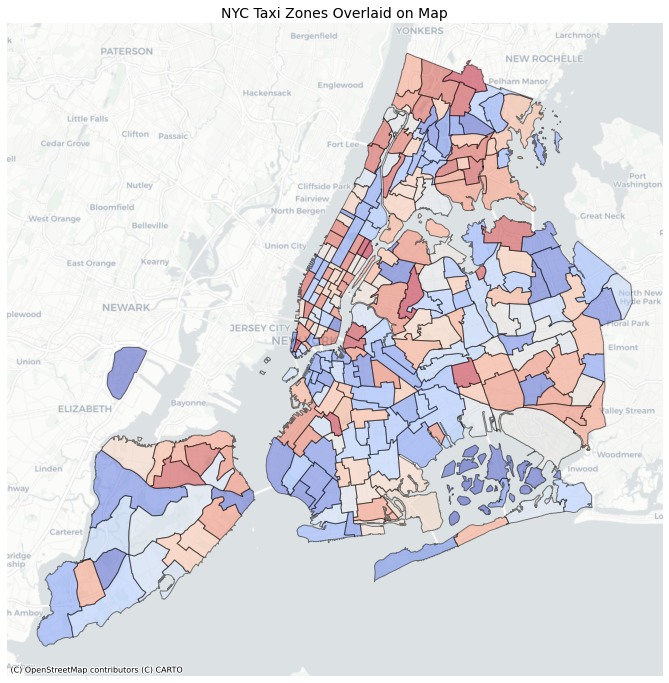

In [60]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# ✅ Step 1: Load NYC Taxi Zone Shapefile
gdf_zones = gpd.read_file("D:\\NYC Trip Data\\taxi_zones\\taxi_zones.shp")

# ✅ Step 2: Check & Convert CRS to Web Mercator (EPSG:3857)
print("Original CRS:", gdf_zones.crs)
gdf_zones = gdf_zones.to_crs(epsg=3857)  # Convert to Web Mercator

# ✅ Step 3: Plot NYC Taxi Zones with Basemap
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the taxi zones
gdf_zones.plot(ax=ax, alpha=0.5, edgecolor="k", cmap="coolwarm")

# Add NYC basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.8)

# Customize Plot
ax.set_title("NYC Taxi Zones Overlaid on Map", fontsize=14)
ax.set_axis_off()

# Show the map
plt.show()
